# importations of Libraries

In [3176]:

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns   
import warnings
import numpy as np
import math
warnings.filterwarnings('ignore')

# 1. Loading the data

In [3177]:
df=pd.read_csv('fullStudy.csv')

# Viewing the first few rows
df.head()

,Timestamp,Informed Consent options,Have you fully understood the purpose of this survey and how your information will be handled?,What gender do you identify as?,What is your age?,What is the highest level of education you have completed?,What is your current work status?,How do you pay for the majority of your medical expenses?,What is your average monthly household income?,"The hospital should have modern, up-to-date equipment","The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",The hospital's employees should be well-dressed and have a neat and professional appearance,Materials associated with the service should be visually appealing,"When a hospital employee promises to do something by a particular time, they should do it","When a patient has a problem, the hospital's employees should show a sincere interest in solving it",The hospital should provide its services at the time it promises to do,The hospital should always get things right the first time,The hospital should maintain accurate and error-free records,The hospital's employees should tell the patient exactly when services will be performed,The hospital's employees should provide prompt service to patients,The hospital's employees should always be willing to help patients,The hospital's employees should never be too busy to respond to patients' requests,The behaviour and attitudes of hospital employees should instill confidence in patients,Patients should feel safe in all their dealings with the hospital and its employees,Hospital employees should be consistently courteous to patients,Hospital employees should be knowledgeable and able to answer patients' questions,The hospital should give each patient individualised attention,The hospital's employees should express care in their interaction with patients,The hospital and its employees should have the patients' best interests at heart,The hospital's employees should understand the specific needs of each of their patients,The operating hours of the hospital should be convenient for all its patients,"The hospital has modern, up-to-date equipment","The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",The hospital's employees are well-dressed and have a neat and professional appearance,Materials associated with the service are visually appealing,"When a hospital employee promises to do something by a particular time, they do it","When a patient has a problem, the hospital's employees show a sincere interest in solving it",The hospital provides its services at the time it promises to do,The hospital always gets things right the first time,The hospital maintains accurate and error-free records,The hospital's employees tell the patients exactly when services will be performed,The hospital's employees provide prompt service to patients,The hospital's employees are always willing to help patients,The hospital's employees are never too busy to respond to patients' requests,The behaviour and attitudes of hospital employees instill confidence in patients,Patients feel safe in all their dealings with the hospital and its employees,The hospital's employees are consistently courteous to patients,The hospital's employees are knowledgeable and able to answer patients' questions,The hospital gives each patient individualised attention,The hospital's employees express care in their interaction with patients,The hospital and its employees have the patients' best interests at heart,The hospital's employees understand the specific needs of each of their patients,The operating hours of the hospital are convenient for all its patients,Which feature is the most important to you?,"Considering your overall experience at Halisi family Hospital, how likely are you to recommend Halisi Family Hospital to your family and friends?",What can we do to improve your experience?
0,5/3/2024 1

## Data Understanding


In [3178]:
# shape of the dataset
df.shape

(174, 56)

### Checking for Missing values

In [3179]:
# Checking for missing values
missing_values = df.isna().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


### Checking for duplicated values

In [3180]:
df.duplicated().sum()

0

## Common Functions

In [3181]:

# Defining custom colors
colors = ['#15616D', '#A5C4D4', '#754668', '#FCB0B3', '#FBD87F']
def plotPieChart(categories, title, values):
    # categories = ["Bachelor's Degree","Prefer not to say", "Certificate or Diploma", "Postgraduate Degree","Secondary Education"]
    # Plot the pie chart
    plt.figure(figsize=(7, 7))  # Adjust the figure size if needed
    plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90,colors=colors,  wedgeprops={'edgecolor': 'black'})
    plt.title(title,fontweight='bold', pad=30)
    # Adjusting the subplot parameters to add space at the top
    plt.subplots_adjust(top=0.95)  # Adjust this value as needed
    plt.axis('equal')


def plotbBarGraph(categories, title, values, xlabel, ylabel, isHorizontal=False):  
    # Plotting the bar chart
    plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
    total = values.sum()
    percentages = (values / total) * 100
    if isHorizontal == False :
        bars = plt.bar(categories, values, color=colors)
    else:
        bars = plt.barh(categories, values, color=colors)

        # Inverting the y-axis to have the highest count on top
        plt.gca().invert_yaxis()


    # Adding the values on top of the bars
    for bar, percent in zip(bars, percentages):
        height = bar.get_height()
        width = bar.get_width()
        if isHorizontal == False:
            plt.text(bar.get_x() + width / 2.0, height, '%d' % int(height), ha='center', va='bottom')
        else: 
            plt.text(width, bar.get_y() + bar.get_height() / 2, f'{percent:.1f}%',
             ha='left', va='center', fontsize=9)
    # Setting the title and labels
    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Display the chart
    plt.show()

## Descriptive Statistics

In [3182]:
# checking the data type
df.dtypes

Timestamp                                                                                                                                            object
Informed Consent options                                                                                                                             object
Have you fully understood the purpose of this survey and how your information will be handled?                                                       object
What gender do you identify as?                                                                                                                      object
What is your age?                                                                                                                                    object
What is the highest level of education you have completed?                                                                                           object
What is your current work status?                               

In [3183]:
# Descriptive statistics for numerical data
df.describe()

,"Considering your overall experience at Halisi family Hospital, how likely are you to recommend Halisi Family Hospital to your family and friends?"
count,174.000000
mean,8.436782
std,2.006931
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


In [3184]:
# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns', None)

# Descriptive statistics for categorical data
df.describe(include='object')

,Timestamp,Informed Consent options,Have you fully understood the purpose of this survey and how your information will be handled?,What gender do you identify as?,What is your age?,What is the highest level of education you have completed?,What is your current work status?,How do you pay for the majority of your medical expenses?,What is your average monthly household income?,"The hospital should have modern, up-to-date equipment","The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",The hospital's employees should be well-dressed and have a neat and professional appearance,Materials associated with the service should be visually appealing,"When a hospital employee promises to do something by a particular time, they should do it","When a patient has a problem, the hospital's employees should show a sincere interest in solving it",The hospital should provide its services at the time it promises to do,The hospital should always get things right the first time,The hospital should maintain accurate and error-free records,The hospital's employees should tell the patient exactly when services will be performed,The hospital's employees should provide prompt service to patients,The hospital's employees should always be willing to help patients,The hospital's employees should never be too busy to respond to patients' requests,The behaviour and attitudes of hospital employees should instill confidence in patients,Patients should feel safe in all their dealings with the hospital and its employees,Hospital employees should be consistently courteous to patients,Hospital employees should be knowledgeable and able to answer patients' questions,The hospital should give each patient individualised attention,The hospital's employees should express care in their interaction with patients,The hospital and its employees should have the patients' best interests at heart,The hospital's employees should understand the specific needs of each of their patients,The operating hours of the hospital should be convenient for all its patients,"The hospital has modern, up-to-date equipment","The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",The hospital's employees are well-dressed and have a neat and professional appearance,Materials associated with the service are visually appealing,"When a hospital employee promises to do something by a particular time, they do it","When a patient has a problem, the hospital's employees show a sincere interest in solving it",The hospital provides its services at the time it promises to do,The hospital always gets things right the first time,The hospital maintains accurate and error-free records,The hospital's employees tell the patients exactly when services will be performed,The hospital's employees provide prompt service to patients,The hospital's employees are always willing to help patients,The hospital's employees are never too busy to respond to patients' requests,The behaviour and attitudes of hospital employees instill confidence in patients,Patients feel safe in all their dealings with the hospital and its employees,The hospital's employees are consistently courteous to patients,The hospital's employees are knowledgeable and able to answer patients' questions,The hospital gives each patient individualised attention,The hospital's employees express care in their interaction with patients,The hospital and its employees have the patients' best interests at heart,The hospital's employees understand the specific needs of each of their patients,The operating hours of the hospital are convenient for all its patients,Which feature is the most important to you?,What can we do to improve your experience?
count,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,17

## Visualizations

### Response Rate

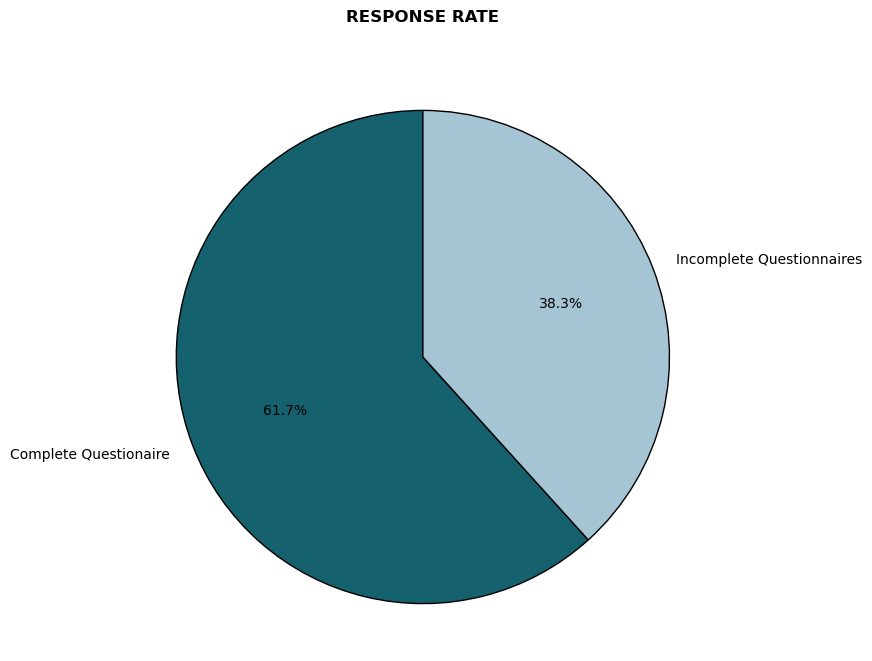

In [3185]:
categories = ['Complete Questionaire','Incomplete Questionnaires']
values = [174, 108] 
title = 'RESPONSE RATE'
plotPieChart(categories, title, values)

In [3186]:
df['What gender do you identify as?'].value_counts()

What gender do you identify as?
Male                 85
Female               84
Prefer not to say     4
Other                 1
Name: count, dtype: int64

### Based on Gender

In [3187]:
# Predefining your data
categories = ['Male', 'Female', 'Prefer not to say', 'Other']
values = [85, 84, 4, 1] 

# Setting the title and labels
title = 'Gender Distribution of Respondents'
xlabel = 'Gender'
ylabel = 'Frequency' 

#plotbBarGraph(categories, title, values, xlabel, ylabel)

### Based on Age

In [3188]:
df['What is your age?'].value_counts()

What is your age?
18 - 44              111
45-59                 52
Prefer not to say      9
> 60                   2
Name: count, dtype: int64

In [3189]:
categories = ["18 - 44","45-59", "Prefer not to say", "> 60" ] 
title = 'Age Distribution of Respondents'# Suppose 'Education Level' is the column name containing education levels
age_counts = df['What is your age?'].value_counts() 
#plotbBarGraph(categories,title,values, xlabel='Age Group', ylabel='Frequency')

### Based on Education

In [3190]:
df["What is the highest level of education you have completed?"].value_counts()

What is the highest level of education you have completed?
Bachelor's Degree                                   85
Prefer not to say                                   30
Certificate or Diploma                              29
Postgraduate Degree ( Master's Degree or Higher)    21
Secondary Education                                  9
Name: count, dtype: int64

In [3191]:
# Function to reduce the length of unique values
def reduce_length(value):
    if value.startswith('Postgraduate Degree'):
        return 'Postgraduate Degree'
    else:
        return value

# Apply the function to the 'Education Level' column
df['What is the highest level of education you have completed?'] = df['What is the highest level of education you have completed?'].apply(reduce_length)

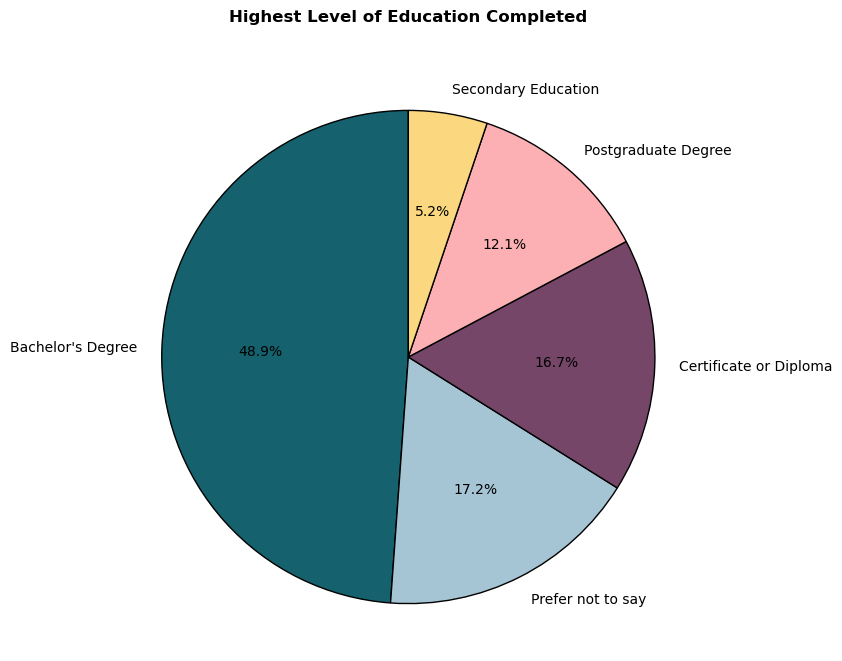

In [3192]:
categories = ["Bachelor's Degree","Prefer not to say", "Certificate or Diploma", "Postgraduate Degree","Secondary Education"] 
title = 'Highest Level of Education Completed'# Suppose 'Education Level' is the column name containing education levels
education_counts = df['What is the highest level of education you have completed?'].value_counts()
plotPieChart(categories, title,education_counts )

### Based on Workstatus

In [3193]:
work_counts = df['What is your current work status?'].value_counts()
work_counts

What is your current work status?
Employed             102
Self-Employed         36
Prefer not to say     16
Unemployed            16
Retired                4
Name: count, dtype: int64

In [3194]:
#  df['What is your current work status?'].unique()

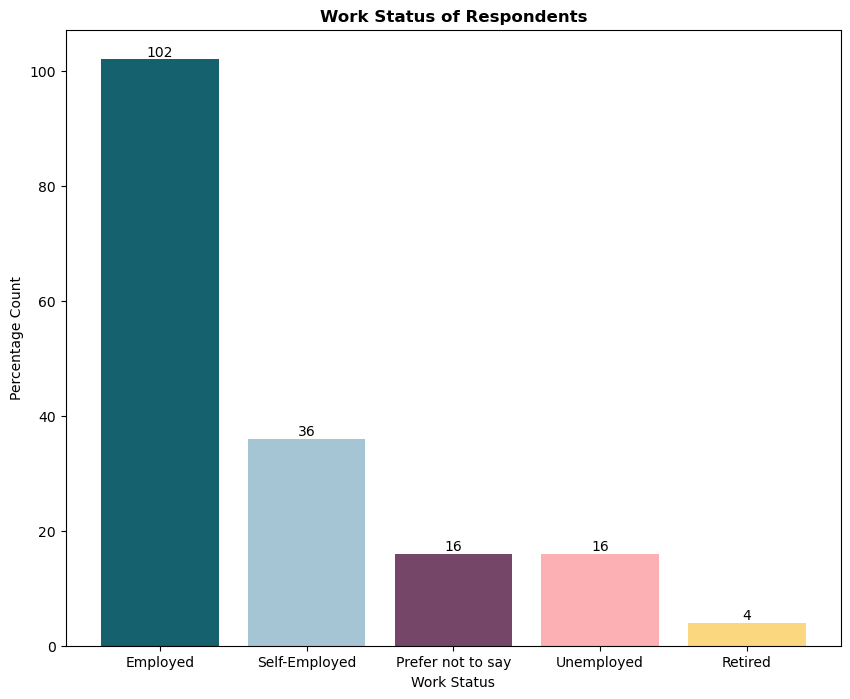

In [3195]:
categories = ['Employed','Self-Employed',  'Prefer not to say','Unemployed', 'Retired'] 
title = 'Work Status of Respondents' 
plotbBarGraph(categories,title, work_counts, xlabel='Work Status', ylabel='Percentage Count')

### Based on Mode of payment for healthcare services

In [3196]:
 #Suppose 'Education Level' is the column name containing education levels
payment_counts = df['How do you pay for the majority of your medical expenses?'].value_counts()
payment_counts

How do you pay for the majority of your medical expenses?
Private Health Insurance provided by my employer                                                           70
NHIF Only, Private Health Insurance purchased by self                                                      21
NHIF Only                                                                                                  15
Out of Pocket - Cash,Mpesa,Credit or Debit Card                                                            14
Prefer not to say                                                                                          12
NHIF Only, Private Health Insurance provided by my employer                                                10
Private Health Insurance purchased by self                                                                  9
Out of Pocket - Cash,Mpesa,Credit or Debit Card, NHIF Only                                                  5
NHIF Only, Private Health Insurance provided by my employer, P

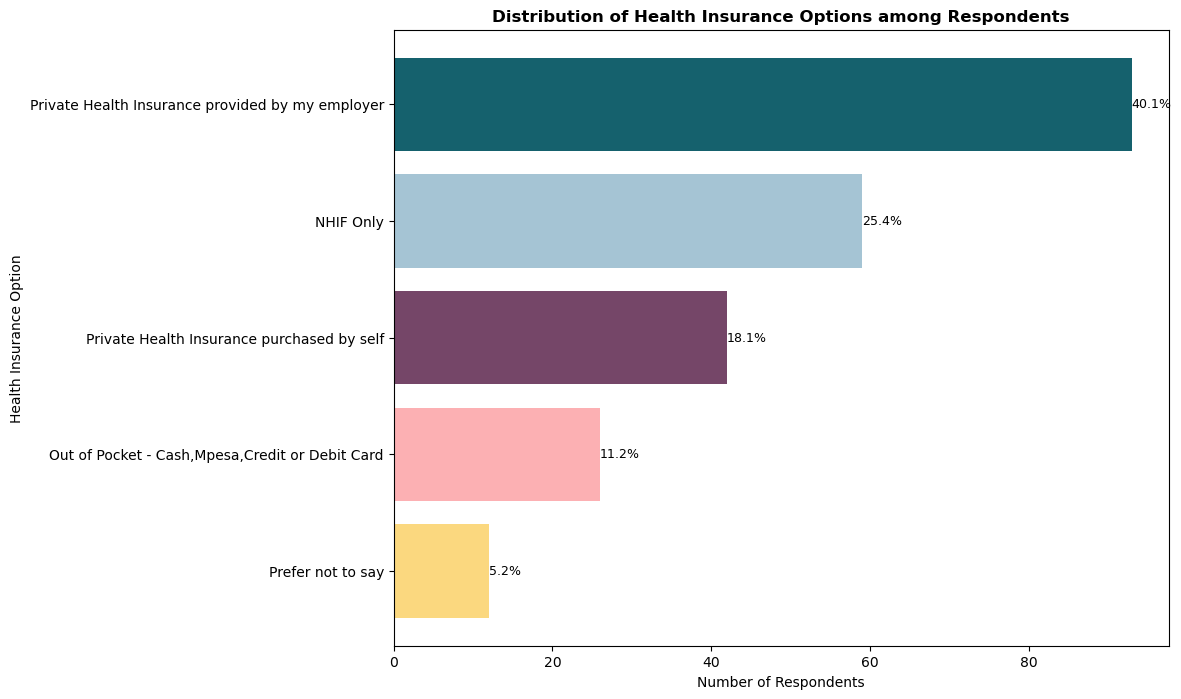

In [3197]:
# Suppose 'Education Level' is the column name containing education levels
payment_counts = df['How do you pay for the majority of your medical expenses?'].value_counts()
payment_counts

# combining the inputs for users that selcted more than one choice
# Creating a DataFrame
# payment_counts = pd.DataFrame(payment_counts)

# Splitting the responses into individual selections
# df_payment_counts = payment_counts.assign(Responses=payment_counts.str.split(',')).explode('Responses')
# Sample data as a dictionary
data = {
    'Responses': [
        'Private Health Insurance provided by my employer',
        'NHIF Only, Private Health Insurance purchased by self',
        'NHIF Only',
        'Out of Pocket - Cash,Mpesa,Credit or Debit Card',
        'Prefer not to say',
        'NHIF Only, Private Health Insurance provided by my employer',
        'Private Health Insurance purchased by self',
        'Out of Pocket - Cash,Mpesa,Credit or Debit Card, NHIF Only',
        'NHIF Only, Private Health Insurance provided by my employer, Private Health Insurance purchased by self',
        'Out of Pocket - Cash,Mpesa,Credit or Debit Card, Private Health Insurance purchased by self',
        'Out of Pocket - Cash,Mpesa,Credit or Debit Card, Private Health Insurance provided by my employer',
        'Private Health Insurance provided by my employer, Private Health Insurance purchased by self',
        'Private Health Insurance provided by my employer, NHIF Only',
        'NHIF Only'
    ],
    'Counts': [
        70, 21, 15, 14, 12, 10, 9, 5, 5, 4, 3, 3, 2, 1
    ]
}

# Creating a DataFrame
df2 = pd.DataFrame(data)


# Define keywords for splitting
keywords = ['Out of Pocket - Cash,Mpesa,Credit or Debit Card', 'NHIF Only',
            'Private Health Insurance provided by my employer', 'Prefer not to say',
            'Private Health Insurance purchased by self']

# Splitting the responses based on keywords
df_split = pd.concat([df2[df2['Responses'].str.contains(keyword)].assign(Responses=keyword) for keyword in keywords])

# Counting the occurrences of each selection
counts = df_split.groupby('Responses')['Counts'].sum().reset_index()

# Sorting by count for better visualization
counts = counts.sort_values(by='Counts', ascending=False)


# Plotting the bar chart
# plt.figure(figsize=(10, 6))

plotbBarGraph(categories=counts['Responses'], values=counts['Counts'], title='Distribution of Health Insurance Options among Respondents',xlabel='Number of Respondents',ylabel='Health Insurance Option', isHorizontal=True)
# plt.barh(counts['Responses'], counts['Counts'], color='#15616D')
  

### Based Income

In [3198]:
#Suppose 'Education Level' is the column name containing education levels
income_counts = df['What is your average monthly household income?'].value_counts()
income_counts


What is your average monthly household income?
Prefer not to say    79
50,000-99,999        37
49,999 and below     23
100,000-149,999      19
150,000 and above    16
Name: count, dtype: int64

In [3199]:
df['What is your average monthly household income?'].unique()

array(['Prefer not to say', '50,000-99,999', '100,000-149,999',
       '150,000 and above', '49,999 and below'], dtype=object)

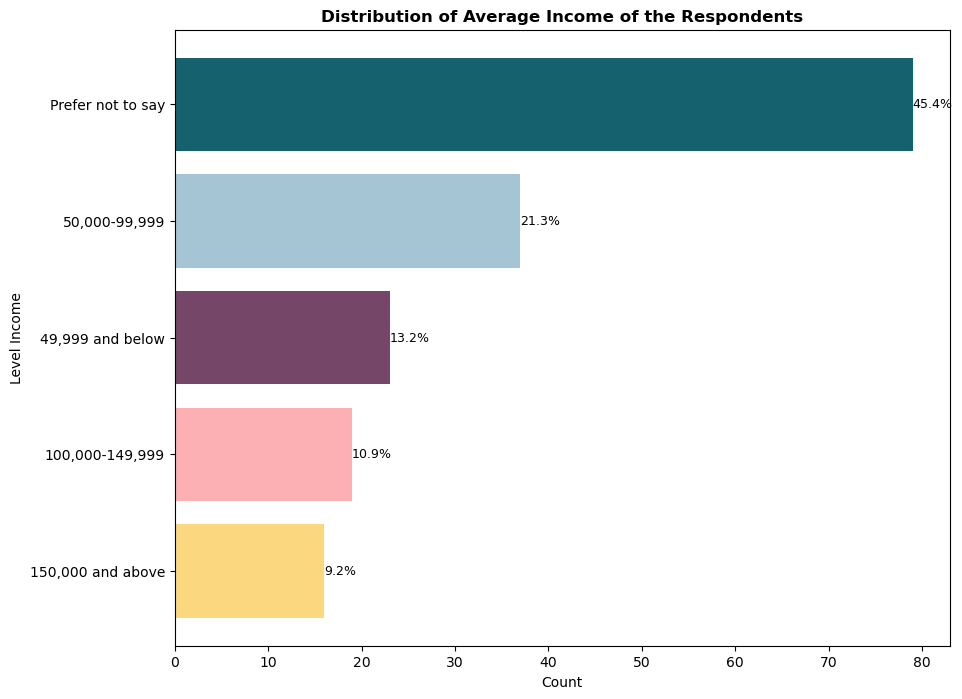

In [3200]:

# categories
categories = ['Prefer not to say', '50,000-99,999', '49,999 and below', '100,000-149,999', '150,000 and above']
# Sort the data by counts in descending order
income_counts = income_counts.sort_values(ascending=False)

plotbBarGraph(categories=categories, values=income_counts, title='Distribution of Average Income of the Respondents',xlabel='Count',ylabel='Level Income', isHorizontal=True)
 

## Descriptive Statistics - Mean and Standard Deviation

### Encoding the data

In [3201]:
halisi_df=df


In [3202]:
halisi_df = halisi_df.drop(columns='Informed Consent options')

In [3203]:

# encoding Yes..No response
categoryMappingYesNo = {'Yes': 1, 'No, I  have more questions':2}
halisi_df['Have you fully understood the purpose of this survey and how your information will be handled?'] = halisi_df['Have you fully understood the purpose of this survey and how your information will be handled?'].map(categoryMappingYesNo)

# encoding the gender 
categoryGender = {'Male': 1, 'Female':2, 'Other':3, 'Prefer not to say':4}
halisi_df['What gender do you identify as?'] = halisi_df['What gender do you identify as?'].map(categoryGender)

# encoding the 'Informed Consent options
categoryAges = {'18 - 44':1, '45-59':2,'> 60':3,'Prefer not to say':4}
halisi_df['What is your age?'] = halisi_df['What is your age?'].map(categoryAges)

# encoding educarion levels
categoryEducationLevel = {'Primary Education':1,'Secondary Education':2,'Certificate or Diploma':3,"Bachelor's Degree":4,"Postgraduate Degree":5,"Prefer not to say":6 }
halisi_df['What is the highest level of education you have completed?']= halisi_df['What is the highest level of education you have completed?'].map(categoryEducationLevel)

# encoding 'What is your current work status?'
categoryWorkStatus = {'Unemployed': 1,    'Employed': 2,    'Self-Employed': 3,    'Retired': 4,    'Disabled - Not able to work': 5,    'Prefer not to say': 6
}
halisi_df['What is your current work status?'] = halisi_df['What is your current work status?'].map(categoryWorkStatus)

# encoding 'How do you pay for the majority of your medical expenses?'
categoryPaymentMethod = {
    'Out of Pocket - Cash,Mpesa,Credit or Debit Card': 1,
    'NHIF Only': 2,
    'Private Health Insurance provided by my employer': 3,
    'Private Health Insurance purchased by self': 4,
    'Prefer not to say': 5
}
halisi_df['How do you pay for the majority of your medical expenses?'] = halisi_df['How do you pay for the majority of your medical expenses?'].map(categoryPaymentMethod)

# encoding income
categoryIncome = { 
    '49,999 and below': 1,
    '50,000-99,999': 2,
    '100,000-149,999': 3,
    '150,000 and above': 4,
    'Prefer not to say': 5
}
halisi_df['What is your average monthly household income?'] = halisi_df['What is your average monthly household income?'].map(categoryIncome)

# encoding the tangibles
categoryMostImportantTangibles ={
    "Tangibles : The appearance of the hospital's facilities, equipment, personnel, and communication materials.":1,
    "Reliability : The hospital's ability to perform the promised service dependably and accurately.":2,
    "Responsiveness : The hospital's willingness to help patients and provide prompt service.":3,
    "Assurance : The knowledge and courtesy of the hospital's employees and their ability to convey trust and confidence.":4,
    "Empathy : The level of caring and individualised attention the hospital provides its patients.":5

} 
halisi_df['Which feature is the most important to you?'] = halisi_df['Which feature is the most important to you?'].map(categoryMostImportantTangibles)
 

# encoding agree...strongly agree... sentiments 
categoryAgreeDisagree = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

# loop through and encode columns from 'The hospital should have modern, up-to-date equipment' to 'The operating hours of the hospital are convenient for all its patients'
# Get the index of the starting and ending columns
startColumnIndex = halisi_df.columns.get_loc('The hospital should have modern, up-to-date equipment')
endColumnIndex = halisi_df.columns.get_loc('The operating hours of the hospital are convenient for all its patients')

# Loop through the columns and apply the mapping
for colIndex in range(startColumnIndex, endColumnIndex + 1):
    columnName = halisi_df.columns[colIndex]
    halisi_df[columnName] = halisi_df[columnName].map(categoryAgreeDisagree)

In [3204]:
halisi_df

,Timestamp,Have you fully understood the purpose of this survey and how your information will be handled?,What gender do you identify as?,What is your age?,What is the highest level of education you have completed?,What is your current work status?,How do you pay for the majority of your medical expenses?,What is your average monthly household income?,"The hospital should have modern, up-to-date equipment","The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",The hospital's employees should be well-dressed and have a neat and professional appearance,Materials associated with the service should be visually appealing,"When a hospital employee promises to do something by a particular time, they should do it","When a patient has a problem, the hospital's employees should show a sincere interest in solving it",The hospital should provide its services at the time it promises to do,The hospital should always get things right the first time,The hospital should maintain accurate and error-free records,The hospital's employees should tell the patient exactly when services will be performed,The hospital's employees should provide prompt service to patients,The hospital's employees should always be willing to help patients,The hospital's employees should never be too busy to respond to patients' requests,The behaviour and attitudes of hospital employees should instill confidence in patients,Patients should feel safe in all their dealings with the hospital and its employees,Hospital employees should be consistently courteous to patients,Hospital employees should be knowledgeable and able to answer patients' questions,The hospital should give each patient individualised attention,The hospital's employees should express care in their interaction with patients,The hospital and its employees should have the patients' best interests at heart,The hospital's employees should understand the specific needs of each of their patients,The operating hours of the hospital should be convenient for all its patients,"The hospital has modern, up-to-date equipment","The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",The hospital's employees are well-dressed and have a neat and professional appearance,Materials associated with the service are visually appealing,"When a hospital employee promises to do something by a particular time, they do it","When a patient has a problem, the hospital's employees show a sincere interest in solving it",The hospital provides its services at the time it promises to do,The hospital always gets things right the first time,The hospital maintains accurate and error-free records,The hospital's employees tell the patients exactly when services will be performed,The hospital's employees provide prompt service to patients,The hospital's employees are always willing to help patients,The hospital's employees are never too busy to respond to patients' requests,The behaviour and attitudes of hospital employees instill confidence in patients,Patients feel safe in all their dealings with the hospital and its employees,The hospital's employees are consistently courteous to patients,The hospital's employees are knowledgeable and able to answer patients' questions,The hospital gives each patient individualised attention,The hospital's employees express care in their interaction with patients,The hospital and its employees have the patients' best interests at heart,The hospital's employees understand the specific needs of each of their patients,The operating hours of the hospital are convenient for all its patients,Which feature is the most important to you?,"Considering your overall experience at Halisi family Hospital, how likely are you to recommend Halisi Family Hospital to your family and friends?",What can we do to improve your experience?
0,5/3/2024 11:34:36,1,1,1,3,3,1.0,5,5

In [3205]:
#checking for missing values
halisi_df.isna().sum()


Timestamp                                                                                                                                             0
Have you fully understood the purpose of this survey and how your information will be handled?                                                        0
What gender do you identify as?                                                                                                                       0
What is your age?                                                                                                                                     0
What is the highest level of education you have completed?                                                                                            0
What is your current work status?                                                                                                                     0
How do you pay for the majority of your medical expenses?                               

- Presence of missing values in the payment method

### Mean and Standard Deviation for each statement

In [3206]:
# expetation  
expectation_df = df.loc[:, 'The hospital should have modern, up-to-date equipment':'The operating hours of the hospital should be convenient for all its patients']
# perception
perception_df = df.loc[:, 'The hospital has modern, up-to-date equipment':'The operating hours of the hospital are convenient for all its patients'] 

In [3207]:
expectation_df['The hospital should have modern, up-to-date equipment'].value_counts()

The hospital should have modern, up-to-date equipment
Strongly Agree       105
Agree                 56
Strongly Disagree      6
Neutral                6
Disagree               1
Name: count, dtype: int64

In [3208]:
# Likert mapping
likert_mapping = {
    'Strongly Agree': 5,
    'Agree': 4,
    'Neutral': 3,
    'Disagree': 2,
    'Strongly Disagree': 1
}

 
# Initialize an empty list to store means for each column
expectation_means_per_column = []

# Loop over every other column in the DataFrame
for column in expectation_df.columns:
    value_counts = expectation_df[column].value_counts()

    # Create DataFrame of value counts
    value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

    # Replace Likert scale responses with numeric values
    value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

    # Compute the weighted mean
    mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

    # Compute the variance
    N = value_counts_df['Count'].sum() 
    value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - mean) ** 2
    variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (N-1)

    # Compute the standard deviation
    standard_deviation = np.sqrt(variance)

    expectation_means_per_column.append(( column, mean  ))

    # Append mean to the list 
    print("Mean (Expectation) of column '{}': {:.2f}".format(column, mean))
    print("Variance (Expectation) of column '{}': {:.2f}".format(column, variance))
    print("Standard Deviation (Expectation) of column '{}': {:.2f}".format(column, standard_deviation))
    print("--------------------------------------------------------------")

Mean (Expectation) of column 'The hospital should have modern, up-to-date equipment': 4.45
Variance (Expectation) of column 'The hospital should have modern, up-to-date equipment': 0.77
Standard Deviation (Expectation) of column 'The hospital should have modern, up-to-date equipment': 0.88
--------------------------------------------------------------
Mean (Expectation) of column 'The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)': 4.53
Variance (Expectation) of column 'The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)': 0.56
Standard Deviation (Expectation) of column 'The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)': 0.75
--------------------------------------------------------------
Mean (Expectation) of column 'The hospital's e

### Calculations using squared weights

In [3209]:
# Likert mapping
likert_mapping_squared = {
    'Strongly Agree': 25,
    'Agree': 16,
    'Neutral': 9,
    'Disagree': 4,
    'Strongly Disagree': 1
}

# Loop over every other column in the DataFrame
for column in expectation_df.columns:
    value_counts = expectation_df[column].value_counts()

    # Create DataFrame of value counts
    value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

    # Replace Likert scale responses with numeric values
    value_counts_df['Weights_2'] = value_counts_df['Response'].map(likert_mapping_squared)

    # Compute the weighted mean
    mean = (value_counts_df['Count'] * value_counts_df['Weights_2']).sum() / value_counts_df['Count'].sum()

    # Compute the variance
    value_counts_df['Squared Difference'] = (value_counts_df['Weights_2'] - mean) ** 2
    variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / value_counts_df['Count'].sum()

    # Compute the standard deviation
    standard_deviation = np.sqrt(variance)

    # Append mean to the list
    # means_per_column.append(( mean, variance, standard_deviation))
    print("Mean (Expectation) of column '{}': {:.2f}".format(column, mean))
    print("Variance (Expectation) of column '{}': {:.2f}".format(column, variance))
    print("Standard Deviation (Expectation) of column '{}': {:.2f}".format(column, standard_deviation))
    print("--------------------------------------------------------------")
 

Mean (Expectation) of column 'The hospital should have modern, up-to-date equipment': 20.60
Variance (Expectation) of column 'The hospital should have modern, up-to-date equipment': 37.96
Standard Deviation (Expectation) of column 'The hospital should have modern, up-to-date equipment': 6.16
--------------------------------------------------------------
Mean (Expectation) of column 'The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)': 21.12
Variance (Expectation) of column 'The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)': 30.07
Standard Deviation (Expectation) of column 'The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)': 5.48
--------------------------------------------------------------
Mean (Expectation) of column 'The hospital

In [3210]:
 
# Initialize an empty list to store means for each column
means_per_column = []

# Likert mapping
likert_mapping = {
    'Strongly Agree': 5,
    'Agree': 4,
    'Neutral': 3,
    'Disagree': 2,
    'Strongly Disagree': 1
} 
# Loop over every other column in the DataFrame
for column in perception_df.columns:
    value_counts = perception_df[column].value_counts()

    # Create DataFrame of value counts
    value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

    # Replace Likert scale responses with numeric values
    value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

    # Compute the weighted mean
    mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

    # Compute the variance
    N = value_counts_df['Count'].sum() 
    value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - mean) ** 2
    variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (N-1)

    # Compute the standard deviation
    standard_deviation = np.sqrt(variance)

    # Append mean to the list
    means_per_column.append((column, mean  ))
    print("Mean (Perception) of column '{}': {:.2f}".format(column, mean))
    print("Variance (Perception) of column '{}': {:.2f}".format(column, variance))
    print("Standard Deviation (Perception) of column '{}': {:.2f}".format(column, standard_deviation))
    print("--------------------------------------------------------------")

# Print the means for each column
# for column, mean, variance, standard_deviation in means_per_column:


Mean (Perception) of column 'The hospital has modern, up-to-date equipment': 3.87
Variance (Perception) of column 'The hospital has modern, up-to-date equipment': 0.62
Standard Deviation (Perception) of column 'The hospital has modern, up-to-date equipment': 0.79
--------------------------------------------------------------
Mean (Perception) of column 'The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)': 4.30
Variance (Perception) of column 'The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)': 0.36
Standard Deviation (Perception) of column 'The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)': 0.60
--------------------------------------------------------------
Mean (Perception) of column 'The hospital's employees are well-dressed and have a neat and pro

### Calculating the gap (difference) between expectations and perceptions for each statement  

In [3211]:
# perception 
perception_df_gap = pd.DataFrame(means_per_column, columns=['Perception Column','Perception Mean'])

# expectation
expectation_df_gap = pd.DataFrame(expectation_means_per_column, columns=['Expectation Column','Expectation Mean'])

#### Combining expectation and perception means into one df

In [3212]:
# Merging on 'Column'
combined_mean_df = pd.concat([perception_df_gap, expectation_df_gap], axis=1)
combined_mean_df = combined_mean_df.drop(['Expectation Column'], axis=1).round(2)
combined_mean_df

,Perception Column,Perception Mean,Expectation Mean
0,"The hospital has modern, up-to-date equipment",3.87,4.45
1,The hospital's physical facilities are clean a...,4.30,4.53
2,The hospital's employees are well-dressed and ...,4.21,4.45
3,Materials associated with the service are visu...,4.13,4.41
4,When a hospital employee promises to do someth...,4.02,4.43
5,"When a patient has a problem, the hospital's e...",4.05,4.53
6,The hospital provides its services at the time...,3.85,4.51
7,The hospital always gets things right the firs...,3.97,4.33
8,The hospital maintains accurate and error-free...,4.07,4.53
9,The hospital's employees tell the patients exa...,3.93,4.41


#### Calculating the gap between expectation and perception means

In [3213]:
# Calculate the difference and add a new column 'Gap'
combined_mean_df['Gap'] = combined_mean_df['Perception Mean'] - combined_mean_df['Expectation Mean']
combined_mean_df

,Perception Column,Perception Mean,Expectation Mean,Gap
0,"The hospital has modern, up-to-date equipment",3.87,4.45,-0.58
1,The hospital's physical facilities are clean a...,4.30,4.53,-0.23
2,The hospital's employees are well-dressed and ...,4.21,4.45,-0.24
3,Materials associated with the service are visu...,4.13,4.41,-0.28
4,When a hospital employee promises to do someth...,4.02,4.43,-0.41
5,"When a patient has a problem, the hospital's e...",4.05,4.53,-0.48
6,The hospital provides its services at the time...,3.85,4.51,-0.66
7,The hospital always gets things right the firs...,3.97,4.33,-0.36
8,The hospital maintains accurate and error-free...,4.07,4.53,-0.46
9,The hospital's employees tell the patients exa...,3.93,4.41,-0.48


### Mean and Standard Deviation for each group

Expectation and Perception are further divided into:
- Tangibles
- Reliability
- Responsiveness
- Assurance
- Empathy

#### Tangibles

In [3214]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([df['The hospital should have modern, up-to-date equipment'],
df["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
df["The hospital's employees should be well-dressed and have a neat and professional appearance"], df['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - mean) ** 2
variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
standard_deviation = np.sqrt(variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns: {:.2f}".format(mean))
print("Variance (Tangibles_Expectation) of the first four columns: {:.2f}".format(variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns: {:.2f}".format(standard_deviation))


Mean (Tangibles_Expectation) of the first four columns: 4.46
Variance (Tangibles_Expectation) of the first four columns: 0.61
Standard Deviation (Tangibles_Expectation) of the first four columns: 0.78


In [3215]:
## Creating  a dataframe of the means and standard deviation

# Create a DataFrame with the results
results_df1 = pd.DataFrame({
    'Statistic': ['Mean', 'Variance', 'Standard Deviation'],
    'Tangibles_Expectation': [mean, variance, standard_deviation]
})
results_df1


,Statistic,Tangibles_Expectation
0,Mean,4.464080
1,Variance,0.614535
2,Standard Deviation,0.783923


In [3216]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([df['The hospital has modern, up-to-date equipment'],
df[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
df["The hospital's employees are well-dressed and have a neat and professional appearance"], df['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - mean) ** 2
variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
standard_deviation = np.sqrt(variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns: {:.2f}".format(mean))
print("Variance (Tangible_Perception) of the first four columns: {:.2f}".format(variance))
print("Standard Deviation (Tangible_Perception) of the first four columns: {:.2f}".format(standard_deviation))

Mean (Tangible_Perception) of the first four columns: 4.13
Variance (Tangible_Perception) of the first four columns: 0.48
Standard Deviation (Tangible_Perception) of the first four columns: 0.69


In [3217]:
## Creating  a dataframe of the means and standard deviation

# Create a DataFrame with the results
results_df2 = pd.DataFrame({
    'Statistic': ['Mean', 'Variance', 'Standard Deviation'],
    'Tangible_Perception': [mean, variance, standard_deviation]
})
results_df2


,Statistic,Tangible_Perception
0,Mean,4.129310
1,Variance,0.478219
2,Standard Deviation,0.691534


#### Reliability

In [3218]:
# expectation - Reliability
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([df['When a hospital employee promises to do something by a particular time, they should do it'],
df["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
df["The hospital should provide its services at the time it promises to do"], df['The hospital should always get things right the first time'],  
df['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - mean) ** 2
variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
standard_deviation = np.sqrt(variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.47
Variance (Reliability_Expectation) of the first four columns: 0.59
Standard Deviation (Reliability_Expectation) of the first four columns: 0.77


In [3219]:
## Creating  a dataframe of the means and standard deviation

# Create a DataFrame with the results
results_df3 = pd.DataFrame({
    'Statistic': ['Mean', 'Variance', 'Standard Deviation'],
    'Reliability_Expectation': [mean, variance, standard_deviation]
})
results_df3


,Statistic,Reliability_Expectation
0,Mean,4.465517
1,Variance,0.594322
2,Standard Deviation,0.770923


In [3220]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    df["When a hospital employee promises to do something by a particular time, they do it"],
    df["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    df["The hospital provides its services at the time it promises to do"],
    df["The hospital always gets things right the first time"],
    df["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - mean) ** 2
variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
standard_deviation = np.sqrt(variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(standard_deviation))

Mean (Reliability_Perception) of the first four columns: 3.99
Variance (Reliability_Perception) of the first four columns: 0.54
Standard Deviation (Reliability_Perception) of the first four columns: 0.73


In [3221]:
## Creating  a dataframe of the means and standard deviation

# Create a DataFrame with the results
results_df4 = pd.DataFrame({
    'Statistic': ['Mean', 'Variance', 'Standard Deviation'],
    'Reliability_Perception': [mean, variance, standard_deviation]
})
results_df4


,Statistic,Reliability_Perception
0,Mean,3.993103
1,Variance,0.536201
2,Standard Deviation,0.732257


####  Responsiveness

In [3222]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    df["The hospital's employees should tell the patient exactly when services will be performed"],
    df["The hospital's employees should provide prompt service to patients"],
    df["The hospital's employees should always be willing to help patients"],
    df["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - mean) ** 2
variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
standard_deviation = np.sqrt(variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.47
Variance (Responsiveness_Expectation) of the first four columns: 0.63
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.79


In [3223]:
## Creating  a dataframe of the means and standard deviation

# Create a DataFrame with the results
results_df5 = pd.DataFrame({
    'Statistic': ['Mean', 'Variance', 'Standard Deviation'],
    'Responsiveness_Expectation': [mean, variance, standard_deviation]
})
results_df5

,Statistic,Responsiveness_Expectation
0,Mean,4.471264
1,Variance,0.629389
2,Standard Deviation,0.793340


In [3224]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    df["The hospital's employees tell the patients exactly when services will be performed"],
    df["The hospital's employees provide prompt service to patients"],
    df["The hospital's employees are always willing to help patients"],
    df["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - mean) ** 2
variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
standard_deviation = np.sqrt(variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 3.98
Variance (Responsiveness_Perception) of the first four columns: 0.52
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.72


In [3225]:
## Creating  a dataframe of the means and standard deviation

# Create a DataFrame with the results
results_df6 = pd.DataFrame({
    'Statistic': ['Mean', 'Variance', 'Standard Deviation'],
    'Responsiveness_Perception': [mean, variance, standard_deviation]
})
results_df6


,Statistic,Responsiveness_Perception
0,Mean,3.979885
1,Variance,0.523336
2,Standard Deviation,0.723420


#### Assurance

In [3226]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    df["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    df["Patients should feel safe in all their dealings with the hospital and its employees"],
    df["Hospital employees should be consistently courteous to patients"],
    df["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - mean) ** 2
variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
standard_deviation = np.sqrt(variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.55
Variance (Assurance_Expectation) of the first four columns: 0.53
Standard Deviation (Assurance_Expectation) of the first four columns: 0.73


In [3227]:
## Creating  a dataframe of the means and standard deviation

# Create a DataFrame with the results
results_df7 = pd.DataFrame({
    'Statistic': ['Mean', 'Variance', 'Standard Deviation'],
    'Assurance_Expectation': [mean, variance, standard_deviation]
})
results_df7


,Statistic,Assurance_Expectation
0,Mean,4.554598
1,Variance,0.526511
2,Standard Deviation,0.725611


In [3228]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    df["The behaviour and attitudes of hospital employees instill confidence in patients"],
    df["Patients feel safe in all their dealings with the hospital and its employees"],
    df["The hospital's employees are consistently courteous to patients"],
    df["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - mean) ** 2
variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
standard_deviation = np.sqrt(variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.10
Variance (Assurance_Perception) of the first four columns: 0.35
Standard Deviation (Assurance_Perception) of the first four columns: 0.59


In [3229]:
## Creating  a dataframe of the means and standard deviation

# Create a DataFrame with the results
results_df8 = pd.DataFrame({
    'Statistic': ['Mean', 'Variance', 'Standard Deviation'],
    'Assurance_Perception': [mean, variance, standard_deviation]
})
results_df8

,Statistic,Assurance_Perception
0,Mean,4.096264
1,Variance,0.348993
2,Standard Deviation,0.590756


#### Empathy

In [3230]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    df["The hospital should give each patient individualised attention"],
    df["The hospital's employees should express care in their interaction with patients"],
    df["The hospital and its employees should have the patients' best interests at heart"],
    df["The hospital's employees should understand the specific needs of each of their patients"],
    df["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - mean) ** 2
variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
standard_deviation = np.sqrt(variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(standard_deviation))


Mean (Empathy_Expectation) of the first four columns: 4.52
Variance (Empathy_Expectation) of the first four columns: 0.56
Standard Deviation (Empathy_Expectation) of the first four columns: 0.75


In [3231]:
## Creating  a dataframe of the means and standard deviation

# Create a DataFrame with the results
results_df9 = pd.DataFrame({
    'Statistic': ['Mean', 'Variance', 'Standard Deviation'],
    'Empathy_Expectation': [mean, variance, standard_deviation]
})
results_df9


,Statistic,Empathy_Expectation
0,Mean,4.521839
1,Variance,0.560512
2,Standard Deviation,0.748674


In [3232]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    df["The hospital gives each patient individualised attention"],
    df["The hospital's employees express care in their interaction with patients"],
    df["The hospital and its employees have the patients' best interests at heart"],
    df["The hospital's employees understand the specific needs of each of their patients"],
    df["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - mean) ** 2
variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
standard_deviation = np.sqrt(variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.12
Variance (Empathy_Perception) of the first four columns: 0.42
Standard Deviation (Empathy_Perception) of the first four columns: 0.65


In [3233]:
## Creating  a dataframe of the means and standard deviation

# Create a DataFrame with the results
results_df10 = pd.DataFrame({
    'Statistic': ['Mean', 'Variance', 'Standard Deviation'],
    'Empathy_Perception': [mean, variance, standard_deviation]
})
results_df10


,Statistic,Empathy_Perception
0,Mean,4.117241
1,Variance,0.416618
2,Standard Deviation,0.645460


In [3234]:
# Merge DataFrames on 'Statistic' column
merged_df = results_df1.merge(results_df2, on='Statistic') \
                       .merge(results_df3, on='Statistic') \
                       .merge(results_df4, on='Statistic') \
                       .merge(results_df5, on='Statistic') \
                       .merge(results_df6, on='Statistic') \
                       .merge(results_df7, on='Statistic') \
                       .merge(results_df8, on='Statistic') \
                       .merge(results_df9, on='Statistic') \
                       .merge(results_df10, on='Statistic')

# Display the merged DataFrame
merged_df

,Statistic,Tangibles_Expectation,Tangible_Perception,Reliability_Expectation,Reliability_Perception,Responsiveness_Expectation,Responsiveness_Perception,Assurance_Expectation,Assurance_Perception,Empathy_Expectation,Empathy_Perception
0,Mean,4.464080,4.129310,4.465517,3.993103,4.471264,3.979885,4.554598,4.096264,4.521839,4.117241
1,Variance,0.614535,0.478219,0.594322,0.536201,0.629389,0.523336,0.526511,0.348993,0.560512,0.416618
2,Standard Deviation,0.783923,0.691534,0.770923,0.732257,0.793340,0.723420,0.725611,0.590756,0.748674,0.645460


## Testing for Normality

- Kolmogorov Smirnov and Shapiro Wilk Test to assess the normality of the gaps.

- H0: Data follows a normal distribution.
- Ha: Data does not follow a normal distribution

### Tangibles

In [3235]:
## Tangibles

tangibles = combined_mean_df.iloc[0:4]
tangibles

,Perception Column,Perception Mean,Expectation Mean,Gap
0,"The hospital has modern, up-to-date equipment",3.87,4.45,-0.58
1,The hospital's physical facilities are clean a...,4.30,4.53,-0.23
2,The hospital's employees are well-dressed and ...,4.21,4.45,-0.24
3,Materials associated with the service are visu...,4.13,4.41,-0.28


In [3236]:
# Checking for normality

from scipy.stats import shapiro,kstest,norm

# Perform the Shapiro-Wilk test
shapiro_test = shapiro(tangibles['Gap'])
print(f'Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Perform the Kolmogorov-Smirnov test
ks_test = kstest(tangibles['Gap'], 'norm', args=(tangibles['Gap'].mean(), tangibles['Gap'].std()))
print(f'Kolmogorov-Smirnov Test: D={ks_test.statistic}, p-value={ks_test.pvalue}')

Shapiro-Wilk Test: W=0.7355502843856812, p-value=0.0280190147459507
Kolmogorov-Smirnov Test: D=0.37380494648185436, p-value=0.5235687582578573


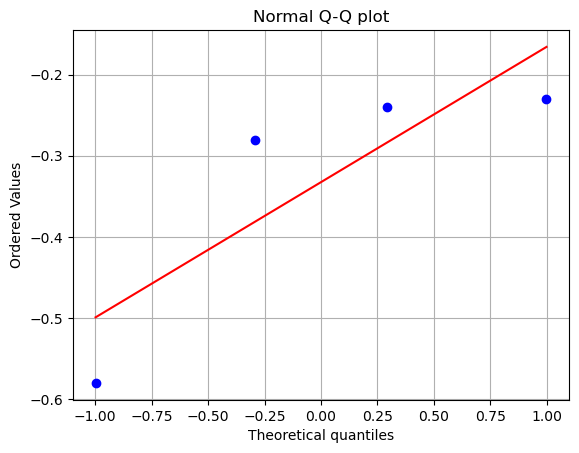

In [3237]:
import scipy.stats as stats
# Create Q-Q plot
stats.probplot(tangibles['Gap'], dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

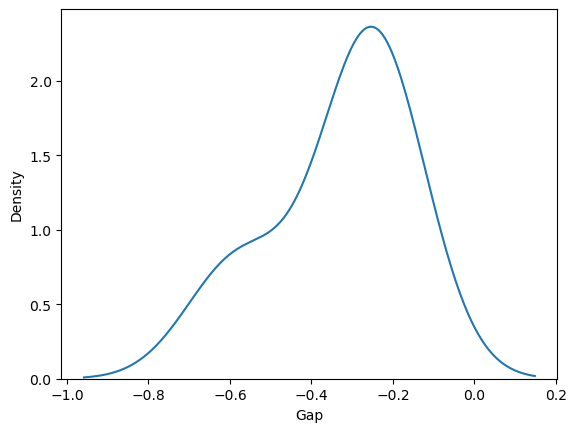

In [3238]:
import seaborn as sns
# plotting density plot for carat using distplot()
sns.distplot(a=tangibles['Gap'], hist=False)
 
# visualizing plot using matplotlib.pyplot library
plt.show()

Conclusion

- Since the p-value is 0.0280190 which is less than the alpha(0.05) then we  reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come  from a normal distribution.

### Reliability

In [3239]:
reliability = combined_mean_df.iloc[4:9]
reliability

,Perception Column,Perception Mean,Expectation Mean,Gap
4,When a hospital employee promises to do someth...,4.02,4.43,-0.41
5,"When a patient has a problem, the hospital's e...",4.05,4.53,-0.48
6,The hospital provides its services at the time...,3.85,4.51,-0.66
7,The hospital always gets things right the firs...,3.97,4.33,-0.36
8,The hospital maintains accurate and error-free...,4.07,4.53,-0.46


In [3240]:
# Checking for normality

from scipy.stats import shapiro,kstest,norm

# Perform the Shapiro-Wilk test
shapiro_test = shapiro(reliability['Gap'])
print(f'Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Perform the Kolmogorov-Smirnov test
ks_test = kstest(reliability['Gap'], 'norm', args=(reliability['Gap'].mean(), reliability['Gap'].std()))
print(f'Kolmogorov-Smirnov Test: D={ks_test.statistic}, p-value={ks_test.pvalue}')

Shapiro-Wilk Test: W=0.9010026454925537, p-value=0.41545212268829346
Kolmogorov-Smirnov Test: D=0.2789998085211126, p-value=0.7448880424392968


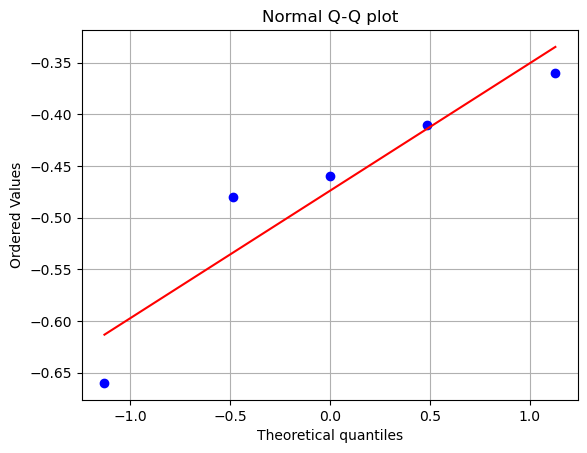

In [3241]:
import scipy.stats as stats
# Create Q-Q plot
stats.probplot(reliability['Gap'], dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

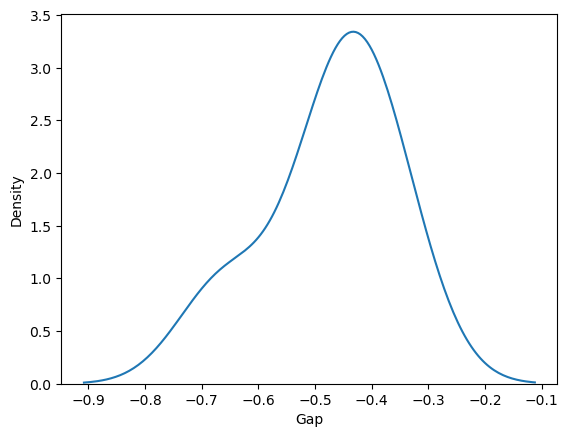

In [3242]:
import seaborn as sns
# plotting density plot for carat using distplot()
sns.distplot(a=reliability['Gap'], hist=False)
 
# visualizing plot using matplotlib.pyplot library
plt.show()

Conclusion

- Since the p-value is 0.415452122 which is greater than the alpha(0.05) then we fail to reject the null hypothesis i.e. we have sufficient evidence to say that sample come  from a normal distribution.

### Responsiveness

In [3243]:
responsiveness = combined_mean_df.iloc[9:13]
responsiveness

,Perception Column,Perception Mean,Expectation Mean,Gap
9,The hospital's employees tell the patients exa...,3.93,4.41,-0.48
10,The hospital's employees provide prompt servic...,3.87,4.48,-0.61
11,The hospital's employees are always willing to...,4.15,4.52,-0.37
12,The hospital's employees are never too busy to...,3.98,4.48,-0.50


In [3244]:
# Checking for normality

from scipy.stats import shapiro,kstest,norm

# Perform the Shapiro-Wilk test
shapiro_test = shapiro(responsiveness['Gap'])
print(f'Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Perform the Kolmogorov-Smirnov test
ks_test = kstest(responsiveness['Gap'], 'norm', args=(responsiveness['Gap'].mean(), responsiveness['Gap'].std()))
print(f'Kolmogorov-Smirnov Test: D={ks_test.statistic}, p-value={ks_test.pvalue}')

Shapiro-Wilk Test: W=0.9763739109039307, p-value=0.8804565668106079
Kolmogorov-Smirnov Test: D=0.20949362053508291, p-value=0.9804283741785784


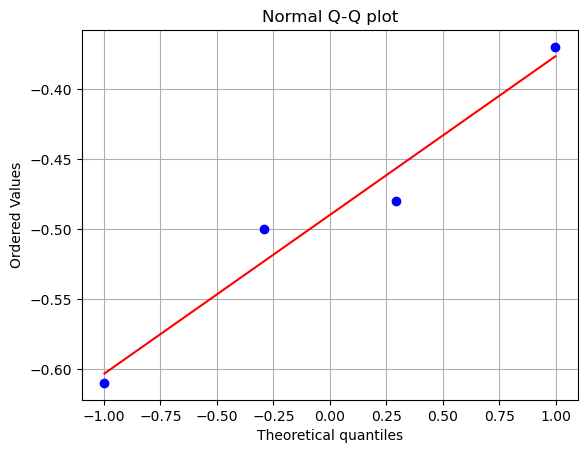

In [3245]:
import scipy.stats as stats
# Create Q-Q plot
stats.probplot(responsiveness['Gap'], dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

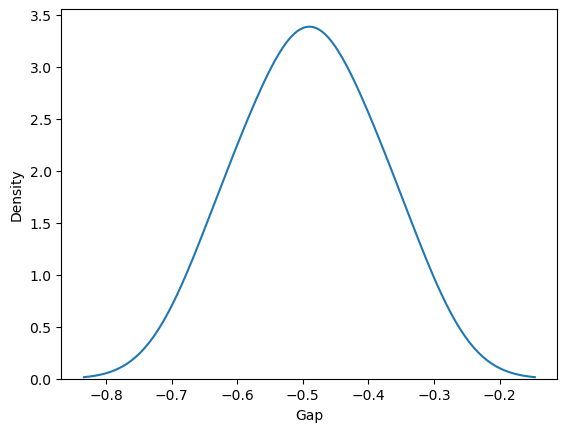

In [3246]:
import seaborn as sns
# plotting density plot for carat using distplot()
sns.distplot(a=responsiveness['Gap'], hist=False)
 
# visualizing plot using matplotlib.pyplot library
plt.show()

Conclusion

- Since the p-value is 0.8804565668106079 which is greater than the alpha(0.05) then we fail to reject the null hypothesis i.e. we have sufficient evidence to say that sample come  from a normal distribution.

### Assurance

In [3247]:
assurance = combined_mean_df.iloc[13:17]
assurance

,Perception Column,Perception Mean,Expectation Mean,Gap
13,The behaviour and attitudes of hospital employ...,4.06,4.54,-0.48
14,Patients feel safe in all their dealings with ...,4.10,4.60,-0.50
15,The hospital's employees are consistently cour...,4.10,4.51,-0.41
16,The hospital's employees are knowledgeable and...,4.12,4.57,-0.45


In [3248]:
# Checking for normality

from scipy.stats import shapiro,kstest,norm

# Perform the Shapiro-Wilk test
shapiro_test = shapiro(assurance['Gap'])
print(f'Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Perform the Kolmogorov-Smirnov test
ks_test = kstest(assurance['Gap'], 'norm', args=(assurance['Gap'].mean(), assurance['Gap'].std()))
print(f'Kolmogorov-Smirnov Test: D={ks_test.statistic}, p-value={ks_test.pvalue}')

Shapiro-Wilk Test: W=0.9713271856307983, p-value=0.8496842980384827
Kolmogorov-Smirnov Test: D=0.19523830982458767, p-value=0.9906539643349858


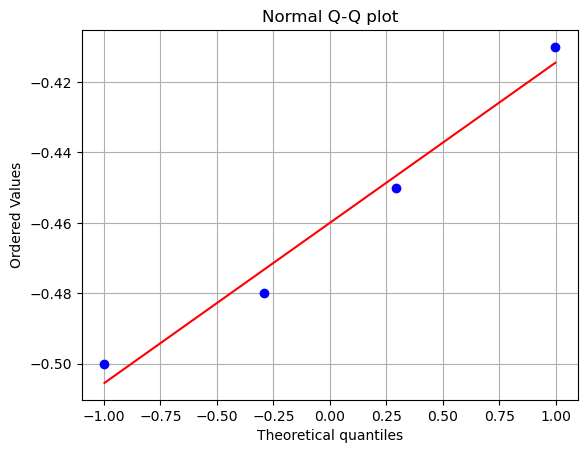

In [3249]:
import scipy.stats as stats
# Create Q-Q plot
stats.probplot(assurance['Gap'], dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

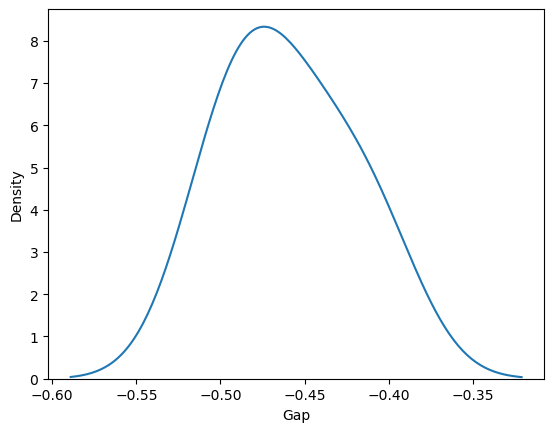

In [3250]:
import seaborn as sns
# plotting density plot for carat using distplot()
sns.distplot(a=assurance['Gap'], hist=False)
 
# visualizing plot using matplotlib.pyplot library
plt.show()

Conclusion

- Since the p-value is 0.8496842980384827 which is greater than the alpha(0.05) then we fail to reject the null hypothesis i.e. we have sufficient evidence to say that sample come  from a normal distribution.

### Empathy

In [3251]:
empathy = combined_mean_df.iloc[17:22]
empathy

,Perception Column,Perception Mean,Expectation Mean,Gap
17,The hospital gives each patient individualised...,4.09,4.43,-0.34
18,The hospital's employees express care in their...,4.11,4.53,-0.42
19,The hospital and its employees have the patien...,4.08,4.62,-0.54
20,The hospital's employees understand the specif...,4.04,4.53,-0.49
21,The operating hours of the hospital are conven...,4.27,4.50,-0.23


In [3252]:
# Checking for normality

from scipy.stats import shapiro,kstest,norm

# Perform the Shapiro-Wilk test
shapiro_test = shapiro(empathy['Gap'])
print(f'Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Perform the Kolmogorov-Smirnov test
ks_test = kstest(empathy['Gap'], 'norm', args=(empathy['Gap'].mean(), empathy['Gap'].std()))
print(f'Kolmogorov-Smirnov Test: D={ks_test.statistic}, p-value={ks_test.pvalue}')

Shapiro-Wilk Test: W=0.9696177840232849, p-value=0.8727949261665344
Kolmogorov-Smirnov Test: D=0.15777519135075257, p-value=0.9975280585094995


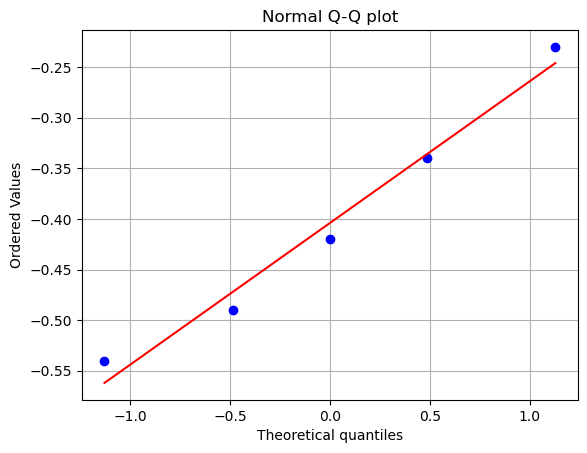

In [3253]:
import scipy.stats as stats
# Create Q-Q plot
stats.probplot(empathy['Gap'], dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

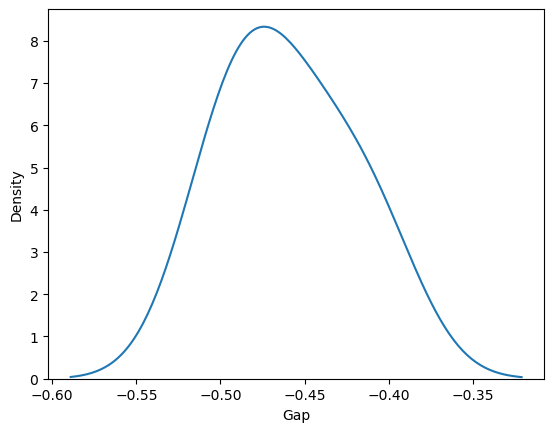

In [3254]:
import seaborn as sns
# plotting density plot for carat using distplot()
sns.distplot(a=assurance['Gap'], hist=False)
 
# visualizing plot using matplotlib.pyplot library
plt.show()

Conclusion

- Since the p-value is 0.8727949261665344 which is greater than the alpha(0.05) then we fail to reject the null hypothesis i.e. we have sufficient evidence to say that sample come  from a normal distribution.

- The assumption of normality of the gaps is met, hence we will use, parametric test

### Statistical significance of the gap (difference) – p-value, Z Value, t value

- Paired Sample t-test -> pvalue

- Since the assumption of normality is met we now use the paired sample t-test to get the statistical significance of the gaps.

 H0: no significant difference between the means of the two related groups (Perception Mean and Expectation Mean).
 
Ha: There is a significant difference between the means of the two related groups.

In [3255]:
combined_mean_df

,Perception Column,Perception Mean,Expectation Mean,Gap
0,"The hospital has modern, up-to-date equipment",3.87,4.45,-0.58
1,The hospital's physical facilities are clean a...,4.30,4.53,-0.23
2,The hospital's employees are well-dressed and ...,4.21,4.45,-0.24
3,Materials associated with the service are visu...,4.13,4.41,-0.28
4,When a hospital employee promises to do someth...,4.02,4.43,-0.41
5,"When a patient has a problem, the hospital's e...",4.05,4.53,-0.48
6,The hospital provides its services at the time...,3.85,4.51,-0.66
7,The hospital always gets things right the firs...,3.97,4.33,-0.36
8,The hospital maintains accurate and error-free...,4.07,4.53,-0.46
9,The hospital's employees tell the patients exa...,3.93,4.41,-0.48


In [3256]:
from scipy.stats import ttest_rel

# Create an empty list to store t-statistics
t_stats = []

# Iterate over DataFrame rows
for index, row in combined_mean_df.iterrows():
    # Extract 'Perception Mean' and 'Expectation Mean' values for the current row
    perception_mean = row['Perception Mean']
    expectation_mean = row['Expectation Mean']
    
    # Compute the t-statistic for the current pair of means
    t_stat, _ = ttest_rel([perception_mean], [expectation_mean])
    
    # Append the computed t-statistic to the list
    t_stats.append(t_stat)

# Add the list of t-statistics to the DataFrame as a new column
combined_mean_df['t-statistic'] = t_stats

# Display the DataFrame with the added t-statistic column
combined_mean_df


,Perception Column,Perception Mean,Expectation Mean,Gap,t-statistic
0,"The hospital has modern, up-to-date equipment",3.87,4.45,-0.58,NaN
1,The hospital's physical facilities are clean a...,4.30,4.53,-0.23,NaN
2,The hospital's employees are well-dressed and ...,4.21,4.45,-0.24,NaN
3,Materials associated with the service are visu...,4.13,4.41,-0.28,NaN
4,When a hospital employee promises to do someth...,4.02,4.43,-0.41,NaN
5,"When a patient has a problem, the hospital's e...",4.05,4.53,-0.48,NaN
6,The hospital provides its services at the time...,3.85,4.51,-0.66,NaN
7,The hospital always gets things right the firs...,3.97,4.33,-0.36,NaN
8,The hospital maintains accurate and error-free...,4.07,4.53,-0.46,NaN
9,The hospital's employees tell the patients exa...,3.93,4.41,-0.48,NaN


In [3257]:
from scipy.stats import ttest_rel

# Example values for demonstration
perception_values = [3.87, 4.30, 4.21, 4.13, 4.02, 4.05, 3.85, 3.97, 4.07, 3.93, 3.87, 4.15,
                     3.98, 4.06, 4.10, 4.10, 4.12, 4.09, 4.11, 4.08, 4.04, 4.27]

expectation_values = [4.45, 4.53, 4.45, 4.41, 4.43, 4.53, 4.51, 4.33, 4.53, 4.41, 4.48, 4.52,
                      4.48, 4.54, 4.60, 4.51, 4.57, 4.43, 4.53, 4.62, 4.53, 4.50]

# Perform the paired t-test
t_stat, p_value = ttest_rel(perception_values, expectation_values)

print(f'T-test: t-statistic={t_stat}, p-value={p_value}')


T-test: t-statistic=-17.03729437754641, p-value=9.012460800589452e-14


### For Each Group

#### Tangibles

In [3258]:
# Mean values per question
perception_values = [3.87, 4.30, 4.21, 4.13]

expectation_values = [4.45, 4.53, 4.45, 4.41]

# Perform the paired t-test
t_stat, p_value = ttest_rel(perception_values, expectation_values)

print(f'T-test: t-statistic={t_stat}, p-value={p_value}')

T-test: t-statistic=-3.9961989162091984, p-value=0.02807822905048232


#### Reliabilty

In [3259]:
# Mean values per question
perception_values = [4.02, 4.05, 3.85, 3.97, 4.07]

expectation_values = [4.43, 4.53, 4.51, 4.33, 4.53]

# Perform the paired t-test
t_stat, p_value = ttest_rel(perception_values, expectation_values)

print(f'T-test: t-statistic={t_stat}, p-value={p_value}')

T-test: t-statistic=-9.303063762949495, p-value=0.0007428703106135155


#### Responsiveness

In [3260]:
# Mean values per question
perception_values =  [3.93, 3.87, 4.15,3.98]

expectation_values = [4.41, 4.48, 4.52, 4.48]

# Perform the paired t-test
t_stat, p_value = ttest_rel(perception_values, expectation_values)

print(f'T-test: t-statistic={t_stat}, p-value={p_value}')

T-test: t-statistic=-9.967533503225866, p-value=0.0021487740073459346


#### Assurance

In [3261]:
# Mean values per question
perception_values =  [4.06, 4.10, 4.10, 4.12]

expectation_values = [4.54, 4.60, 4.51, 4.57]

# Perform the paired t-test
t_stat, p_value = ttest_rel(perception_values, expectation_values)

print(f'T-test: t-statistic={t_stat}, p-value={p_value}')

T-test: t-statistic=-23.494680248941474, p-value=0.00016894175657185926


#### Empathy

In [3262]:

# Mean values per question
perception_values =  [4.09, 4.11, 4.08, 4.04, 4.27]

expectation_values = [4.43, 4.53, 4.62, 4.53, 4.50]

# Perform the paired t-test
t_stat, p_value = ttest_rel(perception_values, expectation_values)

print(f'T-test: t-statistic={t_stat}, p-value={p_value}')

T-test: t-statistic=-7.34424072167605, p-value=0.0018302271931060403


### For Each Statement

In [3263]:
halisi_df.columns

Index(['Timestamp',
       'Have you fully understood the purpose of this survey and how your information will be handled?',
       'What gender do you identify as?', 'What is your age?',
       'What is the highest level of education you have completed?',
       'What is your current work status?',
       'How do you pay for the majority of your medical expenses?',
       'What is your average monthly household income?',
       'The hospital should have modern, up-to-date equipment',
       'The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)',
       'The hospital's employees should be well-dressed and have a neat and professional appearance',
       'Materials associated with the service should be visually appealing',
       'When a hospital employee promises to do something by a particular time, they should do it',
       'When a patient has a problem, the hospital's employees should show a sincere 

In [3264]:
# statement 1
expectation= np.array(halisi_df['The hospital should have modern, up-to-date equipment'])
perception = np.array(halisi_df['The hospital has modern, up-to-date equipment'])

# Perform the paired t-test
t_stat, p_value = ttest_rel(perception, expectation)

print(f'T-test: t-statistic={t_stat}, p-value={p_value}')        

T-test: t-statistic=-6.784065842438756, p-value=1.781141259409975e-10


In [3265]:
# statement 2
expectation= np.array(halisi_df["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"])
perception = np.array(halisi_df["The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"])

# Perform the paired t-test
t_stat, p_value = ttest_rel(perception, expectation)

print(f'T-test: t-statistic={t_stat}, p-value={p_value}')        


T-test: t-statistic=-3.5672643894529874, p-value=0.0004667861471318213


In [3266]:
# statement 3
expectation= np.array(halisi_df["The hospital's employees should be well-dressed and have a neat and professional appearance"])
perception = np.array(halisi_df["The hospital's employees are well-dressed and have a neat and professional appearance"])

# Perform the paired t-test
t_stat, p_value = ttest_rel(perception, expectation)

print(f'T-test: t-statistic={t_stat}, p-value={p_value}')        


T-test: t-statistic=-3.8575422160370327, p-value=0.0001614084598712904


In [3267]:
# statement 4
expectation= np.array(halisi_df["Materials associated with the service should be visually appealing"])
perception = np.array(halisi_df["Materials associated with the service are visually appealing"])

# Perform the paired t-test
t_stat, p_value = ttest_rel(perception, expectation)

print(f'T-test: t-statistic={t_stat}, p-value={p_value}')        


T-test: t-statistic=-4.027067478801336, p-value=8.439706076819537e-05


# Statement 5


## Inferential Statistics

To check for relationships between the perception of healthcare service quality (PSQ=Gap) and sociodemographic variables.

First, check that the differences in responses within each sociodemographic category are statistically significant.

Independent sample t-test, ANOVA, bivariate and multivariate analysis?
Regression analysis?


![Screenshot 2024-05-21 230258.png](<attachment:Screenshot 2024-05-21 230258.png>)
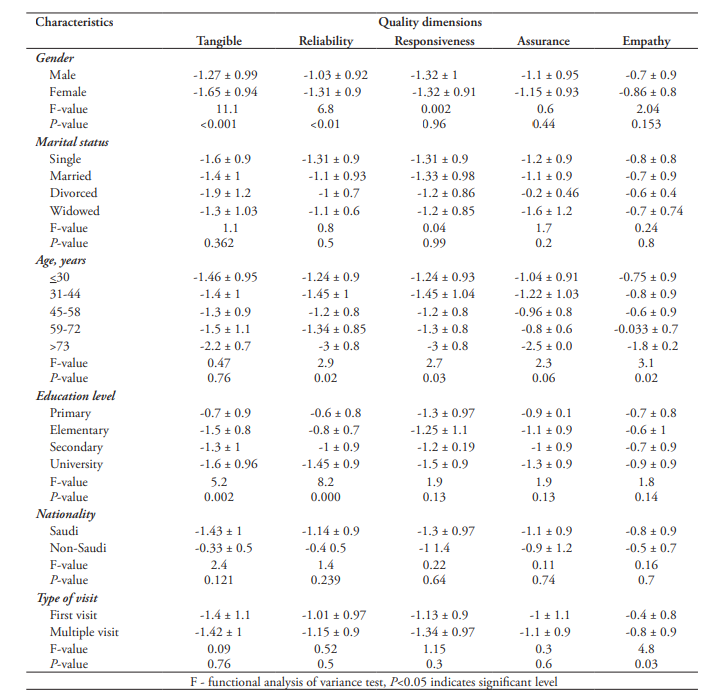

## Gender

- To assess whether there are differences between patients gender in terms of overall satisfaction received. Which group is most satisfied?

### - ANOVA, Significance , change the questions, calculate gap, encoding, fit ANOVA  -> F stat and P-value

#### Tangibles

In [3268]:
# Melt the DataFrame to form one column - Tangible Expectation
tangible_expectation = halisi_df.melt(id_vars=['What gender do you identify as?'], value_vars=['The hospital should have modern, up-to-date equipment',
                                                           "The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",
                                                           "The hospital's employees should be well-dressed and have a neat and professional appearance",
                                                           'Materials associated with the service should be visually appealing'],
                    var_name='Questions_x', value_name='Expectation Score')


# Melt the DataFrame to form one column - Tangible Perception
tangible_perception = halisi_df.melt(id_vars=['What gender do you identify as?'], value_vars=['The hospital has modern, up-to-date equipment',
                                                                                                "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",
                                                                                                "The hospital's employees are well-dressed and have a neat and professional appearance",
                                                                                                  'Materials associated with the service are visually appealing'],
                                                                                                  var_name='Questions_y', value_name='Perception Score')

# Renaming the column
tangible_perception.rename(columns={'What gender do you identify as?': 'Gender'}, inplace=True)
tangible_perception

# Concat Dataframes
tangibles= pd.concat([tangible_perception, tangible_expectation],axis=1)
tangibles

tangibles = tangibles.drop(['Questions_x','Questions_y','What gender do you identify as?'],axis=1)
tangibles

# Creating the new column Gap
tangibles['Gap']= tangibles["Perception Score"]- tangibles['Expectation Score']
tangibles


### Preparing the data to fit an ANOVA

# encoding the gender 
categoryGender = {1:'Male', 2 : 'Female', 3:'Other', 4:'Prefer not to say'}
tangibles['Gender'] = tangibles['Gender'].map(categoryGender)
tangibles

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols('Gap ~ Gender',data=tangibles).fit()
aov_table =sm.stats.anova_lm(mod,type=1)
print(aov_table)


             df      sum_sq   mean_sq         F    PR(>F)
Gender      3.0   13.117086  4.372362  4.896852  0.002247
Residual  692.0  617.881478  0.892892       NaN       NaN


p-value = 0.002247  is less than 0.05, we reject the null hypothesis, indicating a significant difference in satisfaction across genders.

### Reliability

In [3269]:
# Melt the DataFrame to form one column - Tangible Expectation
reliability_expectation = halisi_df.melt(id_vars=['What gender do you identify as?'],
                                         value_vars=['When a hospital employee promises to do something by a particular time, they should do it',
                                           "When a patient has a problem, the hospital's employees should show a sincere interest in solving it",
                                            "The hospital should provide its services at the time it promises to do",
                                            "The hospital should provide its services at the time it promises to do"],
                    var_name='Questions_x', value_name='Expectation Score')


# Melt the DataFrame to form one column - Tangible Perception
reliability_perception = halisi_df.melt(id_vars=['What gender do you identify as?'], value_vars=
                                        ["When a hospital employee promises to do something by a particular time, they do it",
                                        "When a patient has a problem, the hospital's employees show a sincere interest in solving it",
                                        "The hospital provides its services at the time it promises to do",
                                        "The hospital always gets things right the first time",
                                        "The hospital maintains accurate and error-free records"
                                        ],
                                                                                                  var_name='Questions_y', value_name='Perception Score')

# Renaming the column
reliability_perception.rename(columns={'What gender do you identify as?': 'Gender'}, inplace=True)
reliability_perception

# Concat Dataframes
reliability= pd.concat([reliability_perception, reliability_expectation],axis=1)
reliability

reliability = reliability.drop(['Questions_x','Questions_y','What gender do you identify as?'],axis=1)
reliability

# Creating the new column Gap
reliability['Gap']= reliability["Perception Score"]- reliability['Expectation Score']
reliability


### Preparing the data to fit an ANOVA

# encoding the gender 
categoryGender = {1:'Male', 2 : 'Female', 3:'Other', 4:'Prefer not to say'}
reliability['Gender'] = reliability['Gender'].map(categoryGender)
reliability

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols('Gap ~ Gender',data=reliability).fit()
aov_table =sm.stats.anova_lm(mod,type=1)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
Gender      3.0   21.469622  7.156541  7.283989  0.000086
Residual  518.0  508.936508  0.982503       NaN       NaN


p-value = 0.000086  is less than 0.05, we reject the null hypothesis, indicating a significant difference in satisfaction across genders.

### Responsiveness

In [3270]:
# Melt the DataFrame to form one column - Tangible Expectation
responsiveness_expectation = halisi_df.melt(
    id_vars=["What gender do you identify as?"],
    value_vars=[
        "The hospital's employees should tell the patient exactly when services will be performed",
        "The hospital's employees should provide prompt service to patients",
        "The hospital's employees should always be willing to help patients",
        "The hospital's employees should never be too busy to respond to patients' requests"],
    var_name="Questions_x",
    value_name="Expectation Score",
)


# Melt the DataFrame to form one column - Tangible Perception
responsiveness_perception = halisi_df.melt(
    id_vars=["What gender do you identify as?"],
    value_vars=[
        "The hospital's employees tell the patients exactly when services will be performed",
        "The hospital's employees provide prompt service to patients",
        "The hospital's employees are always willing to help patients",
        "The hospital's employees are never too busy to respond to patients' requests",
    ],
    var_name="Questions_y",
    value_name="Perception Score",
)

# Renaming the column
responsiveness_perception.rename(
    columns={"What gender do you identify as?": "Gender"}, inplace=True
)
responsiveness_perception

# Concat Dataframes
responsiveness = pd.concat(
    [responsiveness_perception, responsiveness_expectation], axis=1
)
responsiveness

responsiveness = responsiveness.drop(
    ["Questions_x", "Questions_y", "What gender do you identify as?"], axis=1
)
responsiveness

# Creating the new column Gap
responsiveness["Gap"] = (
    responsiveness["Perception Score"] - responsiveness["Expectation Score"]
)
responsiveness


### Preparing the data to fit an ANOVA

# encoding the gender
categoryGender = {1: "Male", 2: "Female", 3: "Other", 4: "Prefer not to say"}
responsiveness["Gender"] = responsiveness["Gender"].map(categoryGender)
responsiveness

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols("Gap ~ Gender", data=responsiveness).fit()
aov_table = sm.stats.anova_lm(mod, type=1)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
Gender      3.0   17.580419  5.860140  5.645042  0.000798
Residual  692.0  718.367857  1.038104       NaN       NaN


p-value = 0.000798  is less than 0.05, we reject the null hypothesis, indicating a significant difference in satisfaction across genders.

### Assurance

In [3271]:
# Melt the DataFrame to form one column - Assurance  Expectation
assurance_expectation = halisi_df.melt(
    id_vars=["What gender do you identify as?"],
    value_vars=[
        "The behaviour and attitudes of hospital employees should instill confidence in patients",
        "Patients should feel safe in all their dealings with the hospital and its employees",
        "Hospital employees should be consistently courteous to patients",
        "Hospital employees should be knowledgeable and able to answer patients' questions",
    ],
    var_name="Questions_x",
    value_name="Expectation Score",
)


# Melt the DataFrame to form one column - Tangible Perception
assurance_perception = halisi_df.melt(
    id_vars=["What gender do you identify as?"],
    value_vars=[
        "The behaviour and attitudes of hospital employees instill confidence in patients",
        "Patients feel safe in all their dealings with the hospital and its employees",
        "The hospital's employees are consistently courteous to patients",
        "The hospital's employees are knowledgeable and able to answer patients' questions",
    ],
    var_name="Questions_y",
    value_name="Perception Score",
)

# Renaming the column
assurance_perception.rename(
    columns={"What gender do you identify as?": "Gender"}, inplace=True
)
assurance_perception

# Concat Dataframes
assurance = pd.concat([assurance_perception, assurance_expectation], axis=1)
assurance

assurance = assurance.drop(
    ["Questions_x", "Questions_y", "What gender do you identify as?"], axis=1
)
assurance

# Creating the new column Gap
assurance["Gap"] = assurance["Perception Score"] - assurance["Expectation Score"]
assurance

### Preparing the data to fit an ANOVA

# encoding the gender
categoryGender = {1: "Male", 2: "Female", 3: "Other", 4: "Prefer not to say"}
assurance["Gender"] = assurance["Gender"].map(categoryGender)
assurance

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols("Gap ~ Gender", data=assurance).fit()
aov_table = sm.stats.anova_lm(mod, type=1)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
Gender      3.0   12.546709  4.182236  5.417192  0.001094
Residual  692.0  534.244958  0.772030       NaN       NaN


p-value = 0.001094  is less than 0.05, we reject the null hypothesis, indicating a significant difference in satisfaction across genders.

### Empathy

In [3272]:
# Melt the DataFrame to form one column - Assurance  Expectation
empathy_expectation = halisi_df.melt(
    id_vars=["What gender do you identify as?"],
    value_vars=[ "The hospital should give each patient individualised attention",
    "The hospital's employees should express care in their interaction with patients",
    "The hospital and its employees should have the patients' best interests at heart",
    "The hospital's employees should understand the specific needs of each of their patients",
    "The operating hours of the hospital should be convenient for all its patients",

    ],
    var_name="Questions_x",
    value_name="Expectation Score",
)


# Melt the DataFrame to form one column - Tangible Perception
empathy_perception = halisi_df.melt(
    id_vars=["What gender do you identify as?"],
    value_vars=[
 "The hospital gives each patient individualised attention",
    "The hospital's employees express care in their interaction with patients",
    "The hospital and its employees have the patients' best interests at heart",
    "The hospital's employees understand the specific needs of each of their patients",
    "The operating hours of the hospital are convenient for all its patients",
    ],
    var_name="Questions_y",
    value_name="Perception Score",
)

# Renaming the column
empathy_perception.rename(
    columns={"What gender do you identify as?": "Gender"}, inplace=True
)
empathy_perception

# Concat Dataframes
empathy = pd.concat([empathy_perception, empathy_expectation], axis=1)
empathy

empathy = empathy.drop(
    ["Questions_x", "Questions_y", "What gender do you identify as?"], axis=1
)
empathy

# Creating the new column Gap
empathy["Gap"] = empathy["Perception Score"] - empathy["Expectation Score"]
empathy

### Preparing the data to fit an ANOVA

# encoding the gender
categoryGender = {1: "Male", 2: "Female", 3: "Other", 4: "Prefer not to say"}
empathy["Gender"] = empathy["Gender"].map(categoryGender)
empathy

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols("Gap ~ Gender", data=empathy).fit()
aov_table = sm.stats.anova_lm(mod, type=1)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
Gender      3.0   17.253990  5.751330  7.474779  0.000061
Residual  866.0  666.327619  0.769431       NaN       NaN


p-value = 0.000061  is less than 0.05, we reject the null hypothesis, indicating a significant difference in satisfaction across genders.

-> Dealing with categories, 

  i.e Tangibles
   * Split into the different categories : Male,Female, Prefer not to say, Other

Male: 
   * Focusing on the Male, l have all the questions included

   * Starting with the tangibility questions (Tangibility Perception, Tangibility Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Male gender

   * Next Reliability questions ( Reliability Perception, Reliability Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Male gender

   * Next Responsiveness questions ( Responsiveness Perception, Responsiveness Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Male gender

   * Next Assurance questions ( Assurance Perception, Assurance Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Male gender

   * Next Empathy questions ( Empathy Perception, Empathy Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Male gender

Female: 

   * Focusing on the Female, l have all the questions included

   * Starting with the tangibility questions (Tangibility Perception, Tangibility Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Female gender

   * Next Reliability questions ( Reliability Perception, Reliability Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Female gender

   * Next Responsiveness questions ( Responsiveness Perception, Responsiveness Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Female gender

   * Next Assurance questions ( Assurance Perception, Assurance Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Female gender

   * Next Empathy questions ( Empathy Perception, Empathy Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Female gender


Prefer not to say: 

   * Focusing on the Prefer not to say, l have all the questions included

   * Starting with the tangibility questions (Tangibility Perception, Tangibility Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Prefer not to say gender

   * Next Reliability questions ( Reliability Perception, Reliability Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Prefer not to say gender

   * Next Responsiveness questions ( Responsiveness Perception, Responsiveness Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Prefer not to say gender

   * Next Assurance questions ( Assurance Perception, Assurance Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Prefer not to say gender

   * Next Empathy questions ( Empathy Perception, Empathy Expectation)
   * Calculate the Gap
   * Get the mean of the gap and std of the gap of the Prefer not to say gender









### Male

In [3273]:
# Male

# Extract rows where Gender is 'Male'
male_df = df[df['What gender do you identify as?'] == 'Male']


#### Tangibles

In [3274]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([male_df['The hospital should have modern, up-to-date equipment'],
male_df["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
male_df["The hospital's employees should be well-dressed and have a neat and professional appearance"], male_df['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - Male: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - Male: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - Male: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - Male: 4.53
Variance (Tangibles_Expectation) of the first four columns - Male: 0.47
Standard Deviation (Tangibles_Expectation) of the first four columns - Male: 0.68


In [3275]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([male_df['The hospital has modern, up-to-date equipment'],
male_df[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
male_df["The hospital's employees are well-dressed and have a neat and professional appearance"], male_df['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.06
Variance (Tangible_Perception) of the first four columns - Male: 0.41
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.64


In [3276]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.47, 0.94)

#### Reliability

In [3277]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([male_df['When a hospital employee promises to do something by a particular time, they should do it'],
male_df["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
male_df["The hospital should provide its services at the time it promises to do"], male_df['The hospital should always get things right the first time'],  
male_df['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.54
Variance (Reliability_Expectation) of the first four columns: 0.43
Standard Deviation (Reliability_Expectation) of the first four columns: 0.65


In [3278]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    male_df["When a hospital employee promises to do something by a particular time, they do it"],
    male_df["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    male_df["The hospital provides its services at the time it promises to do"],
    male_df["The hospital always gets things right the first time"],
    male_df["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 3.91
Variance (Reliability_Perception) of the first four columns: 0.52
Standard Deviation (Reliability_Perception) of the first four columns: 0.72


In [3279]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.63, 0.97)

#### Responsiveness

In [3280]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    male_df["The hospital's employees should tell the patient exactly when services will be performed"],
    male_df["The hospital's employees should provide prompt service to patients"],
    male_df["The hospital's employees should always be willing to help patients"],
    male_df["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.53
Variance (Responsiveness_Expectation) of the first four columns: 0.43
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.66


In [3281]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    male_df["The hospital's employees tell the patients exactly when services will be performed"],
    male_df["The hospital's employees provide prompt service to patients"],
    male_df["The hospital's employees are always willing to help patients"],
    male_df["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 3.88
Variance (Responsiveness_Perception) of the first four columns: 0.50
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.71


In [3282]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.65, 0.97)

#### Assurance

In [3283]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    male_df["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    male_df["Patients should feel safe in all their dealings with the hospital and its employees"],
    male_df["Hospital employees should be consistently courteous to patients"],
    male_df["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.60
Variance (Assurance_Expectation) of the first four columns: 0.36
Standard Deviation (Assurance_Expectation) of the first four columns: 0.60


In [3284]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    male_df["The behaviour and attitudes of hospital employees instill confidence in patients"],
    male_df["Patients feel safe in all their dealings with the hospital and its employees"],
    male_df["The hospital's employees are consistently courteous to patients"],
    male_df["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.01
Variance (Assurance_Perception) of the first four columns: 0.25
Standard Deviation (Assurance_Perception) of the first four columns: 0.50


In [3285]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.59, 0.78)

#### Empathy

In [3286]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    male_df["The hospital should give each patient individualised attention"],
    male_df["The hospital's employees should express care in their interaction with patients"],
    male_df["The hospital and its employees should have the patients' best interests at heart"],
    male_df["The hospital's employees should understand the specific needs of each of their patients"],
    male_df["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.57
Variance (Empathy_Expectation) of the first four columns: 0.37
Standard Deviation (Empathy_Expectation) of the first four columns: 0.61


In [3287]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    male_df["The hospital gives each patient individualised attention"],
    male_df["The hospital's employees express care in their interaction with patients"],
    male_df["The hospital and its employees have the patients' best interests at heart"],
    male_df["The hospital's employees understand the specific needs of each of their patients"],
    male_df["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.05
Variance (Empathy_Perception) of the first four columns: 0.37
Standard Deviation (Empathy_Perception) of the first four columns: 0.61


In [3288]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.52, 0.86)

#### Summary

In [3289]:
mean_gap1,std_dev_gap1,mean_gap2,std_dev_gap2,mean_gap3,std_dev_gap3,mean_gap4,std_dev_gap4, mean_gap5,std_dev_gap5


(-0.47, 0.94, -0.63, 0.97, -0.65, 0.97, -0.59, 0.78, -0.52, 0.86)

### Female

In [3290]:
#FeMale

# Extract rows where Gender is 'Male'
female_df = df[df['What gender do you identify as?'] == 'Female']



#### Tangibles

In [3291]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([female_df['The hospital should have modern, up-to-date equipment'],
female_df["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
female_df["The hospital's employees should be well-dressed and have a neat and professional appearance"], male_df['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - Male: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - Male: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - Male: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - Male: 4.42
Variance (Tangibles_Expectation) of the first four columns - Male: 0.70
Standard Deviation (Tangibles_Expectation) of the first four columns - Male: 0.84


In [3292]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([female_df['The hospital has modern, up-to-date equipment'],
female_df[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
female_df["The hospital's employees are well-dressed and have a neat and professional appearance"], male_df['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.15
Variance (Tangible_Perception) of the first four columns - Male: 0.52
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.72


In [3293]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.27, 1.1)

#### Reliability

In [3294]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([female_df['When a hospital employee promises to do something by a particular time, they should do it'],
female_df["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
female_df["The hospital should provide its services at the time it promises to do"], male_df['The hospital should always get things right the first time'],  
female_df['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.42
Variance (Reliability_Expectation) of the first four columns: 0.71
Standard Deviation (Reliability_Expectation) of the first four columns: 0.84


In [3295]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    female_df["When a hospital employee promises to do something by a particular time, they do it"],
    female_df["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    female_df["The hospital provides its services at the time it promises to do"],
    female_df["The hospital always gets things right the first time"],
    female_df["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 4.08
Variance (Reliability_Perception) of the first four columns: 0.55
Standard Deviation (Reliability_Perception) of the first four columns: 0.74


In [3296]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.34, 1.12)

#### Responsiveness

In [3297]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    female_df["The hospital's employees should tell the patient exactly when services will be performed"],
    female_df["The hospital's employees should provide prompt service to patients"],
    female_df["The hospital's employees should always be willing to help patients"],
    female_df["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.43
Variance (Responsiveness_Expectation) of the first four columns: 0.82
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.90


In [3298]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    female_df["The hospital's employees tell the patients exactly when services will be performed"],
    female_df["The hospital's employees provide prompt service to patients"],
    female_df["The hospital's employees are always willing to help patients"],
    female_df["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 4.10
Variance (Responsiveness_Perception) of the first four columns: 0.52
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.72


In [3299]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.33, 1.16)

#### Assurance

In [3300]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    female_df["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    female_df["Patients should feel safe in all their dealings with the hospital and its employees"],
    female_df["Hospital employees should be consistently courteous to patients"],
    female_df["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.52
Variance (Assurance_Expectation) of the first four columns: 0.70
Standard Deviation (Assurance_Expectation) of the first four columns: 0.84


In [3301]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    female_df["The behaviour and attitudes of hospital employees instill confidence in patients"],
    female_df["Patients feel safe in all their dealings with the hospital and its employees"],
    female_df["The hospital's employees are consistently courteous to patients"],
    female_df["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.18
Variance (Assurance_Perception) of the first four columns: 0.45
Standard Deviation (Assurance_Perception) of the first four columns: 0.67


In [3302]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.34, 1.08)

#### Empathy

In [3303]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    female_df["The hospital should give each patient individualised attention"],
    female_df["The hospital's employees should express care in their interaction with patients"],
    female_df["The hospital and its employees should have the patients' best interests at heart"],
    female_df["The hospital's employees should understand the specific needs of each of their patients"],
    female_df["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.48
Variance (Empathy_Expectation) of the first four columns: 0.76
Standard Deviation (Empathy_Expectation) of the first four columns: 0.87


In [3304]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    female_df["The hospital gives each patient individualised attention"],
    female_df["The hospital's employees express care in their interaction with patients"],
    female_df["The hospital and its employees have the patients' best interests at heart"],
    female_df["The hospital's employees understand the specific needs of each of their patients"],
    female_df["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.20
Variance (Empathy_Perception) of the first four columns: 0.44
Standard Deviation (Empathy_Perception) of the first four columns: 0.66


In [3305]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.28, 1.1)

#### Summary

In [3306]:
mean_gap1,std_dev_gap1,mean_gap2,std_dev_gap2,mean_gap3,std_dev_gap3,mean_gap4,std_dev_gap4, mean_gap5,std_dev_gap5


(-0.27, 1.1, -0.34, 1.12, -0.33, 1.16, -0.34, 1.08, -0.28, 1.1)

### Prefer  not to Say

In [3307]:
df['What gender do you identify as?'].value_counts()

What gender do you identify as?
Male                 85
Female               84
Prefer not to say     4
Other                 1
Name: count, dtype: int64

In [3308]:
# Male

# Extract rows where Gender is 'df['What gender do you identify as?']'
nosay_df = df[df['What gender do you identify as?'] == 'Prefer not to say']

#### Tangibles

In [3309]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nosay_df['The hospital should have modern, up-to-date equipment'],
nosay_df["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
nosay_df["The hospital's employees should be well-dressed and have a neat and professional appearance"], nosay_df['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.44
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.26
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.51


In [3310]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nosay_df['The hospital has modern, up-to-date equipment'],
nosay_df[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
nosay_df["The hospital's employees are well-dressed and have a neat and professional appearance"], nosay_df['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.06
Variance (Tangible_Perception) of the first four columns - Male: 0.20
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.44


In [3311]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.38, 0.68)

#### Reliability

In [3312]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nosay_df['When a hospital employee promises to do something by a particular time, they should do it'],
nosay_df["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
nosay_df["The hospital should provide its services at the time it promises to do"], nosay_df['The hospital should always get things right the first time'],  
nosay_df['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.35
Variance (Reliability_Expectation) of the first four columns: 0.45
Standard Deviation (Reliability_Expectation) of the first four columns: 0.67


In [3313]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nosay_df["When a hospital employee promises to do something by a particular time, they do it"],
    nosay_df["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    nosay_df["The hospital provides its services at the time it promises to do"],
    nosay_df["The hospital always gets things right the first time"],
    nosay_df["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 3.75
Variance (Reliability_Perception) of the first four columns: 0.20
Standard Deviation (Reliability_Perception) of the first four columns: 0.44


In [3314]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.6, 0.8)

#### Responsiveness

In [3315]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nosay_df["The hospital's employees should tell the patient exactly when services will be performed"],
    nosay_df["The hospital's employees should provide prompt service to patients"],
    nosay_df["The hospital's employees should always be willing to help patients"],
    nosay_df["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.38
Variance (Responsiveness_Expectation) of the first four columns: 0.52
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.72


In [3316]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nosay_df["The hospital's employees tell the patients exactly when services will be performed"],
    nosay_df["The hospital's employees provide prompt service to patients"],
    nosay_df["The hospital's employees are always willing to help patients"],
    nosay_df["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 3.81
Variance (Responsiveness_Perception) of the first four columns: 0.30
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.54


In [3317]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.56, 0.9)

#### Assurance

In [3318]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nosay_df["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    nosay_df["Patients should feel safe in all their dealings with the hospital and its employees"],
    nosay_df["Hospital employees should be consistently courteous to patients"],
    nosay_df["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.31
Variance (Assurance_Expectation) of the first four columns: 0.23
Standard Deviation (Assurance_Expectation) of the first four columns: 0.48


In [3319]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nosay_df["The behaviour and attitudes of hospital employees instill confidence in patients"],
    nosay_df["Patients feel safe in all their dealings with the hospital and its employees"],
    nosay_df["The hospital's employees are consistently courteous to patients"],
    nosay_df["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.19
Variance (Assurance_Perception) of the first four columns: 0.16
Standard Deviation (Assurance_Perception) of the first four columns: 0.40


In [3320]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.12, 0.63)

#### Empathy

In [3321]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nosay_df["The hospital should give each patient individualised attention"],
    nosay_df["The hospital's employees should express care in their interaction with patients"],
    nosay_df["The hospital and its employees should have the patients' best interests at heart"],
    nosay_df["The hospital's employees should understand the specific needs of each of their patients"],
    nosay_df["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.25
Variance (Empathy_Expectation) of the first four columns: 0.30
Standard Deviation (Empathy_Expectation) of the first four columns: 0.55


In [3322]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    nosay_df["The hospital gives each patient individualised attention"],
    nosay_df["The hospital's employees express care in their interaction with patients"],
    nosay_df["The hospital and its employees have the patients' best interests at heart"],
    nosay_df["The hospital's employees understand the specific needs of each of their patients"],
    nosay_df["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 3.95
Variance (Empathy_Perception) of the first four columns: 0.37
Standard Deviation (Empathy_Perception) of the first four columns: 0.60


In [3323]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.3, 0.82)

### Other

In [3324]:
# Male

# Extract rows where Gender is 'df['What gender do you identify as?']'
other = df[df['What gender do you identify as?'] == 'Other']

#### Tangibles

In [3325]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([other['The hospital should have modern, up-to-date equipment'],
other["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
other["The hospital's employees should be well-dressed and have a neat and professional appearance"], other['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.75
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.25
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.50


In [3326]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([other['The hospital has modern, up-to-date equipment'],
other[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
other["The hospital's employees are well-dressed and have a neat and professional appearance"], other['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.25
Variance (Tangible_Perception) of the first four columns - Male: 0.25
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.50


In [3327]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.5, 0.71)

#### Reliability

In [3328]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([other['When a hospital employee promises to do something by a particular time, they should do it'],
other["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
other["The hospital should provide its services at the time it promises to do"], other['The hospital should always get things right the first time'],  
other['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 3.60
Variance (Reliability_Expectation) of the first four columns: 1.30
Standard Deviation (Reliability_Expectation) of the first four columns: 1.14


In [3329]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    other["When a hospital employee promises to do something by a particular time, they do it"],
    other["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    other["The hospital provides its services at the time it promises to do"],
    other["The hospital always gets things right the first time"],
    other["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 4.60
Variance (Reliability_Perception) of the first four columns: 0.30
Standard Deviation (Reliability_Perception) of the first four columns: 0.55


In [3330]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(1.0, 1.26)

#### Responsiveness

In [3331]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    other["The hospital's employees should tell the patient exactly when services will be performed"],
    other["The hospital's employees should provide prompt service to patients"],
    other["The hospital's employees should always be willing to help patients"],
    other["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 3.50
Variance (Responsiveness_Expectation) of the first four columns: 1.00
Standard Deviation (Responsiveness_Expectation) of the first four columns: 1.00


In [3332]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    other["The hospital's employees tell the patients exactly when services will be performed"],
    other["The hospital's employees provide prompt service to patients"],
    other["The hospital's employees are always willing to help patients"],
    other["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 3.25
Variance (Responsiveness_Perception) of the first four columns: 0.92
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.96


In [3333]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.25, 1.38)

#### Assurance

In [3334]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    other["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    other["Patients should feel safe in all their dealings with the hospital and its employees"],
    other["Hospital employees should be consistently courteous to patients"],
    other["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.50
Variance (Assurance_Expectation) of the first four columns: 1.00
Standard Deviation (Assurance_Expectation) of the first four columns: 1.00


In [3335]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    other["The behaviour and attitudes of hospital employees instill confidence in patients"],
    other["Patients feel safe in all their dealings with the hospital and its employees"],
    other["The hospital's employees are consistently courteous to patients"],
    other["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.00
Variance (Assurance_Perception) of the first four columns: 0.00
Standard Deviation (Assurance_Perception) of the first four columns: 0.00


In [3336]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.5, 1.0)

#### Empathy 

In [3337]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    other["The hospital should give each patient individualised attention"],
    other["The hospital's employees should express care in their interaction with patients"],
    other["The hospital and its employees should have the patients' best interests at heart"],
    other["The hospital's employees should understand the specific needs of each of their patients"],
    other["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.80
Variance (Empathy_Expectation) of the first four columns: 0.20
Standard Deviation (Empathy_Expectation) of the first four columns: 0.45


In [3338]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    other["The hospital gives each patient individualised attention"],
    other["The hospital's employees express care in their interaction with patients"],
    other["The hospital and its employees have the patients' best interests at heart"],
    other["The hospital's employees understand the specific needs of each of their patients"],
    other["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 3.40
Variance (Empathy_Perception) of the first four columns: 0.80
Standard Deviation (Empathy_Perception) of the first four columns: 0.89


In [3339]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-1.4, 1.0)

####

## Age

In [3340]:
halisi_df['What is your age?'].value_counts()

What is your age?
1    111
2     52
4      9
3      2
Name: count, dtype: int64

### ** ANOVA **

#### Tangibles

In [3341]:
# Melt the DataFrame to form one column - Tangible Expectation
tangible_expectation = halisi_df.melt(id_vars=['What is your age?'], value_vars=['The hospital should have modern, up-to-date equipment',
                                                           "The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",
                                                           "The hospital's employees should be well-dressed and have a neat and professional appearance",
                                                           'Materials associated with the service should be visually appealing'],
                    var_name='Questions_x', value_name='Expectation Score')


# Melt the DataFrame to form one column - Tangible Perception
tangible_perception = halisi_df.melt(id_vars=['What is your age?'], value_vars=['The hospital has modern, up-to-date equipment',
                                                                                                "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",
                                                                                                "The hospital's employees are well-dressed and have a neat and professional appearance",
                                                                                                  'Materials associated with the service are visually appealing'],
                                                                                                  var_name='Questions_y', value_name='Perception Score')

# Renaming the column
tangible_perception.rename(columns={'What is your age?': 'Age'}, inplace=True)
tangible_perception

# Concat Dataframes
tangibles= pd.concat([tangible_perception, tangible_expectation],axis=1)
tangibles

tangibles = tangibles.drop(['Questions_x','Questions_y','What is your age?'],axis=1)
tangibles

# Creating the new column Gap
tangibles['Gap']= tangibles["Perception Score"]- tangibles['Expectation Score']
tangibles


### Preparing the data to fit an ANOVA

# encoding the gender 
categoryAge = {1:'18-44', 2 : '45-59', 3:'>60', 4:'Prefer not to say'}
tangibles['Age'] = tangibles['Age'].map(categoryAge)
tangibles

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols('Gap ~ Age',data=tangibles).fit()
aov_table =sm.stats.anova_lm(mod,type=1)
print(aov_table)


             df      sum_sq   mean_sq         F    PR(>F)
Age         3.0    6.777207  2.259069  2.504361  0.058127
Residual  692.0  624.221356  0.902054       NaN       NaN


#### Reliability

In [3342]:
# Melt the DataFrame to form one column - Tangible Expectation
reliability_expectation = halisi_df.melt(id_vars=['What is your age?'],
                                         value_vars=['When a hospital employee promises to do something by a particular time, they should do it',
                                           "When a patient has a problem, the hospital's employees should show a sincere interest in solving it",
                                            "The hospital should provide its services at the time it promises to do",
                                            "The hospital should provide its services at the time it promises to do"],
                    var_name='Questions_x', value_name='Expectation Score')


# Melt the DataFrame to form one column - Tangible Perception
reliability_perception = halisi_df.melt(id_vars=['What is your age?'], value_vars=
                                        ["When a hospital employee promises to do something by a particular time, they do it",
                                        "When a patient has a problem, the hospital's employees show a sincere interest in solving it",
                                        "The hospital provides its services at the time it promises to do",
                                        "The hospital always gets things right the first time",
                                        "The hospital maintains accurate and error-free records"
                                        ],
                                                                                                  var_name='Questions_y', value_name='Perception Score')

# Renaming the column
reliability_perception.rename(columns={'What is your age?': 'Age'}, inplace=True)
reliability_perception

# Concat Dataframes
reliability= pd.concat([reliability_perception, reliability_expectation],axis=1)
reliability

reliability = reliability.drop(['Questions_x','Questions_y','What is your age?'],axis=1)
reliability

# Creating the new column Gap
reliability['Gap']= reliability["Perception Score"]- reliability['Expectation Score']
reliability


### Preparing the data to fit an ANOVA

# encoding the gender 
categoryAge = {1:'18-44', 2 : '45-59', 3:'>60', 4:'Prefer not to say'}
reliability['Age'] = reliability['Age'].map(categoryAge)
reliability

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols('Gap ~ Age',data=reliability).fit()
aov_table =sm.stats.anova_lm(mod,type=1)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
Age         3.0    2.567657  0.855886  0.839933  0.472386
Residual  518.0  527.838473  1.018993       NaN       NaN


#### Responsiveness

In [3343]:
# Melt the DataFrame to form one column - Tangible Expectation
responsiveness_expectation = halisi_df.melt(id_vars=['What is your age?'],
                                            value_vars=["The hospital's employees should tell the patient exactly when services will be performed",
                                                        "The hospital's employees should provide prompt service to patients",
                                                          "The hospital's employees should always be willing to help patients",
                                                          "The hospital's employees should never be too busy to respond to patients' requests"],
                                                          var_name='Questions_x', value_name='Expectation Score')


# Melt the DataFrame to form one column - Tangible Perception
responsiveness_perception = halisi_df.melt(id_vars=['What is your age?'], value_vars=["The hospital's employees tell the patients exactly when services will be performed",
        "The hospital's employees provide prompt service to patients",
        "The hospital's employees are always willing to help patients",
        "The hospital's employees are never too busy to respond to patients' requests",],
                                                                                                  var_name='Questions_y', value_name='Perception Score')

# Renaming the column
responsiveness_perception.rename(columns={'What is your age?': 'Age'}, inplace=True)
responsiveness_perception

# Concat Dataframes
responsiveness= pd.concat([responsiveness_perception, responsiveness_expectation],axis=1)
responsiveness

responsiveness = responsiveness.drop(['Questions_x','Questions_y','What is your age?'],axis=1)
responsiveness

# Creating the new column Gap
responsiveness['Gap']= responsiveness["Perception Score"]- responsiveness['Expectation Score']
responsiveness


### Preparing the data to fit an ANOVA

# encoding the gender 
categoryAge = {1:'18-44', 2 : '45-59', 3:'>60', 4:'Prefer not to say'}
responsiveness['Age'] = responsiveness['Age'].map(categoryAge)
responsiveness

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols('Gap ~ Age',data=responsiveness).fit()
aov_table =sm.stats.anova_lm(mod,type=1)
print(aov_table)

             df      sum_sq   mean_sq         F   PR(>F)
Age         3.0   13.871136  4.623712  4.431118  0.00427
Residual  692.0  722.077140  1.043464       NaN      NaN


#### Assurance

#### Empathy

In [3344]:
# Melt the DataFrame to form one column - Tangible Expectation
empathy_expectation = halisi_df.melt(id_vars=['What is your age?'],
                                            value_vars=["The hospital should give each patient individualised attention",
    "The hospital's employees should express care in their interaction with patients",
    "The hospital and its employees should have the patients' best interests at heart",
    "The hospital's employees should understand the specific needs of each of their patients",
    "The operating hours of the hospital should be convenient for all its patients"],
                    var_name='Questions_x', value_name='Expectation Score')


# Melt the DataFrame to form one column - Tangible Perception
empathy_perception  = halisi_df.melt(id_vars=['What is your age?'], value_vars=[
   "The hospital gives each patient individualised attention",
    "The hospital's employees express care in their interaction with patients",
    "The hospital and its employees have the patients' best interests at heart",
    "The hospital's employees understand the specific needs of each of their patients",
    "The operating hours of the hospital are convenient for all its patients"],
  var_name='Questions_y', value_name='Perception Score')

# Renaming the column
empathy_perception.rename(columns={'What is your age?': 'Age'}, inplace=True)
empathy_perception

# Concat Dataframes
empathy= pd.concat([empathy_perception, empathy_expectation],axis=1)
empathy

empathy = empathy.drop(['Questions_x','Questions_y','What is your age?'],axis=1)
empathy

# Creating the new column Gap
empathy['Gap']= empathy["Perception Score"]- empathy['Expectation Score']
empathy


### Preparing the data to fit an ANOVA

# encoding the gender 
categoryAge = {1:'18-44', 2 : '45-59', 3:'>60', 4:'Prefer not to say'}
empathy['Age'] = empathy['Age'].map(categoryAge)
empathy

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols('Gap ~ Age',data=empathy).fit()
aov_table =sm.stats.anova_lm(mod,type=1)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
Age         3.0    4.831032  1.610344  2.054595  0.104742
Residual  866.0  678.750578  0.783777       NaN       NaN


### ** Gap Based on Gender Per Dimension **

In [3345]:
df['What is your age?'].unique()

array(['18 - 44', '45-59', 'Prefer not to say', '> 60'], dtype=object)

### 18-44

In [3346]:
# 18-14

# Extract rows where Gender is 'Male'
eight_for = df[df['What is your age?'] == '18 - 44']


#### Tangibles

In [3347]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([eight_for['The hospital should have modern, up-to-date equipment'],
eight_for["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
eight_for["The hospital's employees should be well-dressed and have a neat and professional appearance"], eight_for['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.45
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.62
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.79


In [3348]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([eight_for['The hospital has modern, up-to-date equipment'],
eight_for[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
eight_for["The hospital's employees are well-dressed and have a neat and professional appearance"], eight_for['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.18
Variance (Tangible_Perception) of the first four columns - Male: 0.51
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.72


In [3349]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.27, 1.07)

#### Reliability

In [3350]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([eight_for['When a hospital employee promises to do something by a particular time, they should do it'],
eight_for["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
eight_for["The hospital should provide its services at the time it promises to do"], eight_for['The hospital should always get things right the first time'],  
eight_for['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.46
Variance (Reliability_Expectation) of the first four columns: 0.62
Standard Deviation (Reliability_Expectation) of the first four columns: 0.79


In [3351]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    eight_for["When a hospital employee promises to do something by a particular time, they do it"],
    eight_for["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    eight_for["The hospital provides its services at the time it promises to do"],
    eight_for["The hospital always gets things right the first time"],
    eight_for["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 4.03
Variance (Reliability_Perception) of the first four columns: 0.59
Standard Deviation (Reliability_Perception) of the first four columns: 0.77


In [3352]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.43, 1.1)

#### Responsiveness

In [3353]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    eight_for["The hospital's employees should tell the patient exactly when services will be performed"],
    eight_for["The hospital's employees should provide prompt service to patients"],
    eight_for["The hospital's employees should always be willing to help patients"],
    eight_for["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.47
Variance (Responsiveness_Expectation) of the first four columns: 0.63
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.80


In [3354]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    eight_for["The hospital's employees tell the patients exactly when services will be performed"],
    eight_for["The hospital's employees provide prompt service to patients"],
    eight_for["The hospital's employees are always willing to help patients"],
    eight_for["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 4.07
Variance (Responsiveness_Perception) of the first four columns: 0.56
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.75


In [3355]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.4, 1.09)

#### Assurance

In [3356]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    eight_for["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    eight_for["Patients should feel safe in all their dealings with the hospital and its employees"],
    eight_for["Hospital employees should be consistently courteous to patients"],
    eight_for["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.58
Variance (Assurance_Expectation) of the first four columns: 0.53
Standard Deviation (Assurance_Expectation) of the first four columns: 0.73


In [3357]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    eight_for["The behaviour and attitudes of hospital employees instill confidence in patients"],
    eight_for["Patients feel safe in all their dealings with the hospital and its employees"],
    eight_for["The hospital's employees are consistently courteous to patients"],
    eight_for["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.16
Variance (Assurance_Perception) of the first four columns: 0.39
Standard Deviation (Assurance_Perception) of the first four columns: 0.63


In [3358]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.42, 0.96)

#### Empathy

In [3359]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    eight_for["The hospital should give each patient individualised attention"],
    eight_for["The hospital's employees should express care in their interaction with patients"],
    eight_for["The hospital and its employees should have the patients' best interests at heart"],
    eight_for["The hospital's employees should understand the specific needs of each of their patients"],
    eight_for["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.56
Variance (Empathy_Expectation) of the first four columns: 0.54
Standard Deviation (Empathy_Expectation) of the first four columns: 0.73


In [3360]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    eight_for["The hospital gives each patient individualised attention"],
    eight_for["The hospital's employees express care in their interaction with patients"],
    eight_for["The hospital and its employees have the patients' best interests at heart"],
    eight_for["The hospital's employees understand the specific needs of each of their patients"],
    eight_for["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.19
Variance (Empathy_Perception) of the first four columns: 0.42
Standard Deviation (Empathy_Perception) of the first four columns: 0.65


In [3361]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.37, 0.98)

### 45-59

In [3362]:
# 18-14

# Extract rows where Gender is 'Male'
forty_for = df[df['What is your age?'] == '45-59']


#### Tangibles

In [3363]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([forty_for['The hospital should have modern, up-to-date equipment'],
forty_for["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
forty_for["The hospital's employees should be well-dressed and have a neat and professional appearance"], forty_for['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.48
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.65
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.80


In [3364]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([forty_for['The hospital has modern, up-to-date equipment'],
forty_for[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
forty_for["The hospital's employees are well-dressed and have a neat and professional appearance"], forty_for['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.04
Variance (Tangible_Perception) of the first four columns - Male: 0.42
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.65


In [3365]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.44, 1.03)

#### Reliability

In [3366]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([forty_for['When a hospital employee promises to do something by a particular time, they should do it'],
forty_for["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
forty_for["The hospital should provide its services at the time it promises to do"], forty_for['The hospital should always get things right the first time'],  
forty_for['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.48
Variance (Reliability_Expectation) of the first four columns: 0.54
Standard Deviation (Reliability_Expectation) of the first four columns: 0.73


In [3367]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    forty_for["When a hospital employee promises to do something by a particular time, they do it"],
    forty_for["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    forty_for["The hospital provides its services at the time it promises to do"],
    forty_for["The hospital always gets things right the first time"],
    forty_for["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 3.96
Variance (Reliability_Perception) of the first four columns: 0.43
Standard Deviation (Reliability_Perception) of the first four columns: 0.65


In [3368]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.53, 0.98)

#### Responsiveness

In [3369]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    forty_for["The hospital's employees should tell the patient exactly when services will be performed"],
    forty_for["The hospital's employees should provide prompt service to patients"],
    forty_for["The hospital's employees should always be willing to help patients"],
    forty_for["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.48
Variance (Responsiveness_Expectation) of the first four columns: 0.67
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.82


In [3370]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    forty_for["The hospital's employees tell the patients exactly when services will be performed"],
    forty_for["The hospital's employees provide prompt service to patients"],
    forty_for["The hospital's employees are always willing to help patients"],
    forty_for["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 3.79
Variance (Responsiveness_Perception) of the first four columns: 0.42
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.65


In [3371]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.69, 1.04)

#### Assurance

In [3372]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    forty_for["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    forty_for["Patients should feel safe in all their dealings with the hospital and its employees"],
    forty_for["Hospital employees should be consistently courteous to patients"],
    forty_for["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.52
Variance (Assurance_Expectation) of the first four columns: 0.56
Standard Deviation (Assurance_Expectation) of the first four columns: 0.75


In [3373]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    forty_for["The behaviour and attitudes of hospital employees instill confidence in patients"],
    forty_for["Patients feel safe in all their dealings with the hospital and its employees"],
    forty_for["The hospital's employees are consistently courteous to patients"],
    forty_for["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 3.95
Variance (Assurance_Perception) of the first four columns: 0.23
Standard Deviation (Assurance_Perception) of the first four columns: 0.48


In [3374]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.58, 0.89)

#### Empathy

In [3375]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    forty_for["The hospital should give each patient individualised attention"],
    forty_for["The hospital's employees should express care in their interaction with patients"],
    forty_for["The hospital and its employees should have the patients' best interests at heart"],
    forty_for["The hospital's employees should understand the specific needs of each of their patients"],
    forty_for["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.47
Variance (Empathy_Expectation) of the first four columns: 0.61
Standard Deviation (Empathy_Expectation) of the first four columns: 0.78


In [3376]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    forty_for["The hospital gives each patient individualised attention"],
    forty_for["The hospital's employees express care in their interaction with patients"],
    forty_for["The hospital and its employees have the patients' best interests at heart"],
    forty_for["The hospital's employees understand the specific needs of each of their patients"],
    forty_for["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 3.99
Variance (Empathy_Perception) of the first four columns: 0.36
Standard Deviation (Empathy_Perception) of the first four columns: 0.60


In [3377]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.47, 0.98)

### >60

In [3378]:
# 18-14

# Extract rows where Gender is 'Male'
sixty = df[df['What is your age?'] == '> 60']


#### Tangibles

In [3379]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([sixty['The hospital should have modern, up-to-date equipment'],
sixty["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
sixty["The hospital's employees should be well-dressed and have a neat and professional appearance"], sixty['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.50
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.29
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.53


In [3380]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([sixty['The hospital has modern, up-to-date equipment'],
sixty[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
sixty["The hospital's employees are well-dressed and have a neat and professional appearance"], sixty['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.50
Variance (Tangible_Perception) of the first four columns - Male: 0.29
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.53


In [3381]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(0.0, 0.76)

#### Reliability

In [3382]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([sixty['When a hospital employee promises to do something by a particular time, they should do it'],
sixty["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
sixty["The hospital should provide its services at the time it promises to do"], sixty['The hospital should always get things right the first time'],  
sixty['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.00
Variance (Reliability_Expectation) of the first four columns: 0.89
Standard Deviation (Reliability_Expectation) of the first four columns: 0.94


In [3383]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    sixty["When a hospital employee promises to do something by a particular time, they do it"],
    sixty["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    sixty["The hospital provides its services at the time it promises to do"],
    sixty["The hospital always gets things right the first time"],
    sixty["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 4.00
Variance (Reliability_Perception) of the first four columns: 1.11
Standard Deviation (Reliability_Perception) of the first four columns: 1.05


In [3384]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(0.0, 1.41)

#### Responsiveness

In [3385]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    sixty["The hospital's employees should tell the patient exactly when services will be performed"],
    sixty["The hospital's employees should provide prompt service to patients"],
    sixty["The hospital's employees should always be willing to help patients"],
    sixty["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.50
Variance (Responsiveness_Expectation) of the first four columns: 0.29
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.53


In [3386]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    sixty["The hospital's employees tell the patients exactly when services will be performed"],
    sixty["The hospital's employees provide prompt service to patients"],
    sixty["The hospital's employees are always willing to help patients"],
    sixty["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 4.50
Variance (Responsiveness_Perception) of the first four columns: 0.29
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.53


In [3387]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(0.0, 0.76)

#### Assurance

In [3388]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    sixty["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    sixty["Patients should feel safe in all their dealings with the hospital and its employees"],
    sixty["Hospital employees should be consistently courteous to patients"],
    sixty["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.38
Variance (Assurance_Expectation) of the first four columns: 0.55
Standard Deviation (Assurance_Expectation) of the first four columns: 0.74


In [3389]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    sixty["The behaviour and attitudes of hospital employees instill confidence in patients"],
    sixty["Patients feel safe in all their dealings with the hospital and its employees"],
    sixty["The hospital's employees are consistently courteous to patients"],
    sixty["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.25
Variance (Assurance_Perception) of the first four columns: 0.21
Standard Deviation (Assurance_Perception) of the first four columns: 0.46


In [3390]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.12, 0.88)

#### Empathy

In [3391]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    sixty["The hospital should give each patient individualised attention"],
    sixty["The hospital's employees should express care in their interaction with patients"],
    sixty["The hospital and its employees should have the patients' best interests at heart"],
    sixty["The hospital's employees should understand the specific needs of each of their patients"],
    sixty["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.40
Variance (Empathy_Expectation) of the first four columns: 1.60
Standard Deviation (Empathy_Expectation) of the first four columns: 1.26


In [3392]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    sixty["The hospital gives each patient individualised attention"],
    sixty["The hospital's employees express care in their interaction with patients"],
    sixty["The hospital and its employees have the patients' best interests at heart"],
    sixty["The hospital's employees understand the specific needs of each of their patients"],
    sixty["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.50
Variance (Empathy_Perception) of the first four columns: 0.28
Standard Deviation (Empathy_Perception) of the first four columns: 0.53


In [3393]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(0.1, 1.37)

### Prefer not to say

In [3394]:
# 18-14

# Extract rows where Gender is 'Male'
nots = df[df['What is your age?'] == 'Prefer not to say']



#### Tangibles

In [3395]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nots['The hospital should have modern, up-to-date equipment'],
nots["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
nots["The hospital's employees should be well-dressed and have a neat and professional appearance"], nots['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.50
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.43
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.65


In [3396]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nots['The hospital has modern, up-to-date equipment'],
nots[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
nots["The hospital's employees are well-dressed and have a neat and professional appearance"], nots['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 3.94
Variance (Tangible_Perception) of the first four columns - Male: 0.28
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.53


In [3397]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.56, 0.84)

#### Reliability

In [3398]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nots['When a hospital employee promises to do something by a particular time, they should do it'],
nots["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
nots["The hospital should provide its services at the time it promises to do"], nots['The hospital should always get things right the first time'],  
nots['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.49
Variance (Reliability_Expectation) of the first four columns: 0.57
Standard Deviation (Reliability_Expectation) of the first four columns: 0.76


In [3399]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["When a hospital employee promises to do something by a particular time, they do it"],
    nots["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    nots["The hospital provides its services at the time it promises to do"],
    nots["The hospital always gets things right the first time"],
    nots["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 3.71
Variance (Reliability_Perception) of the first four columns: 0.30
Standard Deviation (Reliability_Perception) of the first four columns: 0.55


In [3400]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.78, 0.94)

#### Responsiveness

In [3401]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The hospital's employees should tell the patient exactly when services will be performed"],
    nots["The hospital's employees should provide prompt service to patients"],
    nots["The hospital's employees should always be willing to help patients"],
    nots["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.47
Variance (Responsiveness_Expectation) of the first four columns: 0.48
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.70


In [3402]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The hospital's employees tell the patients exactly when services will be performed"],
    nots["The hospital's employees provide prompt service to patients"],
    nots["The hospital's employees are always willing to help patients"],
    nots["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 3.89
Variance (Responsiveness_Perception) of the first four columns: 0.39
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.62


In [3403]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.58, 0.93)

#### Assurance

In [3404]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    nots["Patients should feel safe in all their dealings with the hospital and its employees"],
    nots["Hospital employees should be consistently courteous to patients"],
    nots["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.44
Variance (Assurance_Expectation) of the first four columns: 0.25
Standard Deviation (Assurance_Expectation) of the first four columns: 0.50


In [3405]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The behaviour and attitudes of hospital employees instill confidence in patients"],
    nots["Patients feel safe in all their dealings with the hospital and its employees"],
    nots["The hospital's employees are consistently courteous to patients"],
    nots["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.14
Variance (Assurance_Perception) of the first four columns: 0.35
Standard Deviation (Assurance_Perception) of the first four columns: 0.59


In [3406]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.31, 0.78)

#### Empathy

In [3407]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The hospital should give each patient individualised attention"],
    nots["The hospital's employees should express care in their interaction with patients"],
    nots["The hospital and its employees should have the patients' best interests at heart"],
    nots["The hospital's employees should understand the specific needs of each of their patients"],
    nots["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.40
Variance (Empathy_Expectation) of the first four columns: 0.34
Standard Deviation (Empathy_Expectation) of the first four columns: 0.58


In [3408]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    nots["The hospital gives each patient individualised attention"],
    nots["The hospital's employees express care in their interaction with patients"],
    nots["The hospital and its employees have the patients' best interests at heart"],
    nots["The hospital's employees understand the specific needs of each of their patients"],
    nots["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 3.89
Variance (Empathy_Perception) of the first four columns: 0.51
Standard Deviation (Empathy_Perception) of the first four columns: 0.71


In [3409]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.51, 0.92)

## Education Level

**ANOVA**

### Tangibles

In [3410]:
# Melt the DataFrame to form one column - Tangible Expectation
tangible_expectation = halisi_df.melt(id_vars=['What is the highest level of education you have completed?'], value_vars=['The hospital should have modern, up-to-date equipment',
                                                           "The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",
                                                           "The hospital's employees should be well-dressed and have a neat and professional appearance",
                                                           'Materials associated with the service should be visually appealing'],
                    var_name='Questions_x', value_name='Expectation Score')


# Melt the DataFrame to form one column - Tangible Perception
tangible_perception = halisi_df.melt(id_vars=['What is the highest level of education you have completed?'], value_vars=['The hospital has modern, up-to-date equipment',
                                                                                                "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",
                                                                                                "The hospital's employees are well-dressed and have a neat and professional appearance",
                                                                                                  'Materials associated with the service are visually appealing'],
                                                                                                  var_name='Questions_y', value_name='Perception Score')

# Renaming the column
tangible_perception.rename(columns={'What is the highest level of education you have completed?': 'Education'}, inplace=True)
tangible_perception

# Concat Dataframes
tangibles= pd.concat([tangible_perception, tangible_expectation],axis=1)
tangibles

tangibles = tangibles.drop(['Questions_x','Questions_y','What is the highest level of education you have completed?'],axis=1)
tangibles

# Creating the new column Gap
tangibles['Gap']= tangibles["Perception Score"]- tangibles['Expectation Score']
tangibles


### Preparing the data to fit an ANOVA

# encoding the gender 
categoryEducation = {1:"Bachelor's Degree",
               2:'Prefer not to say', 
               3:'Certificate or Diploma',
               4:"Postgraduate Degree ( Master's Degree or Higher)",
               5:"Secondary Education"
               }
tangibles['Education'] = tangibles['Education'].map(categoryEducation)
tangibles

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols('Gap ~ Education',data=tangibles).fit()
aov_table =sm.stats.anova_lm(mod,type=1)
print(aov_table)

              df      sum_sq   mean_sq         F    PR(>F)
Education    3.0    2.902325  0.967442  1.014752  0.385676
Residual   572.0  545.332050  0.953378       NaN       NaN


### Reliability

In [3411]:
# Melt the DataFrame to form one column - Tangible Expectation
reliability_expectation = halisi_df.melt(id_vars=['What is the highest level of education you have completed?'],
                                         value_vars=['When a hospital employee promises to do something by a particular time, they should do it',
                                           "When a patient has a problem, the hospital's employees should show a sincere interest in solving it",
                                            "The hospital should provide its services at the time it promises to do",
                                            "The hospital should provide its services at the time it promises to do"],
                    var_name='Questions_x', value_name='Expectation Score')


# Melt the DataFrame to form one column - Tangible Perception
reliability_perception = halisi_df.melt(id_vars=['What is the highest level of education you have completed?'], value_vars=
                                        ["When a hospital employee promises to do something by a particular time, they do it",
                                        "When a patient has a problem, the hospital's employees show a sincere interest in solving it",
                                        "The hospital provides its services at the time it promises to do",
                                        "The hospital always gets things right the first time",
                                        "The hospital maintains accurate and error-free records"
                                        ],
                                                                                                  var_name='Questions_y', value_name='Perception Score')

# Renaming the column
reliability_perception.rename(columns={'What is the highest level of education you have completed?': 'Education'}, inplace=True)
reliability_perception

# Concat Dataframes
reliability= pd.concat([reliability_perception, reliability_expectation],axis=1)
reliability

reliability = reliability.drop(['Questions_x','Questions_y','What is the highest level of education you have completed?'],axis=1)
reliability

# Creating the new column Gap
reliability['Gap']= reliability["Perception Score"]- reliability['Expectation Score']
reliability


### Preparing the data to fit an ANOVA

# encoding the gender 
categoryEducation = {1:"Bachelor's Degree",
               2:'Prefer not to say', 
               3:'Certificate or Diploma',
               4:"Postgraduate Degree ( Master's Degree or Higher)",
               5:"Secondary Education"
               }
reliability['Education'] = reliability['Education'].map(categoryEducation)
reliability

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols('Gap ~ Education',data=reliability).fit()
aov_table =sm.stats.anova_lm(mod,type=1)
print(aov_table)

              df      sum_sq   mean_sq         F    PR(>F)
Education    3.0   13.048702  4.349567  4.123136  0.006703
Residual   428.0  451.504539  1.054917       NaN       NaN


### Responsiveness

In [3412]:
# Melt the DataFrame to form one column - Tangible Expectation
responsiveness_expectation = halisi_df.melt(id_vars=["What is the highest level of education you have completed?"],value_vars=[
        "The hospital's employees should tell the patient exactly when services will be performed",
        "The hospital's employees should provide prompt service to patients",
        "The hospital's employees should always be willing to help patients",
        "The hospital's employees should never be too busy to respond to patients' requests"],var_name="Questions_x",value_name="Expectation Score",
)


# Melt the DataFrame to form one column - Tangible Perception
responsiveness_perception = halisi_df.melt(id_vars=["What is the highest level of education you have completed?"],
    value_vars=[
        "The hospital's employees tell the patients exactly when services will be performed",
        "The hospital's employees provide prompt service to patients",
        "The hospital's employees are always willing to help patients",
        "The hospital's employees are never too busy to respond to patients' requests"],
    var_name="Questions_y",
    value_name="Perception Score",
)

# Renaming the column
responsiveness_perception.rename(columns={"What is the highest level of education you have completed?": "Education"}, inplace=True)
responsiveness_perception

# Concat Dataframes
responsiveness = pd.concat([responsiveness_perception, responsiveness_expectation], axis=1)
responsiveness

responsiveness = responsiveness.drop(["Questions_x", "Questions_y", "What is the highest level of education you have completed?"], axis=1)
responsiveness

# Creating the new column Gap
responsiveness["Gap"] = (responsiveness["Perception Score"] - responsiveness["Expectation Score"])
responsiveness


### Preparing the data to fit an ANOVA

# encoding the gender
categoryEducation = {1:"Bachelor's Degree",
               2:'Prefer not to say', 
               3:'Certificate or Diploma',
               4:"Postgraduate Degree ( Master's Degree or Higher)",
               5:"Secondary Education"
               }
responsiveness["Education"] = responsiveness["Education"].map(categoryEducation)
responsiveness

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols("Gap ~ Education", data=responsiveness).fit()
aov_table = sm.stats.anova_lm(mod, type=1)
print(aov_table)

              df      sum_sq   mean_sq         F    PR(>F)
Education    3.0    5.137850  1.712617  1.560039  0.198025
Residual   572.0  627.943747  1.097804       NaN       NaN


### Assurance

In [3413]:
# Melt the DataFrame to form one column - Assurance  Expectation
assurance_expectation = halisi_df.melt(
    id_vars=["What is the highest level of education you have completed?"],
    value_vars=[
        "The behaviour and attitudes of hospital employees should instill confidence in patients",
        "Patients should feel safe in all their dealings with the hospital and its employees",
        "Hospital employees should be consistently courteous to patients",
        "Hospital employees should be knowledgeable and able to answer patients' questions"],
    var_name="Questions_x",
    value_name="Expectation Score",
)


# Melt the DataFrame to form one column - Tangible Perception
assurance_perception = halisi_df.melt(
    id_vars=["What is the highest level of education you have completed?"],
    value_vars=[
        "The behaviour and attitudes of hospital employees instill confidence in patients",
        "Patients feel safe in all their dealings with the hospital and its employees",
        "The hospital's employees are consistently courteous to patients",
        "The hospital's employees are knowledgeable and able to answer patients' questions"],
    var_name="Questions_y",
    value_name="Perception Score",
)

# Renaming the column
assurance_perception.rename(columns={"What is the highest level of education you have completed?": "Education"}, inplace=True)
assurance_perception

# Concat Dataframes
assurance = pd.concat([assurance_perception, assurance_expectation], axis=1)
assurance

assurance = assurance.drop(["Questions_x", "Questions_y", "What is the highest level of education you have completed?"], axis=1)
assurance

# Creating the new column Gap
assurance["Gap"] = assurance["Perception Score"] - assurance["Expectation Score"]
assurance

### Preparing the data to fit an ANOVA

# encoding the gender
categoryEducation = {1:"Bachelor's Degree",
               2:'Prefer not to say', 
               3:'Certificate or Diploma',
               4:"Postgraduate Degree ( Master's Degree or Higher)",
               5:"Secondary Education"
               }
assurance["Education"] = assurance["Education"].map(categoryEducation)
assurance

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols("Gap ~ Education", data=assurance).fit()
aov_table = sm.stats.anova_lm(mod, type=1)
print(aov_table)

              df      sum_sq   mean_sq         F    PR(>F)
Education    3.0    3.499884  1.166628  1.431827  0.232466
Residual   572.0  466.055671  0.814783       NaN       NaN


### Empathy

In [3414]:
# Melt the DataFrame to form one column - Assurance  Expectation
empathy_expectation = halisi_df.melt(
    id_vars=["What is the highest level of education you have completed?"],
    value_vars=[ "The hospital should give each patient individualised attention",
    "The hospital's employees should express care in their interaction with patients",
    "The hospital and its employees should have the patients' best interests at heart",
    "The hospital's employees should understand the specific needs of each of their patients",
    "The operating hours of the hospital should be convenient for all its patients"],
    var_name="Questions_x",
    value_name="Expectation Score",
)


# Melt the DataFrame to form one column - Tangible Perception
empathy_perception = halisi_df.melt(
    id_vars=["What is the highest level of education you have completed?"],
    value_vars=[
 "The hospital gives each patient individualised attention",
    "The hospital's employees express care in their interaction with patients",
    "The hospital and its employees have the patients' best interests at heart",
    "The hospital's employees understand the specific needs of each of their patients",
    "The operating hours of the hospital are convenient for all its patients"
    ],
    var_name="Questions_y",
    value_name="Perception Score",
)

# Renaming the column
empathy_perception.rename(columns={"What is the highest level of education you have completed?": "Education"}, inplace=True)
empathy_perception

# Concat Dataframes
empathy = pd.concat([empathy_perception, empathy_expectation], axis=1)
empathy

empathy = empathy.drop(["Questions_x", "Questions_y", "What is the highest level of education you have completed?"], axis=1)
empathy

# Creating the new column Gap
empathy["Gap"] = empathy["Perception Score"] - empathy["Expectation Score"]
empathy

### Preparing the data to fit an ANOVA

# encoding the gender
categoryEducation = {1:"Bachelor's Degree",
               2:'Prefer not to say', 
               3:'Certificate or Diploma',
               4:"Postgraduate Degree ( Master's Degree or Higher)",
               5:"Secondary Education"
               }
empathy["Education"] = empathy["Education"].map(categoryEducation)
empathy

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols("Gap ~ Education", data=empathy).fit()
aov_table = sm.stats.anova_lm(mod, type=1)
print(aov_table)

              df      sum_sq   mean_sq         F    PR(>F)
Education    3.0    3.847410  1.282470  1.525844  0.206466
Residual   716.0  601.797034  0.840499       NaN       NaN


### ** Gap Based on Education Level Per Dimension **

In [3415]:
df['What is the highest level of education you have completed?'].unique()

array(['Certificate or Diploma', "Bachelor's Degree",
       'Postgraduate Degree', 'Prefer not to say', 'Secondary Education'],
      dtype=object)

### Certificate or Diploma

In [3416]:
# 18-14

# Extract rows where Gender is 'Male'
certificate = df[df['What is the highest level of education you have completed?'] == 'Certificate or Diploma']


#### Tangibles

In [3417]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([certificate['The hospital should have modern, up-to-date equipment'],
certificate["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
certificate["The hospital's employees should be well-dressed and have a neat and professional appearance"], certificate['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.56
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.56
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.75


In [3418]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([certificate['The hospital has modern, up-to-date equipment'],
certificate[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
certificate["The hospital's employees are well-dressed and have a neat and professional appearance"], certificate['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.28
Variance (Tangible_Perception) of the first four columns - Male: 0.50
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.71


In [3419]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.28, 1.03)

#### Reliability

In [3420]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([certificate['When a hospital employee promises to do something by a particular time, they should do it'],
certificate["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
certificate["The hospital should provide its services at the time it promises to do"], certificate['The hospital should always get things right the first time'],  
certificate['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.57
Variance (Reliability_Expectation) of the first four columns: 0.34
Standard Deviation (Reliability_Expectation) of the first four columns: 0.59


In [3421]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    certificate["When a hospital employee promises to do something by a particular time, they do it"],
    certificate["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    certificate["The hospital provides its services at the time it promises to do"],
    certificate["The hospital always gets things right the first time"],
    certificate["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 4.04
Variance (Reliability_Perception) of the first four columns: 0.44
Standard Deviation (Reliability_Perception) of the first four columns: 0.67


In [3422]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.53, 0.89)

#### Responsiveness

In [3423]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    certificate["The hospital's employees should tell the patient exactly when services will be performed"],
    certificate["The hospital's employees should provide prompt service to patients"],
    certificate["The hospital's employees should always be willing to help patients"],
    certificate["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.53
Variance (Responsiveness_Expectation) of the first four columns: 0.46
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.68


In [3424]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    certificate["The hospital's employees tell the patients exactly when services will be performed"],
    certificate["The hospital's employees provide prompt service to patients"],
    certificate["The hospital's employees are always willing to help patients"],
    certificate["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 4.09
Variance (Responsiveness_Perception) of the first four columns: 0.47
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.68


In [3425]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.43, 0.96)

#### Assurance

In [3426]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    certificate["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    certificate["Patients should feel safe in all their dealings with the hospital and its employees"],
    certificate["Hospital employees should be consistently courteous to patients"],
    certificate["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.61
Variance (Assurance_Expectation) of the first four columns: 0.38
Standard Deviation (Assurance_Expectation) of the first four columns: 0.62


In [3427]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    certificate["The behaviour and attitudes of hospital employees instill confidence in patients"],
    certificate["Patients feel safe in all their dealings with the hospital and its employees"],
    certificate["The hospital's employees are consistently courteous to patients"],
    certificate["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.20
Variance (Assurance_Perception) of the first four columns: 0.25
Standard Deviation (Assurance_Perception) of the first four columns: 0.50


In [3428]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.41, 0.79)

#### Empathy

In [3429]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    certificate["The hospital should give each patient individualised attention"],
    certificate["The hospital's employees should express care in their interaction with patients"],
    certificate["The hospital and its employees should have the patients' best interests at heart"],
    certificate["The hospital's employees should understand the specific needs of each of their patients"],
    certificate["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.47
Variance (Empathy_Expectation) of the first four columns: 0.53
Standard Deviation (Empathy_Expectation) of the first four columns: 0.73


In [3430]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    certificate["The hospital gives each patient individualised attention"],
    certificate["The hospital's employees express care in their interaction with patients"],
    certificate["The hospital and its employees have the patients' best interests at heart"],
    certificate["The hospital's employees understand the specific needs of each of their patients"],
    certificate["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.17
Variance (Empathy_Perception) of the first four columns: 0.48
Standard Deviation (Empathy_Perception) of the first four columns: 0.69


In [3431]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.3, 1.0)

### Bachelors

In [3432]:
# 18-14

# Extract rows where Gender is 'Male'
bachelor = df[df['What is the highest level of education you have completed?'] == "Bachelor's Degree"]


#### Tangibles

In [3433]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([bachelor['The hospital should have modern, up-to-date equipment'],
bachelor["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
bachelor["The hospital's employees should be well-dressed and have a neat and professional appearance"], bachelor['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.51
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.65
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.80


In [3434]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([bachelor['The hospital has modern, up-to-date equipment'],
bachelor[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
bachelor["The hospital's employees are well-dressed and have a neat and professional appearance"], bachelor['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.11
Variance (Tangible_Perception) of the first four columns - Male: 0.47
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.68


In [3435]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.39, 1.05)

#### Reliability

In [3436]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([bachelor['When a hospital employee promises to do something by a particular time, they should do it'],
bachelor["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
bachelor["The hospital should provide its services at the time it promises to do"], bachelor['The hospital should always get things right the first time'],  
bachelor['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.47
Variance (Reliability_Expectation) of the first four columns: 0.69
Standard Deviation (Reliability_Expectation) of the first four columns: 0.83


In [3437]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    bachelor["When a hospital employee promises to do something by a particular time, they do it"],
    bachelor["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    bachelor["The hospital provides its services at the time it promises to do"],
    bachelor["The hospital always gets things right the first time"],
    bachelor["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 4.03
Variance (Reliability_Perception) of the first four columns: 0.50
Standard Deviation (Reliability_Perception) of the first four columns: 0.70


In [3438]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.44, 1.09)

#### Responsiveness

In [3439]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    bachelor["The hospital's employees should tell the patient exactly when services will be performed"],
    bachelor["The hospital's employees should provide prompt service to patients"],
    bachelor["The hospital's employees should always be willing to help patients"],
    bachelor["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.48
Variance (Responsiveness_Expectation) of the first four columns: 0.67
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.82


In [3440]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    bachelor["The hospital's employees tell the patients exactly when services will be performed"],
    bachelor["The hospital's employees provide prompt service to patients"],
    bachelor["The hospital's employees are always willing to help patients"],
    bachelor["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 3.92
Variance (Responsiveness_Perception) of the first four columns: 0.55
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.74


In [3441]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.55, 1.11)

#### Assurance

In [3442]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    bachelor["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    bachelor["Patients should feel safe in all their dealings with the hospital and its employees"],
    bachelor["Hospital employees should be consistently courteous to patients"],
    bachelor["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.62
Variance (Assurance_Expectation) of the first four columns: 0.57
Standard Deviation (Assurance_Expectation) of the first four columns: 0.75


In [3443]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    bachelor["The behaviour and attitudes of hospital employees instill confidence in patients"],
    bachelor["Patients feel safe in all their dealings with the hospital and its employees"],
    bachelor["The hospital's employees are consistently courteous to patients"],
    bachelor["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.06
Variance (Assurance_Perception) of the first four columns: 0.37
Standard Deviation (Assurance_Perception) of the first four columns: 0.61


In [3444]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.56, 0.97)

#### Empathy

In [3445]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    bachelor["The hospital should give each patient individualised attention"],
    bachelor["The hospital's employees should express care in their interaction with patients"],
    bachelor["The hospital and its employees should have the patients' best interests at heart"],
    bachelor["The hospital's employees should understand the specific needs of each of their patients"],
    bachelor["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.59
Variance (Empathy_Expectation) of the first four columns: 0.59
Standard Deviation (Empathy_Expectation) of the first four columns: 0.77


In [3446]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    bachelor["The hospital gives each patient individualised attention"],
    bachelor["The hospital's employees express care in their interaction with patients"],
    bachelor["The hospital and its employees have the patients' best interests at heart"],
    bachelor["The hospital's employees understand the specific needs of each of their patients"],
    bachelor["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.15
Variance (Empathy_Perception) of the first four columns: 0.43
Standard Deviation (Empathy_Perception) of the first four columns: 0.66


In [3447]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.44, 1.01)

### PostGraduate

In [3448]:
# 18-14

# Extract rows where Gender is 'Male'
postGraduate = df[df['What is the highest level of education you have completed?'] == "Postgraduate Degree"]


#### Tangibles

In [3449]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([postGraduate['The hospital should have modern, up-to-date equipment'],
postGraduate["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
postGraduate["The hospital's employees should be well-dressed and have a neat and professional appearance"], postGraduate['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.50
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.95
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.98


In [3450]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([postGraduate['The hospital has modern, up-to-date equipment'],
postGraduate[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
postGraduate["The hospital's employees are well-dressed and have a neat and professional appearance"], postGraduate['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.04
Variance (Tangible_Perception) of the first four columns - Male: 0.76
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.87


In [3451]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.46, 1.31)

#### Reliability

In [3452]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([postGraduate['When a hospital employee promises to do something by a particular time, they should do it'],
postGraduate["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
postGraduate["The hospital should provide its services at the time it promises to do"], postGraduate['The hospital should always get things right the first time'],  
postGraduate['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.58
Variance (Reliability_Expectation) of the first four columns: 0.69
Standard Deviation (Reliability_Expectation) of the first four columns: 0.83


In [3453]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    postGraduate["When a hospital employee promises to do something by a particular time, they do it"],
    postGraduate["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    postGraduate["The hospital provides its services at the time it promises to do"],
    postGraduate["The hospital always gets things right the first time"],
    postGraduate["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 3.76
Variance (Reliability_Perception) of the first four columns: 1.05
Standard Deviation (Reliability_Perception) of the first four columns: 1.02


In [3454]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.82, 1.32)

#### Responsiveness

In [3455]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    postGraduate["The hospital's employees should tell the patient exactly when services will be performed"],
    postGraduate["The hospital's employees should provide prompt service to patients"],
    postGraduate["The hospital's employees should always be willing to help patients"],
    postGraduate["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.60
Variance (Responsiveness_Expectation) of the first four columns: 0.82
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.91


In [3456]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    postGraduate["The hospital's employees tell the patients exactly when services will be performed"],
    postGraduate["The hospital's employees provide prompt service to patients"],
    postGraduate["The hospital's employees are always willing to help patients"],
    postGraduate["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 3.88
Variance (Responsiveness_Perception) of the first four columns: 0.68
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.83


In [3457]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.71, 1.23)

#### Assurance

In [3458]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    postGraduate["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    postGraduate["Patients should feel safe in all their dealings with the hospital and its employees"],
    postGraduate["Hospital employees should be consistently courteous to patients"],
    postGraduate["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.62
Variance (Assurance_Expectation) of the first four columns: 0.84
Standard Deviation (Assurance_Expectation) of the first four columns: 0.92


In [3459]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    postGraduate["The behaviour and attitudes of hospital employees instill confidence in patients"],
    postGraduate["Patients feel safe in all their dealings with the hospital and its employees"],
    postGraduate["The hospital's employees are consistently courteous to patients"],
    postGraduate["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.01
Variance (Assurance_Perception) of the first four columns: 0.35
Standard Deviation (Assurance_Perception) of the first four columns: 0.59


In [3460]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.61, 1.09)

####  Empathy

In [3461]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    postGraduate["The hospital should give each patient individualised attention"],
    postGraduate["The hospital's employees should express care in their interaction with patients"],
    postGraduate["The hospital and its employees should have the patients' best interests at heart"],
    postGraduate["The hospital's employees should understand the specific needs of each of their patients"],
    postGraduate["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.57
Variance (Empathy_Expectation) of the first four columns: 0.82
Standard Deviation (Empathy_Expectation) of the first four columns: 0.91


In [3462]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    postGraduate["The hospital gives each patient individualised attention"],
    postGraduate["The hospital's employees express care in their interaction with patients"],
    postGraduate["The hospital and its employees have the patients' best interests at heart"],
    postGraduate["The hospital's employees understand the specific needs of each of their patients"],
    postGraduate["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.04
Variance (Empathy_Perception) of the first four columns: 0.46
Standard Deviation (Empathy_Perception) of the first four columns: 0.68


In [3463]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.53, 1.13)

### Prefer not to say

In [3464]:
# 18-14

# Extract rows where Gender is 'Male'
nots = df[df['What is the highest level of education you have completed?'] == 'Prefer not to say']


#### Tangibles

In [3465]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nots['The hospital should have modern, up-to-date equipment'],
nots["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
nots["The hospital's employees should be well-dressed and have a neat and professional appearance"], nots['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.32
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.30
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.55


In [3466]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nots['The hospital has modern, up-to-date equipment'],
nots[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
nots["The hospital's employees are well-dressed and have a neat and professional appearance"], nots['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.15
Variance (Tangible_Perception) of the first four columns - Male: 0.30
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.54


In [3467]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.17, 0.77)

#### Reliability

In [3468]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nots['When a hospital employee promises to do something by a particular time, they should do it'],
nots["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
nots["The hospital should provide its services at the time it promises to do"], nots['The hospital should always get things right the first time'],  
nots['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.39
Variance (Reliability_Expectation) of the first four columns: 0.33
Standard Deviation (Reliability_Expectation) of the first four columns: 0.58


In [3469]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["When a hospital employee promises to do something by a particular time, they do it"],
    nots["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    nots["The hospital provides its services at the time it promises to do"],
    nots["The hospital always gets things right the first time"],
    nots["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 4.07
Variance (Reliability_Perception) of the first four columns: 0.33
Standard Deviation (Reliability_Perception) of the first four columns: 0.58


In [3470]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.32, 0.81)

#### Responsiveness

In [3471]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The hospital's employees should tell the patient exactly when services will be performed"],
    nots["The hospital's employees should provide prompt service to patients"],
    nots["The hospital's employees should always be willing to help patients"],
    nots["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.39
Variance (Responsiveness_Expectation) of the first four columns: 0.43
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.65


In [3472]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The hospital's employees tell the patients exactly when services will be performed"],
    nots["The hospital's employees provide prompt service to patients"],
    nots["The hospital's employees are always willing to help patients"],
    nots["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 4.13
Variance (Responsiveness_Perception) of the first four columns: 0.32
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.56


In [3473]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.26, 0.86)

#### Assurance

In [3474]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    nots["Patients should feel safe in all their dealings with the hospital and its employees"],
    nots["Hospital employees should be consistently courteous to patients"],
    nots["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.37
Variance (Assurance_Expectation) of the first four columns: 0.25
Standard Deviation (Assurance_Expectation) of the first four columns: 0.50


In [3475]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The behaviour and attitudes of hospital employees instill confidence in patients"],
    nots["Patients feel safe in all their dealings with the hospital and its employees"],
    nots["The hospital's employees are consistently courteous to patients"],
    nots["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.24
Variance (Assurance_Perception) of the first four columns: 0.27
Standard Deviation (Assurance_Perception) of the first four columns: 0.52


In [3476]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.12, 0.72)

#### Empathy

In [3477]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The hospital should give each patient individualised attention"],
    nots["The hospital's employees should express care in their interaction with patients"],
    nots["The hospital and its employees should have the patients' best interests at heart"],
    nots["The hospital's employees should understand the specific needs of each of their patients"],
    nots["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.41
Variance (Empathy_Expectation) of the first four columns: 0.30
Standard Deviation (Empathy_Expectation) of the first four columns: 0.54


In [3478]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    nots["The hospital gives each patient individualised attention"],
    nots["The hospital's employees express care in their interaction with patients"],
    nots["The hospital and its employees have the patients' best interests at heart"],
    nots["The hospital's employees understand the specific needs of each of their patients"],
    nots["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.09
Variance (Empathy_Perception) of the first four columns: 0.23
Standard Deviation (Empathy_Perception) of the first four columns: 0.48


In [3479]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.32, 0.72)

### Secondary Education

In [3480]:
# 18-14

# Extract rows where Gender is 'Male'
secondary = df[df['What is the highest level of education you have completed?'] == 'Secondary Education']


#### Tangibles

In [3481]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([secondary['The hospital should have modern, up-to-date equipment'],
secondary["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
secondary["The hospital's employees should be well-dressed and have a neat and professional appearance"], secondary['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.17
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.60
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.77


In [3482]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([secondary['The hospital has modern, up-to-date equipment'],
secondary[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
secondary["The hospital's employees are well-dressed and have a neat and professional appearance"], secondary['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 3.97
Variance (Tangible_Perception) of the first four columns - Male: 0.43
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.65


In [3483]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.19, 1.01)

#### Reliability

In [3484]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([secondary['When a hospital employee promises to do something by a particular time, they should do it'],
secondary["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
secondary["The hospital should provide its services at the time it promises to do"], secondary['The hospital should always get things right the first time'],  
secondary['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.09
Variance (Reliability_Expectation) of the first four columns: 0.99
Standard Deviation (Reliability_Expectation) of the first four columns: 1.00


In [3485]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    secondary["When a hospital employee promises to do something by a particular time, they do it"],
    secondary["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    secondary["The hospital provides its services at the time it promises to do"],
    secondary["The hospital always gets things right the first time"],
    secondary["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 3.78
Variance (Reliability_Perception) of the first four columns: 0.54
Standard Deviation (Reliability_Perception) of the first four columns: 0.74


In [3486]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.31, 1.24)

#### Responsiveness

In [3487]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    secondary["The hospital's employees should tell the patient exactly when services will be performed"],
    secondary["The hospital's employees should provide prompt service to patients"],
    secondary["The hospital's employees should always be willing to help patients"],
    secondary["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.22
Variance (Responsiveness_Expectation) of the first four columns: 0.92
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.96


In [3488]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    secondary["The hospital's employees tell the patients exactly when services will be performed"],
    secondary["The hospital's employees provide prompt service to patients"],
    secondary["The hospital's employees are always willing to help patients"],
    secondary["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 3.86
Variance (Responsiveness_Perception) of the first four columns: 0.58
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.76


In [3489]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.36, 1.23)

#### Assurance

In [3490]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    secondary["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    secondary["Patients should feel safe in all their dealings with the hospital and its employees"],
    secondary["Hospital employees should be consistently courteous to patients"],
    secondary["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.19
Variance (Assurance_Expectation) of the first four columns: 0.56
Standard Deviation (Assurance_Expectation) of the first four columns: 0.75


In [3491]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    secondary["The behaviour and attitudes of hospital employees instill confidence in patients"],
    secondary["Patients feel safe in all their dealings with the hospital and its employees"],
    secondary["The hospital's employees are consistently courteous to patients"],
    secondary["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 3.83
Variance (Assurance_Perception) of the first four columns: 0.54
Standard Deviation (Assurance_Perception) of the first four columns: 0.74


In [3492]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.36, 1.05)

#### Empathy

In [3493]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    secondary["The hospital should give each patient individualised attention"],
    secondary["The hospital's employees should express care in their interaction with patients"],
    secondary["The hospital and its employees should have the patients' best interests at heart"],
    secondary["The hospital's employees should understand the specific needs of each of their patients"],
    secondary["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.33
Variance (Empathy_Expectation) of the first four columns: 0.59
Standard Deviation (Empathy_Expectation) of the first four columns: 0.77


In [3494]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    secondary["The hospital gives each patient individualised attention"],
    secondary["The hospital's employees express care in their interaction with patients"],
    secondary["The hospital and its employees have the patients' best interests at heart"],
    secondary["The hospital's employees understand the specific needs of each of their patients"],
    secondary["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 3.96
Variance (Empathy_Perception) of the first four columns: 0.59
Standard Deviation (Empathy_Perception) of the first four columns: 0.77


In [3495]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.38, 1.09)

## Work Status

### ** ANOVA **

### Tangibles

In [3496]:
df['What is your current work status?'].value_counts()

What is your current work status?
Employed             102
Self-Employed         36
Prefer not to say     16
Unemployed            16
Retired                4
Name: count, dtype: int64

In [3497]:
halisi_df['What is your current work status?'].value_counts()

What is your current work status?
2    102
3     36
6     16
1     16
4      4
Name: count, dtype: int64

In [3498]:
# Melt the DataFrame to form one column - Tangible Expectation
tangible_expectation = halisi_df.melt(id_vars=['What is your current work status?'], value_vars=['The hospital should have modern, up-to-date equipment',
                                                           "The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",
                                                           "The hospital's employees should be well-dressed and have a neat and professional appearance",
                                                           'Materials associated with the service should be visually appealing'],
                    var_name='Questions_x', value_name='Expectation Score')


# Melt the DataFrame to form one column - Tangible Perception
tangible_perception = halisi_df.melt(id_vars=['What is your current work status?'], value_vars=['The hospital has modern, up-to-date equipment',
                                                                                                "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",
                                                                                                "The hospital's employees are well-dressed and have a neat and professional appearance",
                                                                                                  'Materials associated with the service are visually appealing'],
                                                                                                  var_name='Questions_y', value_name='Perception Score')

# Renaming the column
tangible_perception.rename(columns={'What is your current work status?': 'Work'}, inplace=True)
tangible_perception

# Concat Dataframes
tangibles= pd.concat([tangible_perception, tangible_expectation],axis=1)
tangibles

tangibles = tangibles.drop(['Questions_x','Questions_y','What is your current work status?'],axis=1)
tangibles

# Creating the new column Gap
tangibles['Gap']= tangibles["Perception Score"]- tangibles['Expectation Score']
tangibles


### Preparing the data to fit an ANOVA

# encoding the gender 
categoryWork = {1:"Unemployed",
               2:'Employed', 
               3:'Self-Employed ',
               4:"Retired",
               6:"Prefer not to say"
               }
tangibles['Work'] = tangibles['Work'].map(categoryWork)
tangibles

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols('Gap ~ Work',data=tangibles).fit()
aov_table =sm.stats.anova_lm(mod,type=1)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
Work        4.0    1.197603  0.299401  0.328494  0.858889
Residual  691.0  629.800960  0.911434       NaN       NaN


### Reliability

In [3499]:
# Melt the DataFrame to form one column - Tangible Expectation
reliability_expectation = halisi_df.melt(id_vars=['What is your current work status?'],
                                         value_vars=['When a hospital employee promises to do something by a particular time, they should do it',
                                           "When a patient has a problem, the hospital's employees should show a sincere interest in solving it",
                                            "The hospital should provide its services at the time it promises to do",
                                            "The hospital should provide its services at the time it promises to do"],
                    var_name='Questions_x', value_name='Expectation Score')


# Melt the DataFrame to form one column - Tangible Perception
reliability_perception = halisi_df.melt(id_vars=['What is your current work status?'], value_vars=
                                        ["When a hospital employee promises to do something by a particular time, they do it",
                                        "When a patient has a problem, the hospital's employees show a sincere interest in solving it",
                                        "The hospital provides its services at the time it promises to do",
                                        "The hospital always gets things right the first time",
                                        "The hospital maintains accurate and error-free records"
                                        ],
                                                                                                  var_name='Questions_y', value_name='Perception Score')

# Renaming the column
reliability_perception.rename(columns={'What is your current work status?': 'Work'}, inplace=True)
reliability_perception

# Concat Dataframes
reliability= pd.concat([reliability_perception, reliability_expectation],axis=1)
reliability

reliability = reliability.drop(['Questions_x','Questions_y','What is your current work status?'],axis=1)
reliability

# Creating the new column Gap
reliability['Gap']= reliability["Perception Score"]- reliability['Expectation Score']
reliability


### Preparing the data to fit an ANOVA

# encoding the gender 
categoryWork = {1:"Unemployed",
               2:'Employed', 
               3:'Self-Employed ',
               4:"Retired",
               6:"Prefer not to say"
               }
reliability['Work'] = reliability['Work'].map(categoryWork)
reliability

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols('Gap ~ Work',data=reliability).fit()
aov_table =sm.stats.anova_lm(mod,type=1)
print(aov_table)

             df      sum_sq   mean_sq        F    PR(>F)
Work        4.0    1.288756  0.322189  0.31481  0.868101
Residual  517.0  529.117375  1.023438      NaN       NaN


### Responsiveness

In [3500]:
# Melt the DataFrame to form one column - Tangible Expectation
responsiveness_expectation = halisi_df.melt(id_vars=['What is your current work status?'],value_vars=[
        "The hospital's employees should tell the patient exactly when services will be performed",
        "The hospital's employees should provide prompt service to patients",
        "The hospital's employees should always be willing to help patients",
        "The hospital's employees should never be too busy to respond to patients' requests"],var_name="Questions_x",value_name="Expectation Score",
)


# Melt the DataFrame to form one column - Tangible Perception
responsiveness_perception = halisi_df.melt(id_vars=['What is your current work status?'],
    value_vars=[
        "The hospital's employees tell the patients exactly when services will be performed",
        "The hospital's employees provide prompt service to patients",
        "The hospital's employees are always willing to help patients",
        "The hospital's employees are never too busy to respond to patients' requests"],
    var_name="Questions_y",
    value_name="Perception Score",
)

# Renaming the column
responsiveness_perception.rename(columns={'What is your current work status?':"Work"}, inplace=True)
responsiveness_perception

# Concat Dataframes
responsiveness = pd.concat([responsiveness_perception, responsiveness_expectation], axis=1)
responsiveness

responsiveness = responsiveness.drop(["Questions_x", "Questions_y", 'What is your current work status?'], axis=1)
responsiveness

# Creating the new column Gap
responsiveness["Gap"] = (responsiveness["Perception Score"] - responsiveness["Expectation Score"])
responsiveness


### Preparing the data to fit an ANOVA

# encoding the gender
# encoding the gender 
categoryWork = {1:"Unemployed",
               2:'Employed', 
               3:'Self-Employed ',
               4:"Retired",
               6:"Prefer not to say"
               }
responsiveness["Work"] = responsiveness["Work"].map(categoryWork)
responsiveness

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols("Gap ~ Work", data=responsiveness).fit()
aov_table = sm.stats.anova_lm(mod, type=1)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
Work        4.0    7.221152  1.805288  1.711826  0.145518
Residual  691.0  728.727124  1.054598       NaN       NaN


### Assurance

In [3501]:
# Melt the DataFrame to form one column - Assurance  Expectation
assurance_expectation = halisi_df.melt(
    id_vars=['What is your current work status?'],
    value_vars=[
        "The behaviour and attitudes of hospital employees should instill confidence in patients",
        "Patients should feel safe in all their dealings with the hospital and its employees",
        "Hospital employees should be consistently courteous to patients",
        "Hospital employees should be knowledgeable and able to answer patients' questions"],
    var_name="Questions_x",
    value_name="Expectation Score",
)


# Melt the DataFrame to form one column - Tangible Perception
assurance_perception = halisi_df.melt(
    id_vars=['What is your current work status?'],
    value_vars=[
        "The behaviour and attitudes of hospital employees instill confidence in patients",
        "Patients feel safe in all their dealings with the hospital and its employees",
        "The hospital's employees are consistently courteous to patients",
        "The hospital's employees are knowledgeable and able to answer patients' questions"],
    var_name="Questions_y",
    value_name="Perception Score",
)

# Renaming the column
assurance_perception.rename(columns={'What is your current work status?': "Work"}, inplace=True)
assurance_perception

# Concat Dataframes
assurance = pd.concat([assurance_perception, assurance_expectation], axis=1)
assurance

assurance = assurance.drop(["Questions_x", "Questions_y", 'What is your current work status?'], axis=1)
assurance

# Creating the new column Gap
assurance["Gap"] = assurance["Perception Score"] - assurance["Expectation Score"]
assurance

### Preparing the data to fit an ANOVA

# encoding the gender
categoryWork = {1:"Unemployed",
               2:'Employed', 
               3:'Self-Employed ',
               4:"Retired",
               6:"Prefer not to say"
               }
assurance["Work"] = assurance["Work"].map(categoryWork)
assurance

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols("Gap ~ Work", data=assurance).fit()
aov_table = sm.stats.anova_lm(mod, type=1)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
Work        4.0    8.332721  2.083180  2.673328  0.031095
Residual  691.0  538.458946  0.779246       NaN       NaN


### Empathy

In [3502]:
# Melt the DataFrame to form one column - Assurance  Expectation
empathy_expectation = halisi_df.melt(
    id_vars=['What is your current work status?'],
    value_vars=[ "The hospital should give each patient individualised attention",
    "The hospital's employees should express care in their interaction with patients",
    "The hospital and its employees should have the patients' best interests at heart",
    "The hospital's employees should understand the specific needs of each of their patients",
    "The operating hours of the hospital should be convenient for all its patients"],
    var_name="Questions_x",
    value_name="Expectation Score",
)


# Melt the DataFrame to form one column - Tangible Perception
empathy_perception = halisi_df.melt(
    id_vars=['What is your current work status?'],
    value_vars=[
 "The hospital gives each patient individualised attention",
    "The hospital's employees express care in their interaction with patients",
    "The hospital and its employees have the patients' best interests at heart",
    "The hospital's employees understand the specific needs of each of their patients",
    "The operating hours of the hospital are convenient for all its patients"
    ],
    var_name="Questions_y",
    value_name="Perception Score",
)

# Renaming the column
empathy_perception.rename(columns={'What is your current work status?': "Work"}, inplace=True)
empathy_perception

# Concat Dataframes
empathy = pd.concat([empathy_perception, empathy_expectation], axis=1)
empathy

empathy = empathy.drop(["Questions_x", "Questions_y", "What is your current work status?"], axis=1)
empathy

# Creating the new column Gap
empathy["Gap"] = empathy["Perception Score"] - empathy["Expectation Score"]
empathy

### Preparing the data to fit an ANOVA

# encoding the gender
categoryWork = {1:"Unemployed",
               2:'Employed', 
               3:'Self-Employed ',
               4:"Retired",
               6:"Prefer not to say"
               }
empathy["Work"] = empathy["Work"].map(categoryWork)
empathy

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols("Gap ~ Work", data=empathy).fit()
aov_table = sm.stats.anova_lm(mod, type=1)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
Work        4.0   13.926462  3.481616  4.497236  0.001335
Residual  865.0  669.655147  0.774168       NaN       NaN


## ** Gap Based on Education Level Per Dimension **

In [3503]:
df['What is your current work status?'].unique()

array(['Self-Employed', 'Employed', 'Prefer not to say', 'Retired',
       'Unemployed'], dtype=object)

### Self-Employed

In [3504]:
# 18-14

# Extract rows where Gender is 'Male'
self = df[df['What is your current work status?'] == 'Self-Employed']


#### Tangibles

In [3505]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([self['The hospital should have modern, up-to-date equipment'],
self["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
self["The hospital's employees should be well-dressed and have a neat and professional appearance"], self['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.40
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.79
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.89


In [3506]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([self['The hospital has modern, up-to-date equipment'],
self[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
self["The hospital's employees are well-dressed and have a neat and professional appearance"], self['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.09
Variance (Tangible_Perception) of the first four columns - Male: 0.46
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.68


In [3507]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.31, 1.12)

#### Reliability

In [3508]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([self['When a hospital employee promises to do something by a particular time, they should do it'],
self["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
self["The hospital should provide its services at the time it promises to do"], self['The hospital should always get things right the first time'],  
self['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.38
Variance (Reliability_Expectation) of the first four columns: 0.70
Standard Deviation (Reliability_Expectation) of the first four columns: 0.83


In [3509]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    self["When a hospital employee promises to do something by a particular time, they do it"],
    self["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    self["The hospital provides its services at the time it promises to do"],
    self["The hospital always gets things right the first time"],
    self["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 3.93
Variance (Reliability_Perception) of the first four columns: 0.35
Standard Deviation (Reliability_Perception) of the first four columns: 0.59


In [3510]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.45, 1.02)

#### Responsiveness

In [3511]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    self["The hospital's employees should tell the patient exactly when services will be performed"],
    self["The hospital's employees should provide prompt service to patients"],
    self["The hospital's employees should always be willing to help patients"],
    self["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.29
Variance (Responsiveness_Expectation) of the first four columns: 0.91
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.95


In [3512]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    self["The hospital's employees tell the patients exactly when services will be performed"],
    self["The hospital's employees provide prompt service to patients"],
    self["The hospital's employees are always willing to help patients"],
    self["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 3.90
Variance (Responsiveness_Perception) of the first four columns: 0.38
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.62


In [3513]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.39, 1.14)

#### Assurance

In [3514]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    self["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    self["Patients should feel safe in all their dealings with the hospital and its employees"],
    self["Hospital employees should be consistently courteous to patients"],
    self["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.40
Variance (Assurance_Expectation) of the first four columns: 0.72
Standard Deviation (Assurance_Expectation) of the first four columns: 0.85


In [3515]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    self["The behaviour and attitudes of hospital employees instill confidence in patients"],
    self["Patients feel safe in all their dealings with the hospital and its employees"],
    self["The hospital's employees are consistently courteous to patients"],
    self["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 3.94
Variance (Assurance_Perception) of the first four columns: 0.30
Standard Deviation (Assurance_Perception) of the first four columns: 0.55


In [3516]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.46, 1.01)

#### Empathy

In [3517]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    self["The hospital should give each patient individualised attention"],
    self["The hospital's employees should express care in their interaction with patients"],
    self["The hospital and its employees should have the patients' best interests at heart"],
    self["The hospital's employees should understand the specific needs of each of their patients"],
    self["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.35
Variance (Empathy_Expectation) of the first four columns: 0.77
Standard Deviation (Empathy_Expectation) of the first four columns: 0.87


In [3518]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    self["The hospital gives each patient individualised attention"],
    self["The hospital's employees express care in their interaction with patients"],
    self["The hospital and its employees have the patients' best interests at heart"],
    self["The hospital's employees understand the specific needs of each of their patients"],
    self["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.07
Variance (Empathy_Perception) of the first four columns: 0.44
Standard Deviation (Empathy_Perception) of the first four columns: 0.67


In [3519]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.28, 1.1)

### Employed

In [3520]:
# 18-14

# Extract rows where Gender is 'Male'
employed = df[df['What is your current work status?'] == 'Employed']


#### Tangibles

In [3521]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([employed['The hospital should have modern, up-to-date equipment'],
employed["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
employed["The hospital's employees should be well-dressed and have a neat and professional appearance"], employed['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.51
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.61
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.78


In [3522]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([employed['The hospital has modern, up-to-date equipment'],
employed[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
employed["The hospital's employees are well-dressed and have a neat and professional appearance"], employed['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.17
Variance (Tangible_Perception) of the first four columns - Male: 0.51
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.71


In [3523]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.34, 1.06)

#### Reliability

In [3524]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([employed['When a hospital employee promises to do something by a particular time, they should do it'],
employed["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
employed["The hospital should provide its services at the time it promises to do"], employed['The hospital should always get things right the first time'],  
employed['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.53
Variance (Reliability_Expectation) of the first four columns: 0.55
Standard Deviation (Reliability_Expectation) of the first four columns: 0.74


In [3525]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    employed["When a hospital employee promises to do something by a particular time, they do it"],
    employed["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    employed["The hospital provides its services at the time it promises to do"],
    employed["The hospital always gets things right the first time"],
    employed["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 4.06
Variance (Reliability_Perception) of the first four columns: 0.62
Standard Deviation (Reliability_Perception) of the first four columns: 0.79


In [3526]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.47, 1.08)

#### Responsiveness

In [3527]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    employed["The hospital's employees should tell the patient exactly when services will be performed"],
    employed["The hospital's employees should provide prompt service to patients"],
    employed["The hospital's employees should always be willing to help patients"],
    employed["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.53
Variance (Responsiveness_Expectation) of the first four columns: 0.57
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.76


In [3528]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    employed["The hospital's employees tell the patients exactly when services will be performed"],
    employed["The hospital's employees provide prompt service to patients"],
    employed["The hospital's employees are always willing to help patients"],
    employed["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 4.02
Variance (Responsiveness_Perception) of the first four columns: 0.59
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.77


In [3529]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.52, 1.08)

#### Assurance

In [3530]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    employed["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    employed["Patients should feel safe in all their dealings with the hospital and its employees"],
    employed["Hospital employees should be consistently courteous to patients"],
    employed["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.63
Variance (Assurance_Expectation) of the first four columns: 0.51
Standard Deviation (Assurance_Expectation) of the first four columns: 0.72


In [3531]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    employed["The behaviour and attitudes of hospital employees instill confidence in patients"],
    employed["Patients feel safe in all their dealings with the hospital and its employees"],
    employed["The hospital's employees are consistently courteous to patients"],
    employed["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.17
Variance (Assurance_Perception) of the first four columns: 0.35
Standard Deviation (Assurance_Perception) of the first four columns: 0.59


In [3532]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.45, 0.93)

#### Empathy

In [3533]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    employed["The hospital should give each patient individualised attention"],
    employed["The hospital's employees should express care in their interaction with patients"],
    employed["The hospital and its employees should have the patients' best interests at heart"],
    employed["The hospital's employees should understand the specific needs of each of their patients"],
    employed["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.58
Variance (Empathy_Expectation) of the first four columns: 0.55
Standard Deviation (Empathy_Expectation) of the first four columns: 0.74


In [3534]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    employed["The hospital gives each patient individualised attention"],
    employed["The hospital's employees express care in their interaction with patients"],
    employed["The hospital and its employees have the patients' best interests at heart"],
    employed["The hospital's employees understand the specific needs of each of their patients"],
    employed["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.16
Variance (Empathy_Perception) of the first four columns: 0.42
Standard Deviation (Empathy_Perception) of the first four columns: 0.65


In [3535]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.42, 0.99)

### Prefer Not to Say

In [3536]:
# 18-14

# Extract rows where Gender is 'Male'
nots = df[df['What is your current work status?'] == 'Prefer not to say']


#### Tangibles

In [3537]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nots['The hospital should have modern, up-to-date equipment'],
nots["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
nots["The hospital's employees should be well-dressed and have a neat and professional appearance"], nots['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.36
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.30
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.55


In [3538]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nots['The hospital has modern, up-to-date equipment'],
nots[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
nots["The hospital's employees are well-dressed and have a neat and professional appearance"], nots['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.00
Variance (Tangible_Perception) of the first four columns - Male: 0.25
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.50


In [3539]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.36, 0.74)

#### Reliabilty

In [3540]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nots['When a hospital employee promises to do something by a particular time, they should do it'],
nots["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
nots["The hospital should provide its services at the time it promises to do"], nots['The hospital should always get things right the first time'],  
nots['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.39
Variance (Reliability_Expectation) of the first four columns: 0.32
Standard Deviation (Reliability_Expectation) of the first four columns: 0.56


In [3541]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["When a hospital employee promises to do something by a particular time, they do it"],
    nots["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    nots["The hospital provides its services at the time it promises to do"],
    nots["The hospital always gets things right the first time"],
    nots["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 3.92
Variance (Reliability_Perception) of the first four columns: 0.30
Standard Deviation (Reliability_Perception) of the first four columns: 0.55


In [3542]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.46, 0.78)

#### Responsivenes

In [3543]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The hospital's employees should tell the patient exactly when services will be performed"],
    nots["The hospital's employees should provide prompt service to patients"],
    nots["The hospital's employees should always be willing to help patients"],
    nots["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.47
Variance (Responsiveness_Expectation) of the first four columns: 0.32
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.56


In [3544]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The hospital's employees tell the patients exactly when services will be performed"],
    nots["The hospital's employees provide prompt service to patients"],
    nots["The hospital's employees are always willing to help patients"],
    nots["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 4.00
Variance (Responsiveness_Perception) of the first four columns: 0.25
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.50


In [3545]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.47, 0.76)

#### Assurance

In [3546]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    nots["Patients should feel safe in all their dealings with the hospital and its employees"],
    nots["Hospital employees should be consistently courteous to patients"],
    nots["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.36
Variance (Assurance_Expectation) of the first four columns: 0.30
Standard Deviation (Assurance_Expectation) of the first four columns: 0.55


In [3547]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The behaviour and attitudes of hospital employees instill confidence in patients"],
    nots["Patients feel safe in all their dealings with the hospital and its employees"],
    nots["The hospital's employees are consistently courteous to patients"],
    nots["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.06
Variance (Assurance_Perception) of the first four columns: 0.41
Standard Deviation (Assurance_Perception) of the first four columns: 0.64


In [3548]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.3, 0.84)

#### Empathy

In [3549]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The hospital should give each patient individualised attention"],
    nots["The hospital's employees should express care in their interaction with patients"],
    nots["The hospital and its employees should have the patients' best interests at heart"],
    nots["The hospital's employees should understand the specific needs of each of their patients"],
    nots["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.39
Variance (Empathy_Expectation) of the first four columns: 0.27
Standard Deviation (Empathy_Expectation) of the first four columns: 0.52


In [3550]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    nots["The hospital gives each patient individualised attention"],
    nots["The hospital's employees express care in their interaction with patients"],
    nots["The hospital and its employees have the patients' best interests at heart"],
    nots["The hospital's employees understand the specific needs of each of their patients"],
    nots["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.04
Variance (Empathy_Perception) of the first four columns: 0.24
Standard Deviation (Empathy_Perception) of the first four columns: 0.49


In [3551]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.35, 0.71)

### Retired

In [3552]:
# 18-14

# Extract rows where Gender is 'Male'
retired = df[df['What is your current work status?'] == 'Retired']


#### Tangibles

In [3553]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([retired['The hospital should have modern, up-to-date equipment'],
retired["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
retired["The hospital's employees should be well-dressed and have a neat and professional appearance"], retired['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.38
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.25
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.50


In [3554]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([retired['The hospital has modern, up-to-date equipment'],
retired[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
retired["The hospital's employees are well-dressed and have a neat and professional appearance"], retired['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.25
Variance (Tangible_Perception) of the first four columns - Male: 0.60
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.77


In [3555]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.12, 0.92)

#### Reliability

In [3556]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([retired['When a hospital employee promises to do something by a particular time, they should do it'],
retired["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
retired["The hospital should provide its services at the time it promises to do"], retired['The hospital should always get things right the first time'],  
retired['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.30
Variance (Reliability_Expectation) of the first four columns: 0.64
Standard Deviation (Reliability_Expectation) of the first four columns: 0.80


In [3557]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    retired["When a hospital employee promises to do something by a particular time, they do it"],
    retired["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    retired["The hospital provides its services at the time it promises to do"],
    retired["The hospital always gets things right the first time"],
    retired["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 4.05
Variance (Reliability_Perception) of the first four columns: 0.79
Standard Deviation (Reliability_Perception) of the first four columns: 0.89


In [3558]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.25, 1.2)

#### Responsiveness

In [3559]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    retired["The hospital's employees should tell the patient exactly when services will be performed"],
    retired["The hospital's employees should provide prompt service to patients"],
    retired["The hospital's employees should always be willing to help patients"],
    retired["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.44
Variance (Responsiveness_Expectation) of the first four columns: 0.40
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.63


In [3560]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    retired["The hospital's employees tell the patients exactly when services will be performed"],
    retired["The hospital's employees provide prompt service to patients"],
    retired["The hospital's employees are always willing to help patients"],
    retired["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 4.38
Variance (Responsiveness_Perception) of the first four columns: 0.52
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.72


In [3561]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.06, 0.96)

#### Assurance

In [3562]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    retired["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    retired["Patients should feel safe in all their dealings with the hospital and its employees"],
    retired["Hospital employees should be consistently courteous to patients"],
    retired["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.44
Variance (Assurance_Expectation) of the first four columns: 0.40
Standard Deviation (Assurance_Expectation) of the first four columns: 0.63


In [3563]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    retired["The behaviour and attitudes of hospital employees instill confidence in patients"],
    retired["Patients feel safe in all their dealings with the hospital and its employees"],
    retired["The hospital's employees are consistently courteous to patients"],
    retired["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.31
Variance (Assurance_Perception) of the first four columns: 0.23
Standard Deviation (Assurance_Perception) of the first four columns: 0.48


In [3564]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.12, 0.79)

#### Empathy

In [3565]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    retired["The hospital should give each patient individualised attention"],
    retired["The hospital's employees should express care in their interaction with patients"],
    retired["The hospital and its employees should have the patients' best interests at heart"],
    retired["The hospital's employees should understand the specific needs of each of their patients"],
    retired["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.35
Variance (Empathy_Expectation) of the first four columns: 0.98
Standard Deviation (Empathy_Expectation) of the first four columns: 0.99


In [3566]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    retired["The hospital gives each patient individualised attention"],
    retired["The hospital's employees express care in their interaction with patients"],
    retired["The hospital and its employees have the patients' best interests at heart"],
    retired["The hospital's employees understand the specific needs of each of their patients"],
    retired["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.35
Variance (Empathy_Perception) of the first four columns: 0.24
Standard Deviation (Empathy_Perception) of the first four columns: 0.49


In [3567]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(0.0, 1.1)

### Unemployed

In [3568]:
# 18-14

# Extract rows where Gender is 'Male'
unemploy = df[df['What is your current work status?'] == 'Unemployed']


#### Tangibles

In [3569]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([unemploy['The hospital should have modern, up-to-date equipment'],
unemploy["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
unemploy["The hospital's employees should be well-dressed and have a neat and professional appearance"], unemploy['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.45
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.66
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.82


In [3570]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([unemploy['The hospital has modern, up-to-date equipment'],
unemploy[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
unemploy["The hospital's employees are well-dressed and have a neat and professional appearance"], unemploy['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.05
Variance (Tangible_Perception) of the first four columns - Male: 0.49
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.70


In [3571]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.41, 1.07)

#### Reliability

In [3572]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([unemploy['When a hospital employee promises to do something by a particular time, they should do it'],
unemploy["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
unemploy["The hospital should provide its services at the time it promises to do"], unemploy['The hospital should always get things right the first time'],  
unemploy['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.35
Variance (Reliability_Expectation) of the first four columns: 0.89
Standard Deviation (Reliability_Expectation) of the first four columns: 0.94


In [3573]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    unemploy["When a hospital employee promises to do something by a particular time, they do it"],
    unemploy["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    unemploy["The hospital provides its services at the time it promises to do"],
    unemploy["The hospital always gets things right the first time"],
    unemploy["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 3.77
Variance (Reliability_Perception) of the first four columns: 0.51
Standard Deviation (Reliability_Perception) of the first four columns: 0.71


In [3574]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.57, 1.18)

#### Responsiveness

In [3575]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    unemploy["The hospital's employees should tell the patient exactly when services will be performed"],
    unemploy["The hospital's employees should provide prompt service to patients"],
    unemploy["The hospital's employees should always be willing to help patients"],
    unemploy["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.48
Variance (Responsiveness_Expectation) of the first four columns: 0.67
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.82


In [3576]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    unemploy["The hospital's employees tell the patients exactly when services will be performed"],
    unemploy["The hospital's employees provide prompt service to patients"],
    unemploy["The hospital's employees are always willing to help patients"],
    unemploy["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 3.80
Variance (Responsiveness_Perception) of the first four columns: 0.64
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.80


In [3577]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.69, 1.14)

#### Assurance

In [3578]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    unemploy["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    unemploy["Patients should feel safe in all their dealings with the hospital and its employees"],
    unemploy["Hospital employees should be consistently courteous to patients"],
    unemploy["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.66
Variance (Assurance_Expectation) of the first four columns: 0.32
Standard Deviation (Assurance_Expectation) of the first four columns: 0.57


In [3579]:
## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    unemploy["The behaviour and attitudes of hospital employees instill confidence in patients"],
    unemploy["Patients feel safe in all their dealings with the hospital and its employees"],
    unemploy["The hospital's employees are consistently courteous to patients"],
    unemploy["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 3.92
Variance (Assurance_Perception) of the first four columns: 0.33
Standard Deviation (Assurance_Perception) of the first four columns: 0.57


In [3580]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.73, 0.81)

#### Empathy

In [3581]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    unemploy["The hospital should give each patient individualised attention"],
    unemploy["The hospital's employees should express care in their interaction with patients"],
    unemploy["The hospital and its employees should have the patients' best interests at heart"],
    unemploy["The hospital's employees should understand the specific needs of each of their patients"],
    unemploy["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.71
Variance (Empathy_Expectation) of the first four columns: 0.23
Standard Deviation (Empathy_Expectation) of the first four columns: 0.48


In [3582]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    unemploy["The hospital gives each patient individualised attention"],
    unemploy["The hospital's employees express care in their interaction with patients"],
    unemploy["The hospital and its employees have the patients' best interests at heart"],
    unemploy["The hospital's employees understand the specific needs of each of their patients"],
    unemploy["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.00
Variance (Empathy_Perception) of the first four columns: 0.51
Standard Deviation (Empathy_Perception) of the first four columns: 0.71


In [3583]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.71, 0.86)

## Income

**ANOVA**

### Tangibles

In [3584]:
df['What is your average monthly household income?'].value_counts()

What is your average monthly household income?
Prefer not to say    79
50,000-99,999        37
49,999 and below     23
100,000-149,999      19
150,000 and above    16
Name: count, dtype: int64

In [3585]:
halisi_df['What is your average monthly household income?'].value_counts()

What is your average monthly household income?
5    79
2    37
1    23
3    19
4    16
Name: count, dtype: int64

In [3586]:
# Melt the DataFrame to form one column - Tangible Expectation
tangible_expectation = halisi_df.melt(id_vars=['What is your average monthly household income?'], value_vars=['The hospital should have modern, up-to-date equipment',
                                                           "The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",
                                                           "The hospital's employees should be well-dressed and have a neat and professional appearance",
                                                           'Materials associated with the service should be visually appealing'],
                    var_name='Questions_x', value_name='Expectation Score')


# Melt the DataFrame to form one column - Tangible Perception
tangible_perception = halisi_df.melt(id_vars=['What is your average monthly household income?'], value_vars=['The hospital has modern, up-to-date equipment',
                                                                                                "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",
                                                                                                "The hospital's employees are well-dressed and have a neat and professional appearance",
                                                                                                  'Materials associated with the service are visually appealing'],
                                                                                                  var_name='Questions_y', value_name='Perception Score')

# Renaming the column
tangible_perception.rename(columns={'What is your average monthly household income?': 'Income'}, inplace=True)
tangible_perception

# Concat Dataframes
tangibles= pd.concat([tangible_perception, tangible_expectation],axis=1)
tangibles

tangibles = tangibles.drop(['Questions_x','Questions_y','What is your average monthly household income?'],axis=1)
tangibles

# Creating the new column Gap
tangibles['Gap']= tangibles["Perception Score"]- tangibles['Expectation Score']
tangibles


### Preparing the data to fit an ANOVA

# encoding the gender 
categoryIncome = {1:"49,999 and below",
               2:'50,000-99,999', 
               3:'100,000-149,999',
               4:"150,000 and above",
               5:"Prefer not to say"
               }
tangibles['Income'] = tangibles['Income'].map(categoryIncome)
tangibles

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols('Gap ~ Income',data=tangibles).fit()
aov_table =sm.stats.anova_lm(mod,type=1)
print(aov_table)

             df      sum_sq   mean_sq         F   PR(>F)
Income      4.0   13.655365  3.413841  3.821155  0.00442
Residual  691.0  617.343198  0.893405       NaN      NaN


### Reliability

In [3587]:
# Melt the DataFrame to form one column - Tangible Expectation
reliability_expectation = halisi_df.melt(id_vars=['What is your average monthly household income?'],
                                         value_vars=['When a hospital employee promises to do something by a particular time, they should do it',
                                           "When a patient has a problem, the hospital's employees should show a sincere interest in solving it",
                                            "The hospital should provide its services at the time it promises to do",
                                            "The hospital should provide its services at the time it promises to do"],
                    var_name='Questions_x', value_name='Expectation Score')


# Melt the DataFrame to form one column - Tangible Perception
reliability_perception = halisi_df.melt(id_vars=['What is your average monthly household income?'], value_vars=
                                        ["When a hospital employee promises to do something by a particular time, they do it",
                                        "When a patient has a problem, the hospital's employees show a sincere interest in solving it",
                                        "The hospital provides its services at the time it promises to do",
                                        "The hospital always gets things right the first time",
                                        "The hospital maintains accurate and error-free records"
                                        ],
                                                                                                  var_name='Questions_y', value_name='Perception Score')

# Renaming the column
reliability_perception.rename(columns={'What is your average monthly household income?': 'Income'}, inplace=True)
reliability_perception

# Concat Dataframes
reliability= pd.concat([reliability_perception, reliability_expectation],axis=1)
reliability

reliability = reliability.drop(['Questions_x','Questions_y','What is your average monthly household income?'],axis=1)
reliability

# Creating the new column Gap
reliability['Gap']= reliability["Perception Score"]- reliability['Expectation Score']
reliability


### Preparing the data to fit an ANOVA

# encoding the gender 
categoryIncome = {1:"49,999 and below",
               2:'50,000-99,999', 
               3:'100,000-149,999',
               4:"150,000 and above",
               5:"Prefer not to say"
               }
reliability['Income'] = reliability['Income'].map(categoryIncome)
reliability

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols('Gap ~ Income',data=reliability).fit()
aov_table =sm.stats.anova_lm(mod,type=1)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
Income      4.0    1.312854  0.328214  0.320712  0.864129
Residual  517.0  529.093276  1.023391       NaN       NaN


### Responsiveness

In [3588]:
# Melt the DataFrame to form one column - Tangible Expectation
responsiveness_expectation = halisi_df.melt(id_vars=['What is your average monthly household income?'],value_vars=[
        "The hospital's employees should tell the patient exactly when services will be performed",
        "The hospital's employees should provide prompt service to patients",
        "The hospital's employees should always be willing to help patients",
        "The hospital's employees should never be too busy to respond to patients' requests"],var_name="Questions_x",value_name="Expectation Score",
)


# Melt the DataFrame to form one column - Tangible Perception
responsiveness_perception = halisi_df.melt(id_vars=['What is your average monthly household income?'],
    value_vars=[
        "The hospital's employees tell the patients exactly when services will be performed",
        "The hospital's employees provide prompt service to patients",
        "The hospital's employees are always willing to help patients",
        "The hospital's employees are never too busy to respond to patients' requests"],
    var_name="Questions_y",
    value_name="Perception Score",
)

# Renaming the column
responsiveness_perception.rename(columns={'What is your average monthly household income?':"Income"}, inplace=True)
responsiveness_perception

# Concat Dataframes
responsiveness = pd.concat([responsiveness_perception, responsiveness_expectation], axis=1)
responsiveness

responsiveness = responsiveness.drop(["Questions_x", "Questions_y", 'What is your average monthly household income?'], axis=1)
responsiveness

# Creating the new column Gap
responsiveness["Gap"] = (responsiveness["Perception Score"] - responsiveness["Expectation Score"])
responsiveness


### Preparing the data to fit an ANOVA

# encoding the gender
# encoding the gender 
categoryIncome = {1:"49,999 and below",
               2:'50,000-99,999', 
               3:'100,000-149,999',
               4:"150,000 and above",
               5:"Prefer not to say"
               }
responsiveness["Income"] = responsiveness["Income"].map(categoryIncome)
responsiveness

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols("Gap ~ Income", data=responsiveness).fit()
aov_table = sm.stats.anova_lm(mod, type=1)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
Income      4.0    2.495316  0.623829  0.587721  0.671629
Residual  691.0  733.452960  1.061437       NaN       NaN


### Assurance

In [3589]:
# Melt the DataFrame to form one column - Assurance  Expectation
assurance_expectation = halisi_df.melt(
    id_vars=['What is your average monthly household income?'],
    value_vars=["The behaviour and attitudes of hospital employees should instill confidence in patients",
        "Patients should feel safe in all their dealings with the hospital and its employees",
        "Hospital employees should be consistently courteous to patients",
        "Hospital employees should be knowledgeable and able to answer patients' questions"],
    var_name="Questions_x",
    value_name="Expectation Score",
)


# Melt the DataFrame to form one column - Tangible Perception
assurance_perception = halisi_df.melt(
    id_vars=['What is your average monthly household income?'],
    value_vars=[
        "The behaviour and attitudes of hospital employees instill confidence in patients",
        "Patients feel safe in all their dealings with the hospital and its employees",
        "The hospital's employees are consistently courteous to patients",
        "The hospital's employees are knowledgeable and able to answer patients' questions"],
    var_name="Questions_y",
    value_name="Perception Score",
)

# Renaming the column
assurance_perception.rename(columns={'What is your average monthly household income?': "Income"}, inplace=True)
assurance_perception

# Concat Dataframes
assurance = pd.concat([assurance_perception, assurance_expectation], axis=1)
assurance

assurance = assurance.drop(["Questions_x", "Questions_y", 'What is your average monthly household income?'], axis=1)
assurance

# Creating the new column Gap
assurance["Gap"] = assurance["Perception Score"] - assurance["Expectation Score"]
assurance

### Preparing the data to fit an ANOVA

# encoding the gender
categoryIncome = {1:"49,999 and below",
               2:'50,000-99,999', 
               3:'100,000-149,999',
               4:"150,000 and above",
               5:"Prefer not to say"
               }
assurance["Income"] = assurance["Income"].map(categoryIncome)
assurance

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols("Gap ~ Income", data=assurance).fit()
aov_table = sm.stats.anova_lm(mod, type=1)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
Income      4.0    1.729072  0.432268  0.548005  0.700546
Residual  691.0  545.062595  0.788803       NaN       NaN


### Empathy

In [3590]:
# Melt the DataFrame to form one column - Assurance  Expectation
empathy_expectation = halisi_df.melt(
    id_vars=['What is your average monthly household income?'],
    value_vars=[ "The hospital should give each patient individualised attention",
    "The hospital's employees should express care in their interaction with patients",
    "The hospital and its employees should have the patients' best interests at heart",
    "The hospital's employees should understand the specific needs of each of their patients",
    "The operating hours of the hospital should be convenient for all its patients"],
    var_name="Questions_x",
    value_name="Expectation Score",
)


# Melt the DataFrame to form one column - Tangible Perception
empathy_perception = halisi_df.melt(
    id_vars=['What is your average monthly household income?'],
    value_vars=[
 "The hospital gives each patient individualised attention",
    "The hospital's employees express care in their interaction with patients",
    "The hospital and its employees have the patients' best interests at heart",
    "The hospital's employees understand the specific needs of each of their patients",
    "The operating hours of the hospital are convenient for all its patients"
    ],
    var_name="Questions_y",
    value_name="Perception Score",
)

# Renaming the column
empathy_perception.rename(columns={'What is your average monthly household income?': "Income"}, inplace=True)
empathy_perception

# Concat Dataframes
empathy = pd.concat([empathy_perception, empathy_expectation], axis=1)
empathy

empathy = empathy.drop(["Questions_x", "Questions_y", "What is your average monthly household income?"], axis=1)
empathy

# Creating the new column Gap
empathy["Gap"] = empathy["Perception Score"] - empathy["Expectation Score"]
empathy

### Preparing the data to fit an ANOVA

# encoding the gender
categoryIncome = {1:"49,999 and below",
               2:'50,000-99,999', 
               3:'100,000-149,999',
               4:"150,000 and above",
               5:"Prefer not to say"
               }
empathy["Income"] = empathy["Income"].map(categoryIncome)
empathy

## ANOVA
# H0: No significance difference in satisfaction across the genders
# Ha: Significant difference in satisfaction across the genders
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols("Gap ~ Income", data=empathy).fit()
aov_table = sm.stats.anova_lm(mod, type=1)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
Income      4.0    3.777114  0.944279  1.201523  0.308623
Residual  865.0  679.804495  0.785901       NaN       NaN


### ** Gap Based on Education Level Per Dimension **

In [3591]:
df['What is your average monthly household income?'].unique()

array(['Prefer not to say', '50,000-99,999', '100,000-149,999',
       '150,000 and above', '49,999 and below'], dtype=object)

### Prefer not to say

In [3592]:
# 18-14

# Extract rows where Gender is 'Male'
nots = df[df['What is your average monthly household income?'] == 'Prefer not to say']


#### Tangibles

In [3593]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nots['The hospital should have modern, up-to-date equipment'],
nots["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
nots["The hospital's employees should be well-dressed and have a neat and professional appearance"], nots['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.45
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.53
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.73


In [3594]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nots['The hospital has modern, up-to-date equipment'],
nots[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
nots["The hospital's employees are well-dressed and have a neat and professional appearance"], nots['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.12
Variance (Tangible_Perception) of the first four columns - Male: 0.39
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.62


In [3595]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.34, 0.96)

#### Reliability

In [3596]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([nots['When a hospital employee promises to do something by a particular time, they should do it'],
nots["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
nots["The hospital should provide its services at the time it promises to do"], nots['The hospital should always get things right the first time'],  
nots['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.44
Variance (Reliability_Expectation) of the first four columns: 0.55
Standard Deviation (Reliability_Expectation) of the first four columns: 0.74


In [3597]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["When a hospital employee promises to do something by a particular time, they do it"],
    nots["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    nots["The hospital provides its services at the time it promises to do"],
    nots["The hospital always gets things right the first time"],
    nots["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 3.96
Variance (Reliability_Perception) of the first four columns: 0.50
Standard Deviation (Reliability_Perception) of the first four columns: 0.71


In [3598]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.48, 1.03)

#### Responsiveness

In [3599]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The hospital's employees should tell the patient exactly when services will be performed"],
    nots["The hospital's employees should provide prompt service to patients"],
    nots["The hospital's employees should always be willing to help patients"],
    nots["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.46
Variance (Responsiveness_Expectation) of the first four columns: 0.60
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.77


In [3600]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The hospital's employees tell the patients exactly when services will be performed"],
    nots["The hospital's employees provide prompt service to patients"],
    nots["The hospital's employees are always willing to help patients"],
    nots["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 4.02
Variance (Responsiveness_Perception) of the first four columns: 0.48
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.69


In [3601]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.44, 1.04)

#### Assurance

In [3602]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    nots["Patients should feel safe in all their dealings with the hospital and its employees"],
    nots["Hospital employees should be consistently courteous to patients"],
    nots["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.56
Variance (Assurance_Expectation) of the first four columns: 0.46
Standard Deviation (Assurance_Expectation) of the first four columns: 0.68


In [3603]:

## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The behaviour and attitudes of hospital employees instill confidence in patients"],
    nots["Patients feel safe in all their dealings with the hospital and its employees"],
    nots["The hospital's employees are consistently courteous to patients"],
    nots["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.09
Variance (Assurance_Perception) of the first four columns: 0.39
Standard Deviation (Assurance_Perception) of the first four columns: 0.63


In [3604]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.46, 0.92)

#### Empathy

In [3605]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    nots["The hospital should give each patient individualised attention"],
    nots["The hospital's employees should express care in their interaction with patients"],
    nots["The hospital and its employees should have the patients' best interests at heart"],
    nots["The hospital's employees should understand the specific needs of each of their patients"],
    nots["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.49
Variance (Empathy_Expectation) of the first four columns: 0.54
Standard Deviation (Empathy_Expectation) of the first four columns: 0.74


In [3606]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    nots["The hospital gives each patient individualised attention"],
    nots["The hospital's employees express care in their interaction with patients"],
    nots["The hospital and its employees have the patients' best interests at heart"],
    nots["The hospital's employees understand the specific needs of each of their patients"],
    nots["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.08
Variance (Empathy_Perception) of the first four columns: 0.47
Standard Deviation (Empathy_Perception) of the first four columns: 0.68


In [3607]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.41, 1.01)

### 50,000-99,999

In [3608]:
# 18-14

# Extract rows where Gender is 'Male'
fiftyplus = df[df['What is your average monthly household income?'] == '50,000-99,999']

#### Tangibles

In [3609]:
# expectation - Tangibles
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([fiftyplus['The hospital should have modern, up-to-date equipment'],
fiftyplus["The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
fiftyplus["The hospital's employees should be well-dressed and have a neat and professional appearance"], fiftyplus['Materials associated with the service should be visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Tangibles_Expectation) of the first four columns for - nosay_df: {:.2f}".format(expectation_mean))
print("Variance (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_variance))
print("Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: {:.2f}".format(expectation_standard_deviation))


Mean (Tangibles_Expectation) of the first four columns for - nosay_df: 4.45
Variance (Tangibles_Expectation) of the first four columns - nosay_df: 0.47
Standard Deviation (Tangibles_Expectation) of the first four columns - nosay_df: 0.68


In [3610]:
## Perception  - Tangible

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([fiftyplus['The hospital has modern, up-to-date equipment'],
fiftyplus[ "The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)"],
fiftyplus["The hospital's employees are well-dressed and have a neat and professional appearance"], fiftyplus['Materials associated with the service are visually appealing']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_mean))
print("Variance (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_variance))
print("Standard Deviation (Tangible_Perception) of the first four columns - Male: {:.2f}".format(perception_standard_deviation))

Mean (Tangible_Perception) of the first four columns - Male: 4.24
Variance (Tangible_Perception) of the first four columns - Male: 0.43
Standard Deviation (Tangible_Perception) of the first four columns - Male: 0.65


In [3611]:
# Calculate the mean gap
mean_gap1 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap1= np.sqrt(variance_gap).round(2)

mean_gap1, std_dev_gap1

(-0.22, 0.95)

#### Reliabilty

In [3612]:
## expectation - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([fiftyplus['When a hospital employee promises to do something by a particular time, they should do it'],
fiftyplus["When a patient has a problem, the hospital's employees should show a sincere interest in solving it"],
fiftyplus["The hospital should provide its services at the time it promises to do"], fiftyplus['The hospital should always get things right the first time'],  
fiftyplus['The hospital should maintain accurate and error-free records']], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Reliability_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Reliability_Expectation) of the first four columns: 4.48
Variance (Reliability_Expectation) of the first four columns: 0.41
Standard Deviation (Reliability_Expectation) of the first four columns: 0.64


In [3613]:
## Perception  - Reliability

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    fiftyplus["When a hospital employee promises to do something by a particular time, they do it"],
    fiftyplus["When a patient has a problem, the hospital's employees show a sincere interest in solving it"],
    fiftyplus["The hospital provides its services at the time it promises to do"],
    fiftyplus["The hospital always gets things right the first time"],
    fiftyplus["The hospital maintains accurate and error-free records"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Reliability_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Reliability_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Reliability_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Reliability_Perception) of the first four columns: 4.09
Variance (Reliability_Perception) of the first four columns: 0.51
Standard Deviation (Reliability_Perception) of the first four columns: 0.71


In [3614]:
# Calculate the mean gap
mean_gap2 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap2 = np.sqrt(variance_gap).round(2)

mean_gap2, std_dev_gap2

(-0.39, 0.96)

#### Responsiveneess

In [3615]:
# expectation - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    fiftyplus["The hospital's employees should tell the patient exactly when services will be performed"],
    fiftyplus["The hospital's employees should provide prompt service to patients"],
    fiftyplus["The hospital's employees should always be willing to help patients"],
    fiftyplus["The hospital's employees should never be too busy to respond to patients' requests"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Responsiveness_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Responsiveness_Expectation) of the first four columns: 4.39
Variance (Responsiveness_Expectation) of the first four columns: 0.46
Standard Deviation (Responsiveness_Expectation) of the first four columns: 0.68


In [3616]:
# perception - Responsiveness
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    fiftyplus["The hospital's employees tell the patients exactly when services will be performed"],
    fiftyplus["The hospital's employees provide prompt service to patients"],
    fiftyplus["The hospital's employees are always willing to help patients"],
    fiftyplus["The hospital's employees are never too busy to respond to patients' requests"],
], axis=0)


# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Responsiveness_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Responsiveness_Perception) of the first four columns: 3.91
Variance (Responsiveness_Perception) of the first four columns: 0.52
Standard Deviation (Responsiveness_Perception) of the first four columns: 0.72


In [3617]:
# Calculate the mean gap
mean_gap3 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap3 = np.sqrt(variance_gap).round(2)

mean_gap3, std_dev_gap3

(-0.47, 0.99)

#### Assurance

In [3618]:
## Expectation - Assurance  

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    fiftyplus["The behaviour and attitudes of hospital employees should instill confidence in patients"],
    fiftyplus["Patients should feel safe in all their dealings with the hospital and its employees"],
    fiftyplus["Hospital employees should be consistently courteous to patients"],
    fiftyplus["Hospital employees should be knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Assurance_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))


Mean (Assurance_Expectation) of the first four columns: 4.54
Variance (Assurance_Expectation) of the first four columns: 0.35
Standard Deviation (Assurance_Expectation) of the first four columns: 0.59


In [3619]:

## Perception  - assurance

# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    fiftyplus["The behaviour and attitudes of hospital employees instill confidence in patients"],
    fiftyplus["Patients feel safe in all their dealings with the hospital and its employees"],
    fiftyplus["The hospital's employees are consistently courteous to patients"],
    fiftyplus["The hospital's employees are knowledgeable and able to answer patients' questions"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Assurance_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Assurance_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Assurance_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Assurance_Perception) of the first four columns: 4.13
Variance (Assurance_Perception) of the first four columns: 0.36
Standard Deviation (Assurance_Perception) of the first four columns: 0.60


In [3620]:
# Calculate the mean gap
mean_gap4 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap4 = np.sqrt(variance_gap).round(2)

mean_gap4, std_dev_gap4

(-0.41, 0.84)

#### Empathy

In [3621]:
# expectation - Empathy
# Initialize an empty list to store columns
columns = []

combined_df = pd.concat([
    fiftyplus["The hospital should give each patient individualised attention"],
    fiftyplus["The hospital's employees should express care in their interaction with patients"],
    fiftyplus["The hospital and its employees should have the patients' best interests at heart"],
    fiftyplus["The hospital's employees should understand the specific needs of each of their patients"],
    fiftyplus["The operating hours of the hospital should be convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Variance
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
expectation_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - expectation_mean) ** 2
expectation_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
expectation_standard_deviation = np.sqrt(expectation_variance)

# Print the results
print("Mean (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_mean))
print("Variance (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_variance))
print("Standard Deviation (Empathy_Expectation) of the first four columns: {:.2f}".format(expectation_standard_deviation))

Mean (Empathy_Expectation) of the first four columns: 4.49
Variance (Empathy_Expectation) of the first four columns: 0.37
Standard Deviation (Empathy_Expectation) of the first four columns: 0.61


In [3622]:
## Perception  - Empathy

# Initialize an empty list to store columns
columns = []
combined_df = pd.concat([
    fiftyplus["The hospital gives each patient individualised attention"],
    fiftyplus["The hospital's employees express care in their interaction with patients"],
    fiftyplus["The hospital and its employees have the patients' best interests at heart"],
    fiftyplus["The hospital's employees understand the specific needs of each of their patients"],
    fiftyplus["The operating hours of the hospital are convenient for all its patients"],
], axis=0)

# Reset index
combined_df = combined_df.reset_index(drop=True)

## Computing the mean and Standard Deviation
# Calculate value counts for the combined DataFrame
value_counts = combined_df.value_counts()

# Create DataFrame of value counts
value_counts_df = pd.DataFrame({'Response': value_counts.index, 'Count': value_counts.values})

# Replace Likert scale responses with numeric values
value_counts_df['Weights'] = value_counts_df['Response'].map(likert_mapping)

# Compute the weighted mean
perception_mean = (value_counts_df['Count'] * value_counts_df['Weights']).sum() / value_counts_df['Count'].sum()

# Compute the variance
N = value_counts_df['Count'].sum() 
value_counts_df['Squared Difference'] = (value_counts_df['Weights'] - perception_mean) ** 2
perception_variance = (value_counts_df['Count'] * value_counts_df['Squared Difference']).sum() / (value_counts_df['Count'].sum() - 1)

# Compute the standard deviation
perception_standard_deviation = np.sqrt(perception_variance)

# Print the results
print("Mean (Empathy_Perception) of the first four columns: {:.2f}".format(perception_mean))
print("Variance (Empathy_Perception) of the first four columns: {:.2f}".format(perception_variance))
print("Standard Deviation (Empathy_Perception) of the first four columns: {:.2f}".format(perception_standard_deviation))

Mean (Empathy_Perception) of the first four columns: 4.14
Variance (Empathy_Perception) of the first four columns: 0.41
Standard Deviation (Empathy_Perception) of the first four columns: 0.64


In [3623]:
# Calculate the mean gap
mean_gap5 = (perception_mean - expectation_mean).round(2)

# Calculate the variance of the gap
variance_gap = perception_variance + expectation_variance

# Calculate the standard deviation of the gap
std_dev_gap5 = np.sqrt(variance_gap).round(2)

mean_gap5, std_dev_gap5

(-0.35, 0.89)